<a href="https://colab.research.google.com/github/BINAYATOSH007/DATA-ANALYSIS/blob/main/FINALLY_ORDBCFD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
import math

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import xgboost as xgb
import random
import datetime as dt

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc, roc_auc_score, roc_curve

from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier




from sklearn.preprocessing import RobustScaler


from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
!pip install xgboost

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Load my data :)**

In [ ]:

bcfd_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fyp.csv", index_col='Unnamed: 0')
bcfd_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fyptest.csv", index_col='Unnamed: 0')

In [ ]:
print(len(bcfd_train), len(bcfd_test))

1296675 555719


In [ ]:
bcfd = pd.concat([bcfd_train, bcfd_test])
len(bcfd)

1852394

# **Data Understanding :)**

In [ ]:
bcfd.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      lat      long  \
0                561 Perry Cove  Moravian Falls  ...  36.0788  -81.1781   
1  43039 Riley Greens Suite 393          Orient  ...  48.8878 -118.2105   
2      594 White Dale Suite 530      Malad City  ...  42.1808 -112.2620   
3   9443 Cynthia Court Apt. 038         Boulder  ...  46.2306 -112.1138   
4              408 Bradley Rest        Doe Hill  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 22 columns]

In [ ]:
print("Size of our dataset:\t", bcfd.shape)
print("Rows:", bcfd.shape[0], "Columns:",bcfd.shape[1])
bcfd.head(10)

Size of our dataset:	 (1852394, 22)
Rows: 1852394 Columns: 22


trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   
5   2019-01-01 00:04:08  4767265376804500    fraud_Stroman, Hudson and Erdman   
6   2019-01-01 00:04:42    30074693890476               fraud_Rowe-Vandervort   
7   2019-01-01 00:05:08  6011360759745864                fraud_Corwin-Collins   
8   2019-01-01 00:05:18  4922710831011201                    fraud_Herzog Ltd   
9   2019-01-01 00:06:01  2720830304681674   fraud_Schoen, Kuphal and Nitzsche   

        category     amt      first      last gender  \
0       misc_net    4.97   Jennifer     Banks      F   
1    grocery_pos  107.23  Stephanie      Gill      F   
2  entertainment  220.11     Edward   Sanchez      M   
3  gas_transport   45.00     Jeremy     White      M   
4       misc_pos   41.96      Tyler    Garcia      M   
5  gas_transport   94.63   Jennifer    Conner      F   
6    grocery_net   44.54     Kelsey  Richards      F   
7  gas_transport   71.65     Steven  Williams      M   
8       misc_pos    4.27    Heather     Chase      F   
9    grocery_pos  198.39    Melissa   Aguilar      F   

                           street            city  ...      lat      long  \
0                  561 Perry Cove  Moravian Falls  ...  36.0788  -81.1781   
1    43039 Riley Greens Suite 393          Orient  ...  48.8878 -118.2105   
2        594 White Dale Suite 530      Malad City  ...  42.1808 -112.2620   
3     9443 Cynthia Court Apt. 038         Boulder  ...  46.2306 -112.1138   
4                408 Bradley Rest        Doe Hill  ...  38.4207  -79.4629   
5               4655 David Island          Dublin  ...  40.3750  -75.2045   
6     889 Sarah Station Suite 624         Holcomb  ...  37.9931 -100.9893   
7       231 Flores Pass Suite 720        Edinburg  ...  38.8432  -78.6003   
8     6888 Hicks Stream Suite 954           Manor  ...  40.3359  -79.6607   
9  21326 Taylor Squares Suite 708     Clarksville  ...  36.5220  -87.3490   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   
5      2158                  Transport planner  1961-06-19   
6      2691                    Arboriculturist  1993-08-16   
7      6018               Designer, multimedia  1947-08-21   
8      1472          Public affairs consultant  1941-03-07   
9    151785                        Pathologist  1974-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
5  189a841a0a8ba03058526bcfe566aab5  1325376248  40.653382  -76.152667   
6  83ec1cc84142af6e2acf10c44949e720  1325376282  37.162705 -100.153370   
7  6d294ed2cc447d2c71c7171a3d54967c  1325376308  38.948089  -78.540296   
8  fc28024ce480f8ef21a32d64c93a29f5  1325376318  40.351813  -79.958146   
9  3b9014ea8fb80bd65de0b1463b00b00e  1325376361  37.179198  -87.485381   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         0  
8         0  
9      

In [ ]:
bcfd

trans_date_trans_time            cc_num  \
0        2019-01-01 00:00:18  2703186189652095   
1        2019-01-01 00:00:44      630423337322   
2        2019-01-01 00:00:51    38859492057661   
3        2019-01-01 00:01:16  3534093764340240   
4        2019-01-01 00:03:06   375534208663984   
...                      ...               ...   
555714   2020-12-31 23:59:07    30560609640617   
555715   2020-12-31 23:59:09  3556613125071656   
555716   2020-12-31 23:59:15  6011724471098086   
555717   2020-12-31 23:59:24     4079773899158   
555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt      first  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97   Jennifer   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23  Stephanie   
2                     fraud_Lind-Buckridge   entertainment  220.11     Edward   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00     Jeremy   
4                      fraud_Keeling-Crist        misc_pos   41.96      Tyler   
...                                    ...             ...     ...        ...   
555714               fraud_Reilly and Sons  health_fitness   43.77    Michael   
555715                fraud_Hoppe-Parisian       kids_pets  111.84       Jose   
555716                     fraud_Rau-Robel       kids_pets   86.88        Ann   
555717               fraud_Breitenberg LLC          travel    7.99       Eric   
555718                   fraud_Dare-Marvin   entertainment   38.13     Samuel   

           last gender                        street            city  ...  \
0         Banks      F                561 Perry Cove  Moravian Falls  ...   
1          Gill      F  43039 Riley Greens Suite 393          Orient  ...   
2       Sanchez      M      594 White Dale Suite 530      Malad City  ...   
3         White      M   9443 Cynthia Court Apt. 038         Boulder  ...   
4        Garcia      M              408 Bradley Rest        Doe Hill  ...   
...         ...    ...                           ...             ...  ...   
555714    Olson      M           558 Michael Estates           Luray  ...   
555715  Vasquez      M           572 Davis Mountains    Lake Jackson  ...   
555716   Lawson      F    144 Evans Islands Apt. 683         Burbank  ...   
555717  Preston      M    7020 Doyle Stream Apt. 951            Mesa  ...   
555718     Frey      M      830 Myers Plaza Apt. 384          Edmond  ...   

            lat      long  city_pop                                job  \
0       36.0788  -81.1781      3495          Psychologist, counselling   
1       48.8878 -118.2105       149  Special educational needs teacher   
2       42.1808 -112.2620      4154        Nature conservation officer   
3       46.2306 -112.1138      1939                    Patent attorney   
4       38.4207  -79.4629        99     Dance movement psychotherapist   
...         ...       ...       ...                                ...   
555714  40.4931  -91.8912       519                       Town planner   
555715  29.0393  -95.4401     28739                     Futures trader   
555716  46.1966 -118.9017      3684                           Musician   
555717  44.6255 -116.4493       129                       Cartographer   
555718  35.6665  -97.4798    116001                        Media buyer   

               dob                         trans_num   unix_time  merch_lat  \
0       1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293   
1       1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047   
2       1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704   
3       1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076  47.034331   
4       1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999   
...            ...                               ...         ...        ...   
555714  1966-02-13  9b1f753c79894c9f4b71f04581835ada  1388534347  

In [ ]:
bcfd.tail(10)

trans_date_trans_time            cc_num  \
555709   2020-12-31 23:57:18    30344654314976   
555710   2020-12-31 23:57:50  3524574586339330   
555711   2020-12-31 23:57:56   341546199006537   
555712   2020-12-31 23:58:04      501802953619   
555713   2020-12-31 23:58:34  3523843138706408   
555714   2020-12-31 23:59:07    30560609640617   
555715   2020-12-31 23:59:09  3556613125071656   
555716   2020-12-31 23:59:15  6011724471098086   
555717   2020-12-31 23:59:24     4079773899158   
555718   2020-12-31 23:59:34  4170689372027579   

                                     merchant        category     amt  \
555709  fraud_Larkin, Stracke and Greenfelder   entertainment   46.71   
555710    fraud_Heathcote, Yost and Kertzmann    shopping_net   29.56   
555711                   fraud_Schmidt-Larkin            home   12.68   
555712       fraud_Pouros, Walker and Spencer       kids_pets   13.02   
555713    fraud_Prosacco, Kreiger and Kovacek            home   17.00   
555714                  fraud_Reilly and Sons  health_fitness   43.77   
555715                   fraud_Hoppe-Parisian       kids_pets  111.84   
555716                        fraud_Rau-Robel       kids_pets   86.88   
555717                  fraud_Breitenberg LLC          travel    7.99   
555718                      fraud_Dare-Marvin   entertainment   38.13   

            first      last gender                        street  \
555709  Christine   Johnson      F  8011 Chapman Tunnel Apt. 568   
555710     Ashley   Cabrera      F  94225 Smith Springs Apt. 617   
555711       Mark     Brown      M               8580 Moore Cove   
555712     Robert    Flores      M  3277 Fields Meadows Apt. 790   
555713      Grace  Williams      F   28812 Charles Mill Apt. 628   
555714    Michael     Olson      M           558 Michael Estates   
555715       Jose   Vasquez      M           572 Davis Mountains   
555716        Ann    Lawson      F    144 Evans Islands Apt. 683   
555717       Eric   Preston      M    7020 Doyle Stream Apt. 951   
555718     Samuel      Frey      M      830 Myers Plaza Apt. 384   

                      city  ...      lat      long  city_pop  \
555709  Blairsden-Graeagle  ...  39.8127 -120.6405      1725   
555710          Vero Beach  ...  27.6330  -80.4031    105638   
555711               Wales  ...  64.7556 -165.6723       145   
555712           Greenview  ...  41.5403 -122.9366       308   
555713       Plantersville  ...  32.6176  -86.9475      1412   
555714               Luray  ...  40.4931  -91.8912       519   
555715        Lake Jackson  ...  29.0393  -95.4401     28739   
555716             Burbank  ...  46.1966 -118.9017      3684   
555717                Mesa  ...  44.6255 -116.4493       129   
555718              Edmond  ...  35.6665  -97.4798    116001   

                                                  job         dob  \
555709  Chartered legal executive (England and Wales)  1967-05-27   
555710                              Librarian, public  1986-05-07   
555711                       Administrator, education  1939-11-09   
555712                            Call centre manager  1958-09-20   
555713                              Drilling engineer  1970-11-20   
555714                                   Town planner  1966-02-13   
555715                                 Futures trader  1999-12-27   
555716                                       Musician  1981-11-29   
555717                                   Cartographer  1965-12-15   
555718                                    Media buyer  1993-05-10   

                               trans_num   unix_time  merch_lat  merch_long  \
555709  a7105564935ea3977dc61ff9ced3bf5e  1388534238  38.963543 -120.457121   
555710  9fc9f6f9be3182d519a61a119cf97199  1388534270  27.593881  -80.855092   
555711  a8310343c189e4a5b6316050d2d6b014  1388534276  65.623593 -165.186033   
555712  bd7071fd5c9510a5594ee196368ac80e  1388534284  41.973127 -123.553032   
555713  6d04313bfe4b661b8ca2b6a499a320fe  1

In [ ]:
bcfd.describe()

cc_num           amt           zip           lat          long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01 -9.022783e+01   
std    1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00  1.374789e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01 -9.679800e+01   
50%    3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  
mean   8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01  5.210015e-03  
std    3.014876e+05  1.819508e+07  5.105604e+00  1.375969e+01  7.199217e-02  
min    2.300000e+01  1.325376e+09  1.902742e+01 -1.666716e+02  0.000000e+00  
25%    7.410000e+02  1.343017e+09  3.474012e+01 -9.689944e+01  0.000000e+00  
50%    2.443000e+03  1.357089e+09  3.936890e+01 -8.744069e+01  0.000000e+00  
75%    2.032800e+04  1.374581e+09  4.195626e+01 -8.024511e+01  0.000000e+00  
max    2.906700e+06  1.388534e+09  6.751027e+01 -6.695090e+01  1.000000e+00

In [ ]:
bcfd[["is_fraud","amt"]].describe()

is_fraud           amt
count  1.852394e+06  1.852394e+06
mean   5.210015e-03  7.006357e+01
std    7.199217e-02  1.592540e+02
min    0.000000e+00  1.000000e+00
25%    0.000000e+00  9.640000e+00
50%    0.000000e+00  4.745000e+01
75%    0.000000e+00  8.310000e+01
max    1.000000e+00  2.894890e+04

In [ ]:
bcfd.describe()

cc_num           amt           zip           lat          long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01 -9.022783e+01   
std    1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00  1.374789e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01 -9.679800e+01   
50%    3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  
mean   8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01  5.210015e-03  
std    3.014876e+05  1.819508e+07  5.105604e+00  1.375969e+01  7.199217e-02  
min    2.300000e+01  1.325376e+09  1.902742e+01 -1.666716e+02  0.000000e+00  
25%    7.410000e+02  1.343017e+09  3.474012e+01 -9.689944e+01  0.000000e+00  
50%    2.443000e+03  1.357089e+09  3.936890e+01 -8.744069e+01  0.000000e+00  
75%    2.032800e+04  1.374581e+09  4.195626e+01 -8.024511e+01  0.000000e+00  
max    2.906700e+06  1.388534e+09  6.751027e+01 -6.695090e+01  1.000000e+00

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
bcfd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int64(5),

In [ ]:
bcfd.nunique()

trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

<Axes: >

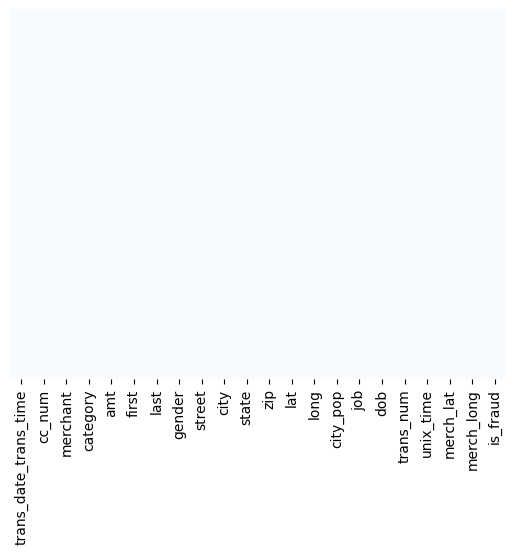

In [ ]:
sns.heatmap(bcfd.isnull(),yticklabels=False,cbar=False,cmap='Blues')

In [ ]:
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=43e7625e5b69b5d0783ef56baebd7ce9d7428a3a43dbd8fc94efd689f7c9cb70
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

bcfd.profile_report()

In [ ]:
!pip install missingno

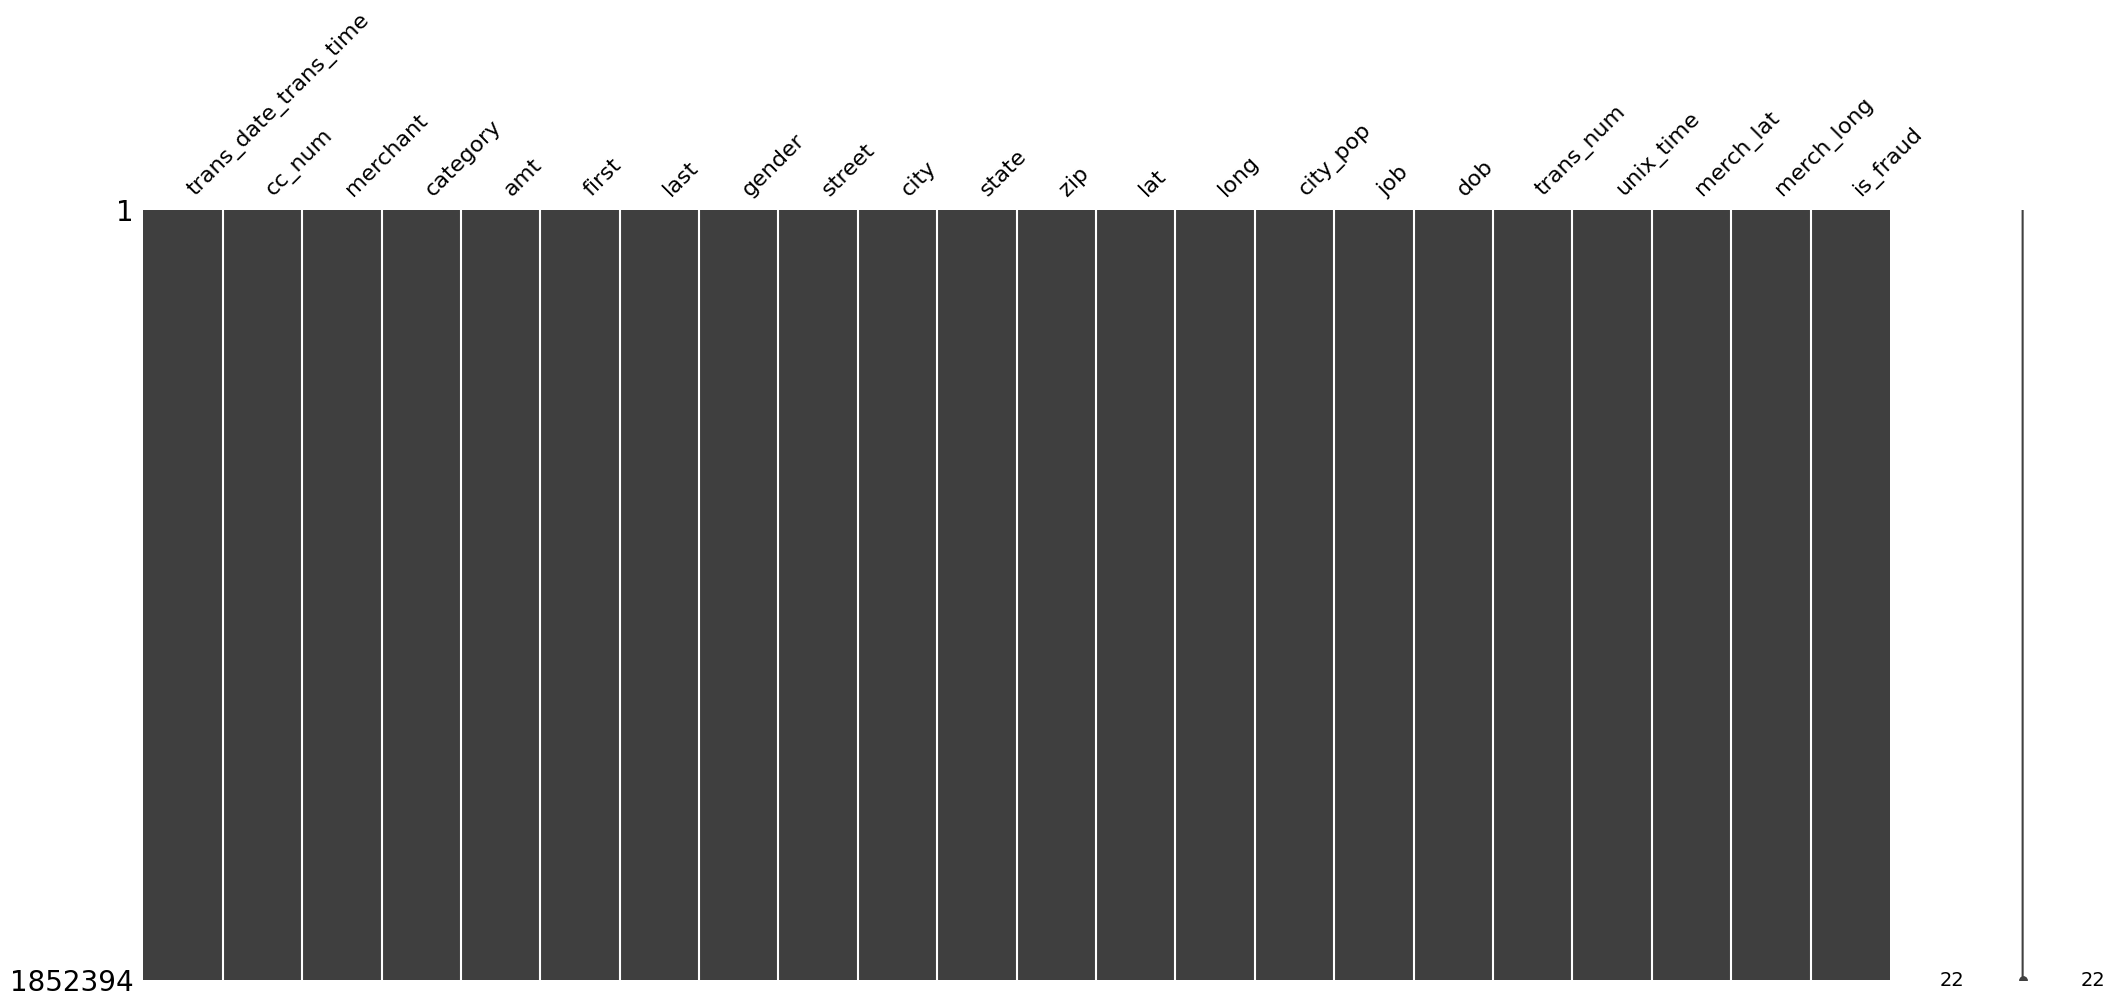

In [ ]:
import missingno as msno
msno.matrix(bcfd);

# **EDA :)**

array([[<Axes: title={'center': 'cc_num'}>,
        <Axes: title={'center': 'amt'}>, <Axes: title={'center': 'zip'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'city_pop'}>],
       [<Axes: title={'center': 'unix_time'}>,
        <Axes: title={'center': 'merch_lat'}>,
        <Axes: title={'center': 'merch_long'}>],
       [<Axes: title={'center': 'is_fraud'}>, <Axes: >, <Axes: >]],
      dtype=object)

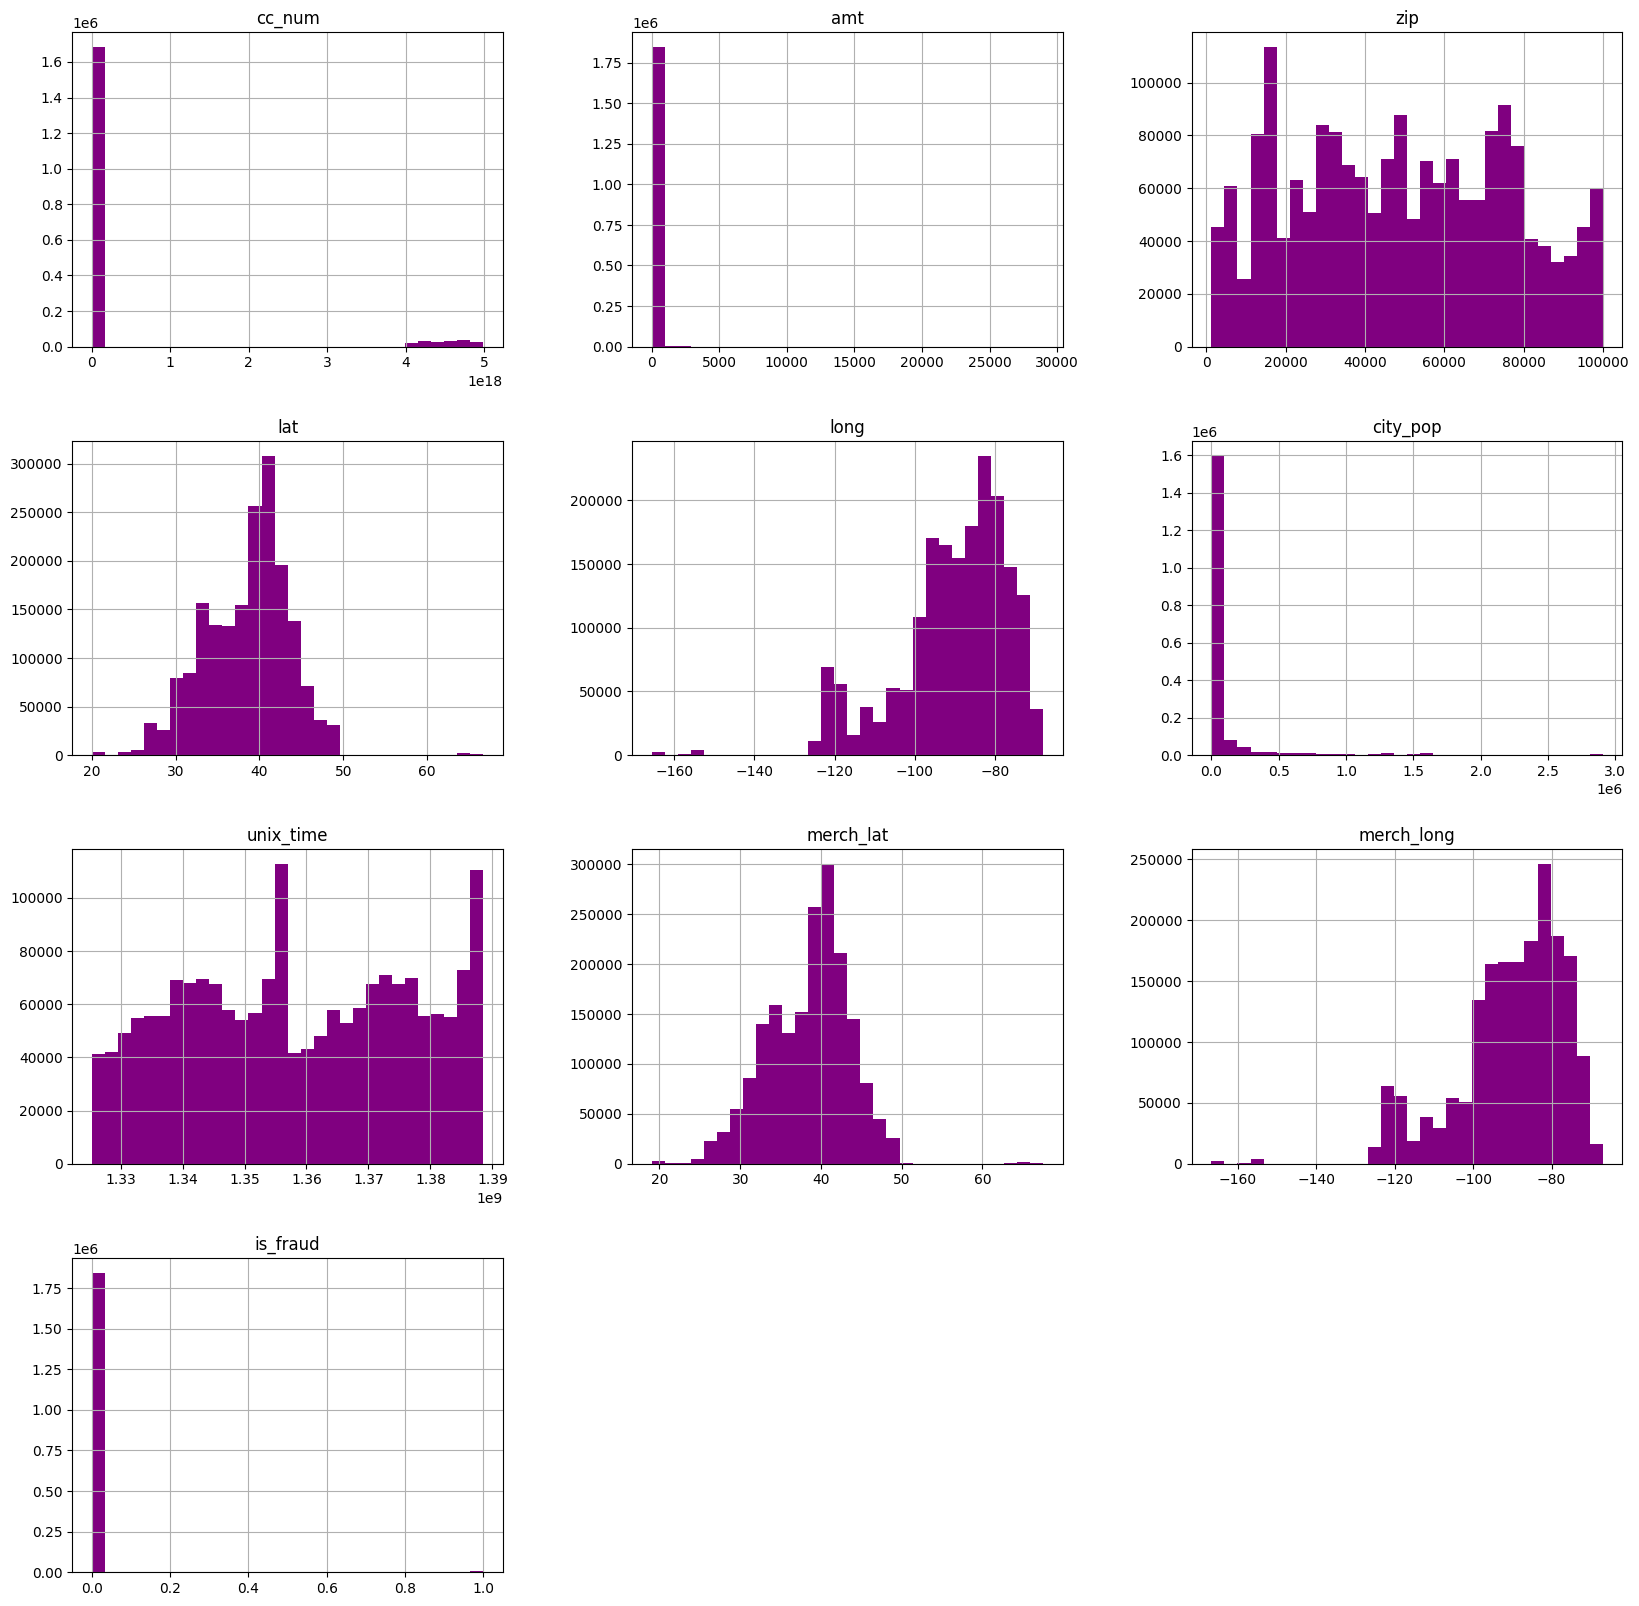

In [ ]:
bcfd.hist(bins=30,figsize=(20,20),color= 'purple')

<Axes: xlabel='is_fraud'>

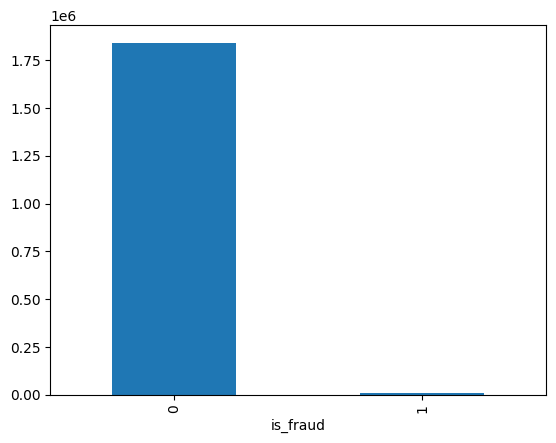

In [ ]:
bcfd.groupby('is_fraud').count()['cc_num'].plot.bar()

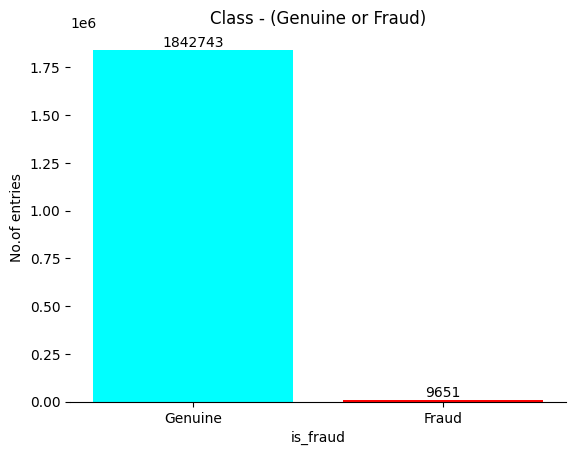

In [ ]:
class_counts =bcfd["is_fraud"].value_counts()

bar_colors = ["cyan", "red"]
plt.bar(class_counts.index, class_counts.values, color = bar_colors)

plt.xlabel("is_fraud")
plt.ylabel("No.of entries")
plt.title("Class - (Genuine or Fraud)")

for _, value in enumerate(class_counts.values):
  plt.text(class_counts.index[_], value, str(value), ha="center", va= "bottom")

class_labels = {0: "Genuine", 1: "Fraud"}
plt.xticks(class_counts.index, [class_labels[x] for x in class_counts.index])

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.show()

In [ ]:
fraud = bcfd[bcfd['is_fraud'] == 1]
Genuine= bcfd[bcfd['is_fraud'] == 0]

print(len(fraud), len(Genuine))

9651 1842743


Class as pie chart:


Text(0, 0.5, '')

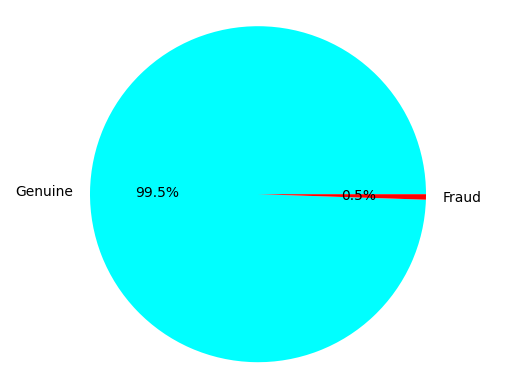

In [ ]:
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(bcfd.is_fraud.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['cyan','r'])
plt.axis('equal')
plt.ylabel('')


# ***Categorical and Numerical Variable Analysis  :)***

In [ ]:
total = pd.concat([bcfd_train, bcfd_test])
print(total.info())

total["is_fraud_cat"]=total.is_fraud.apply(lambda x: "T" if x==1 else "F")
total["is_fraud_cat"].astype("object")

totalcat=total.select_dtypes(include=['object'])

total[totalcat.columns]

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int64(5),

trans_date_trans_time                            merchant  \
0        2019-01-01 00:00:18          fraud_Rippin, Kub and Mann   
1        2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme   
2        2019-01-01 00:00:51                fraud_Lind-Buckridge   
3        2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell   
4        2019-01-01 00:03:06                 fraud_Keeling-Crist   
...                      ...                                 ...   
555714   2020-12-31 23:59:07               fraud_Reilly and Sons   
555715   2020-12-31 23:59:09                fraud_Hoppe-Parisian   
555716   2020-12-31 23:59:15                     fraud_Rau-Robel   
555717   2020-12-31 23:59:24               fraud_Breitenberg LLC   
555718   2020-12-31 23:59:34                   fraud_Dare-Marvin   

              category      first     last gender  \
0             misc_net   Jennifer    Banks      F   
1          grocery_pos  Stephanie     Gill      F   
2        entertainment     Edward  Sanchez      M   
3        gas_transport     Jeremy    White      M   
4             misc_pos      Tyler   Garcia      M   
...                ...        ...      ...    ...   
555714  health_fitness    Michael    Olson      M   
555715       kids_pets       Jose  Vasquez      M   
555716       kids_pets        Ann   Lawson      F   
555717          travel       Eric  Preston      M   
555718   entertainment     Samuel     Frey      M   

                              street            city state  \
0                     561 Perry Cove  Moravian Falls    NC   
1       43039 Riley Greens Suite 393          Orient    WA   
2           594 White Dale Suite 530      Malad City    ID   
3        9443 Cynthia Court Apt. 038         Boulder    MT   
4                   408 Bradley Rest        Doe Hill    VA   
...                              ...             ...   ...   
555714           558 Michael Estates           Luray    MO   
555715           572 Davis Mountains    Lake Jackson    TX   
555716    144 Evans Islands Apt. 683         Burbank    WA   
555717    7020 Doyle Stream Apt. 951            Mesa    ID   
555718      830 Myers Plaza Apt. 384          Edmond    OK   

                                      job         dob  \
0               Psychologist, counselling  1988-03-09   
1       Special educational needs teacher  1978-06-21   
2             Nature conservation officer  1962-01-19   
3                         Patent attorney  1967-01-12   
4          Dance movement psychotherapist  1986-03-28   
...                                   ...         ...   
555714                       Town planner  1966-02-13   
555715                     Futures trader  1999-12-27   
555716                           Musician  1981-11-29   
555717                       Cartographer  1965-12-15   
555718                        Media buyer  1993-05-10   

                               trans_num is_fraud_cat  
0       0b242abb623afc578575680df30655b9            F  
1       1f76529f8574734946361c461b024d99            F  
2       a1a22d70485983eac12b5b88dad1cf95            F  
3       6b849c168bdad6f867558c3793159a81            F  
4       a41d7549acf90789359a9aa5346dcb46            F  
...                                  ...          ...  
555714  9b1f753c79894c9f4b71f04581835ada            F  
555715  2090647dac2c89a1d86c514c427f5b91            F  
555716  6c5b7c8add471975aa0fec023b2e8408            F  
555717  14392d723bb7737606b2700ac791b7aa            F  
555718  1765bb45b3aa3224b4cdcb6e7a96cee3            F  

[1852394 rows x 13 columns]

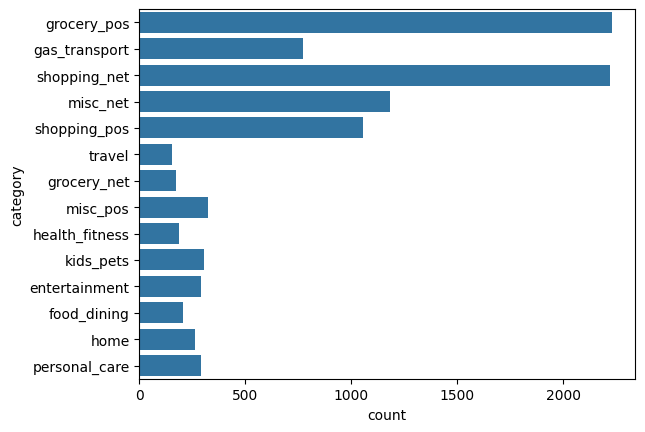

In [ ]:
sns.countplot(total[total['is_fraud_cat'] == "T"].category)

# Rotate the x-axis labels for better readability




# Display the plot
plt.show()

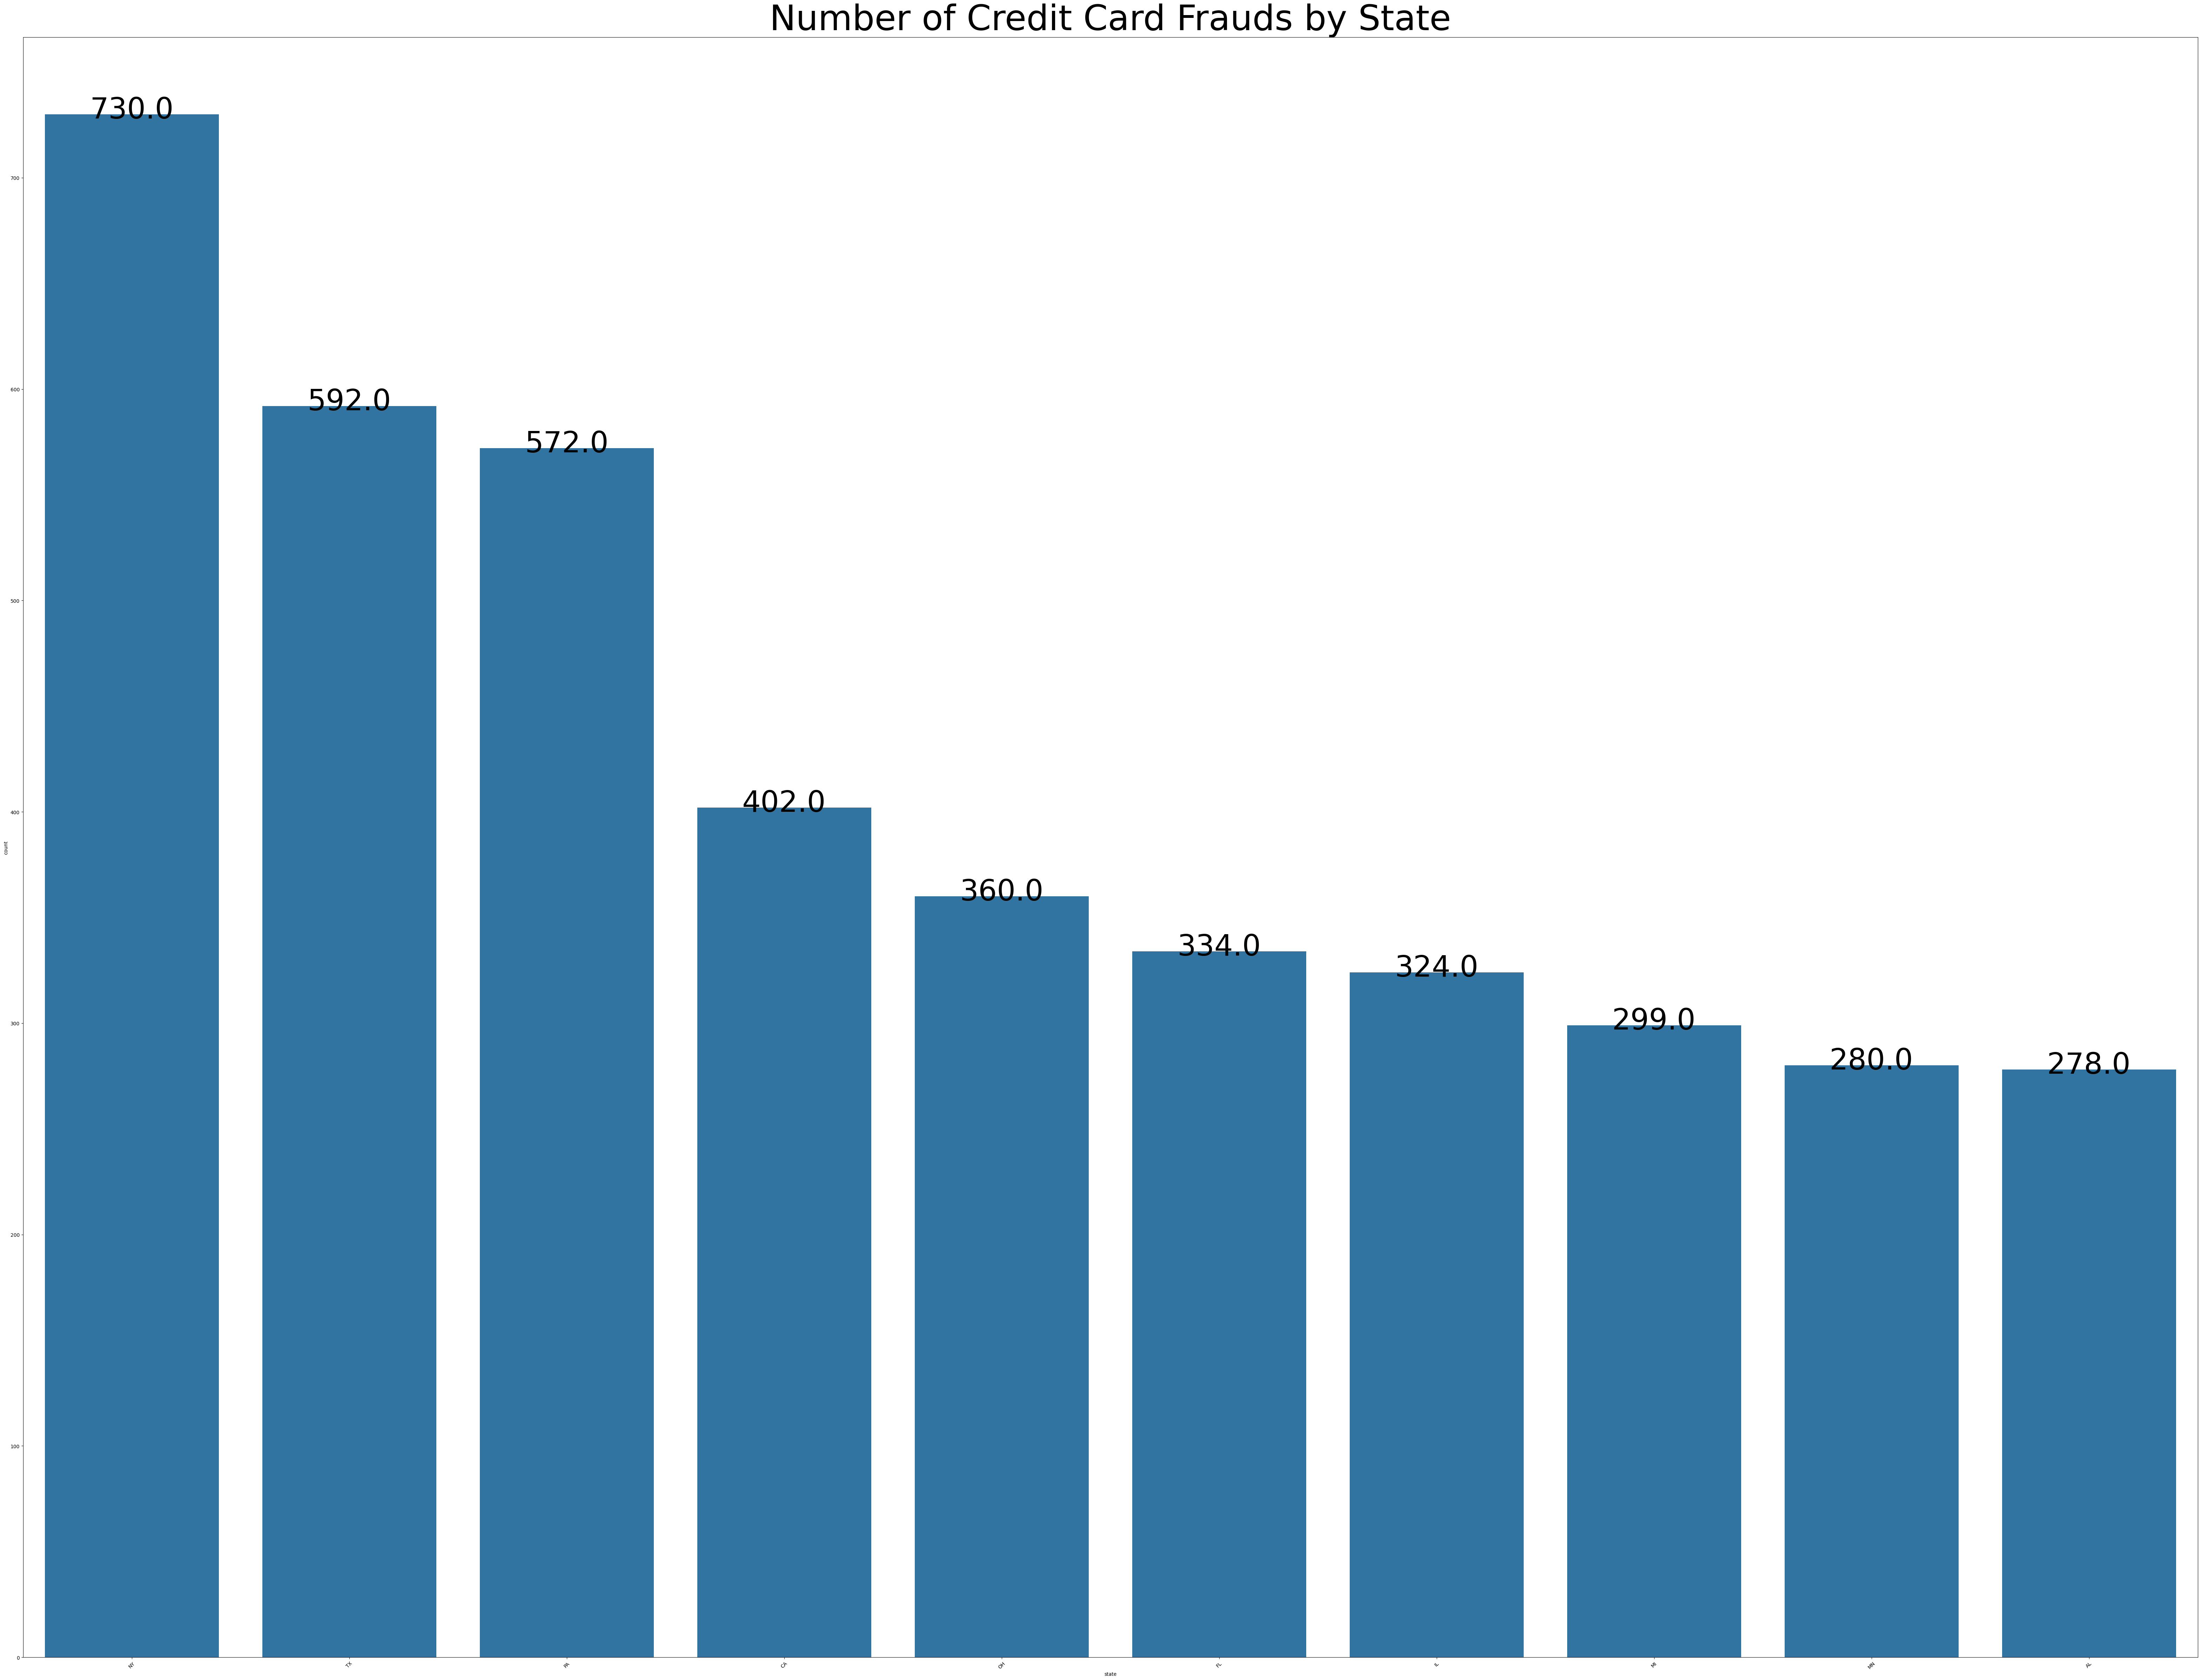

In [ ]:
fraud_data = total[total['is_fraud_cat'] == "T"]

# Calculate the count of frauds by state and get the top 10 states
top_states = fraud_data['state'].value_counts().head(10).index

# Filter the fraud_data to include only the top 10 states
top_fraud_data = fraud_data[fraud_data['state'].isin(top_states)]

# Now create the count plot for only the top 10 states
fig, ax = plt.subplots(figsize=(80, 60))
plt.rcParams.update({'font.size': 60})

# Use the filtered top_fraud_data for plotting
sns.countplot(x='state', data=top_fraud_data, order=top_states)

plt.xticks(rotation=45)

# Annotate the bars with the count of frauds
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.title("Number of Credit Card Frauds by State")
plt.savefig('fraud_by_state.pdf', bbox_inches='tight', dpi=300)
plt.show()

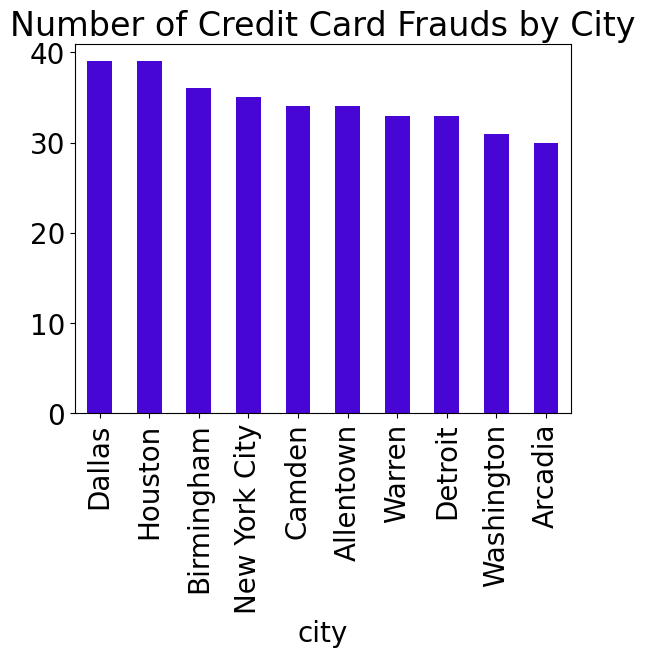

In [ ]:
import random
def randomcolor():
    r = random.random()
    b = random.random()
    g = random.random()
    rgb = [r,g,b]
    return rgb
plt.rcParams.update({'font.size': 20})
total[total['is_fraud_cat']=="T"]["city"].value_counts(sort=True,ascending=False).head(10).plot(kind="bar",color=randomcolor())
plt.title("Number of Credit Card Frauds by City")

plt.show()

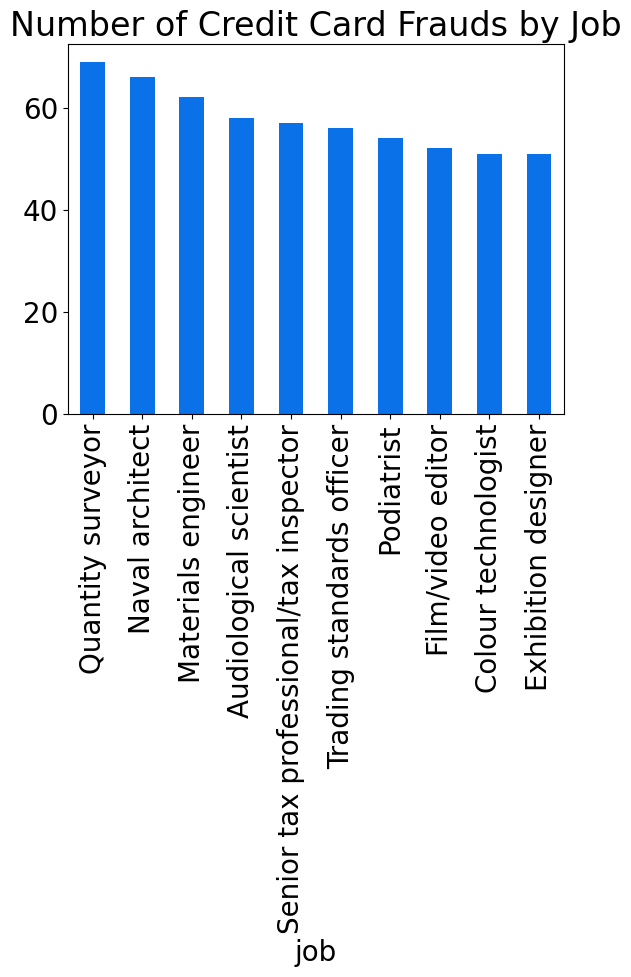

In [ ]:
total[total['is_fraud_cat']=="T"]["job"].value_counts(sort=True,ascending=False).head(10).plot(kind="bar",color=randomcolor())
plt.title("Number of Credit Card Frauds by Job")

plt.show()

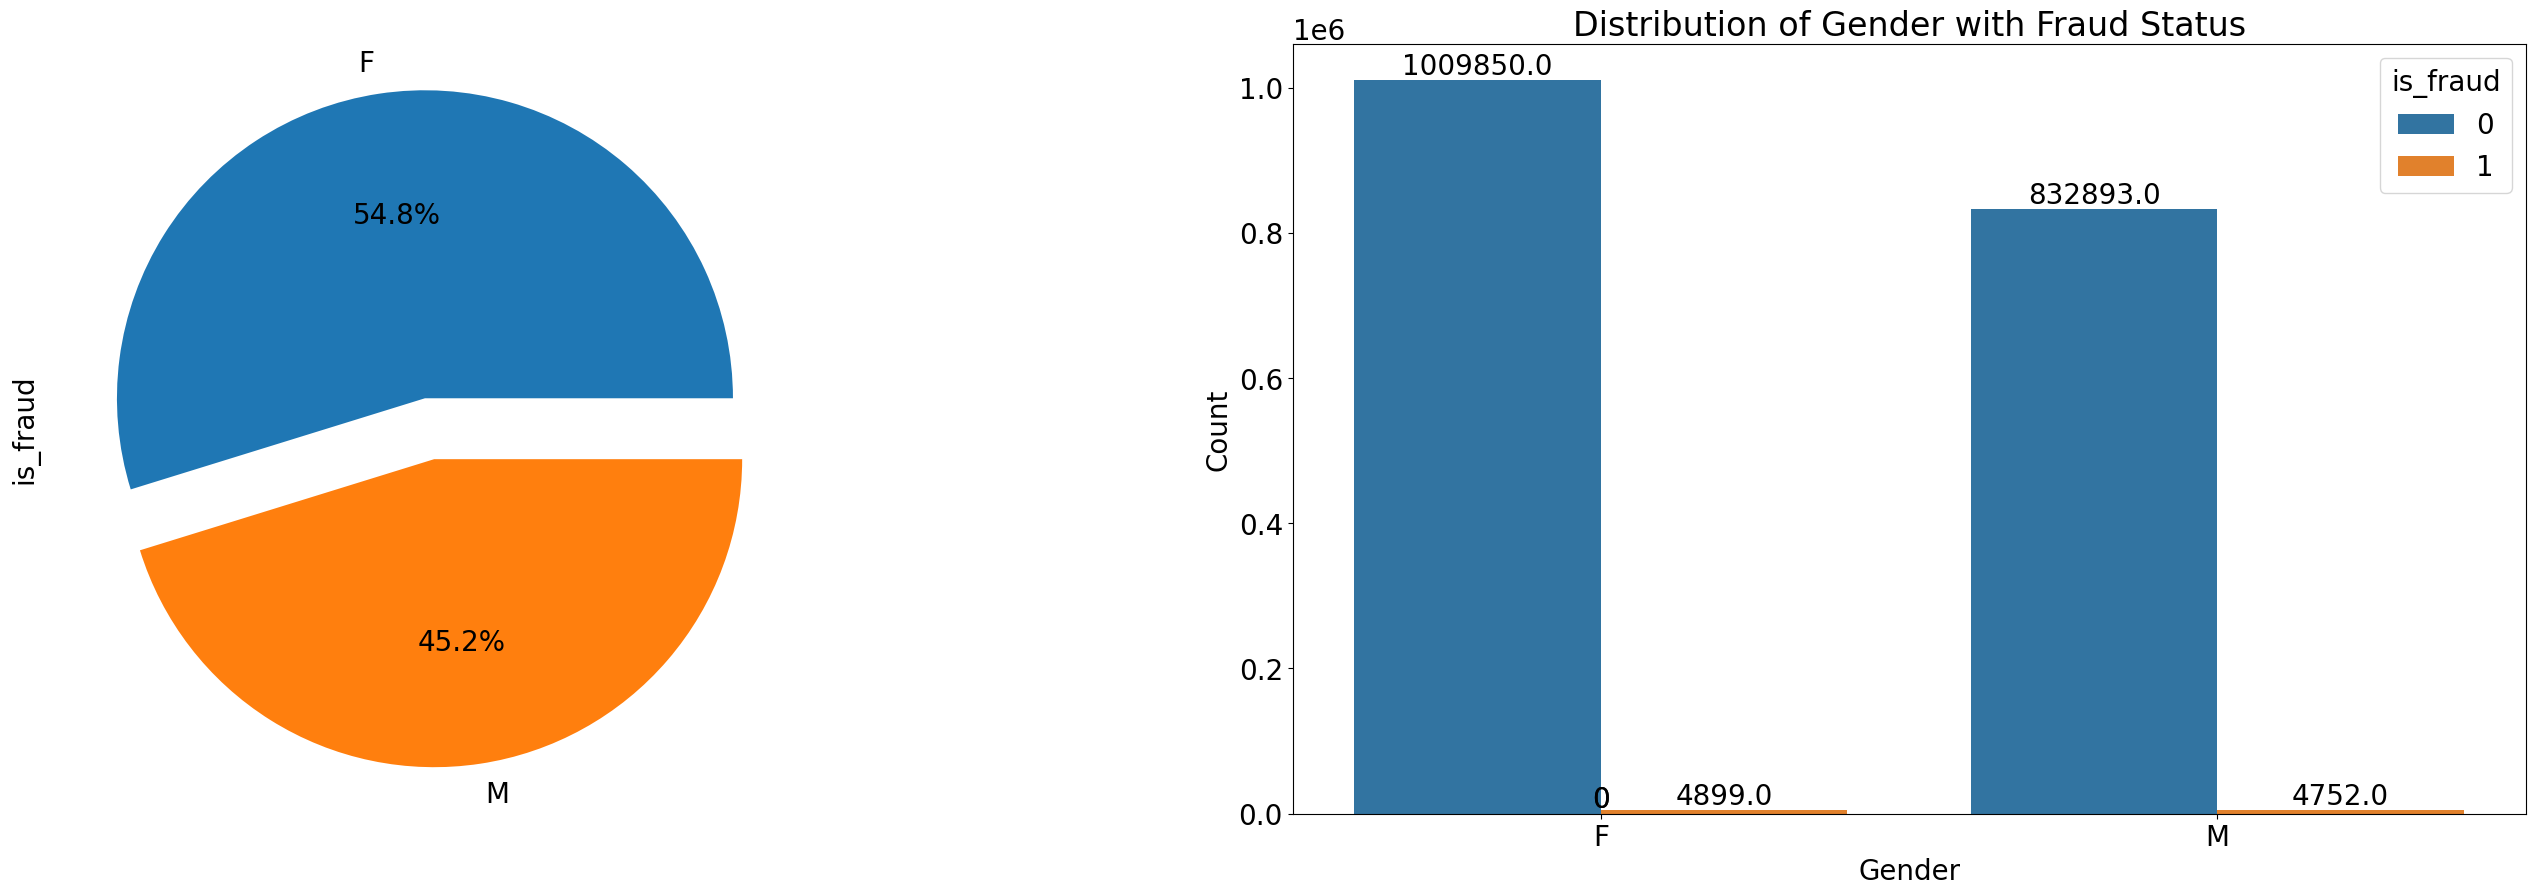

In [ ]:
fig,axb = plt.subplots(ncols=2,nrows=1,figsize=(35, 10))

#Gender Distribution
explode = [0.1, 0.1]
bcfd.groupby('gender')['is_fraud'].count().plot.pie(explode=explode, autopct="%1.1f%%",ax=axb[0]);

ax = sns.countplot(x="gender", hue="is_fraud", data=bcfd,ax=axb[1])

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.title("Distribution of Gender with Fraud Status")
plt.xlabel("Gender")
plt.ylabel("Count")

# Show the plot
plt.show()

In [ ]:
bcfd['trans_date_trans_time'] = pd.to_datetime(bcfd['trans_date_trans_time'])

In [ ]:
bcfd['hour'] = bcfd['trans_date_trans_time'].dt.hour
bcfd['hour'] = bcfd['trans_date_trans_time'].dt.hour

bcfd['month'] =bcfd['trans_date_trans_time'].dt.month
bcfd['month'] = bcfd['trans_date_trans_time'].dt.month

In [ ]:
import datetime as dt
bcfd['age'] = dt.date.today().year-pd.to_datetime(bcfd['dob']).dt.year

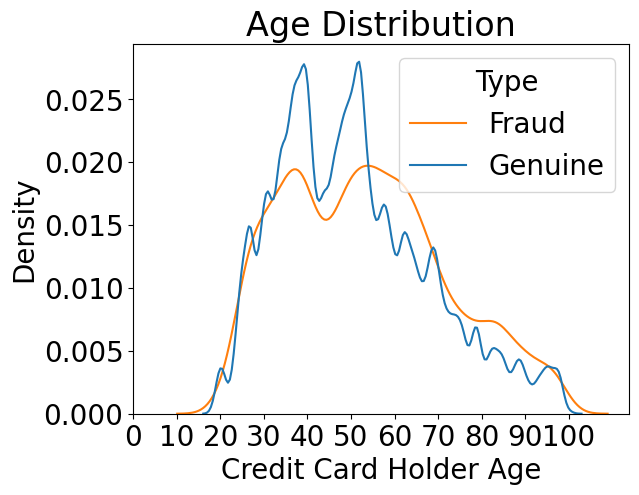

In [ ]:

ax = sns.kdeplot(x='age', data=bcfd, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0, 110, 10))
plt.title('Age Distribution')
plt.legend(title='Type', labels=['Fraud', 'Genuine']);

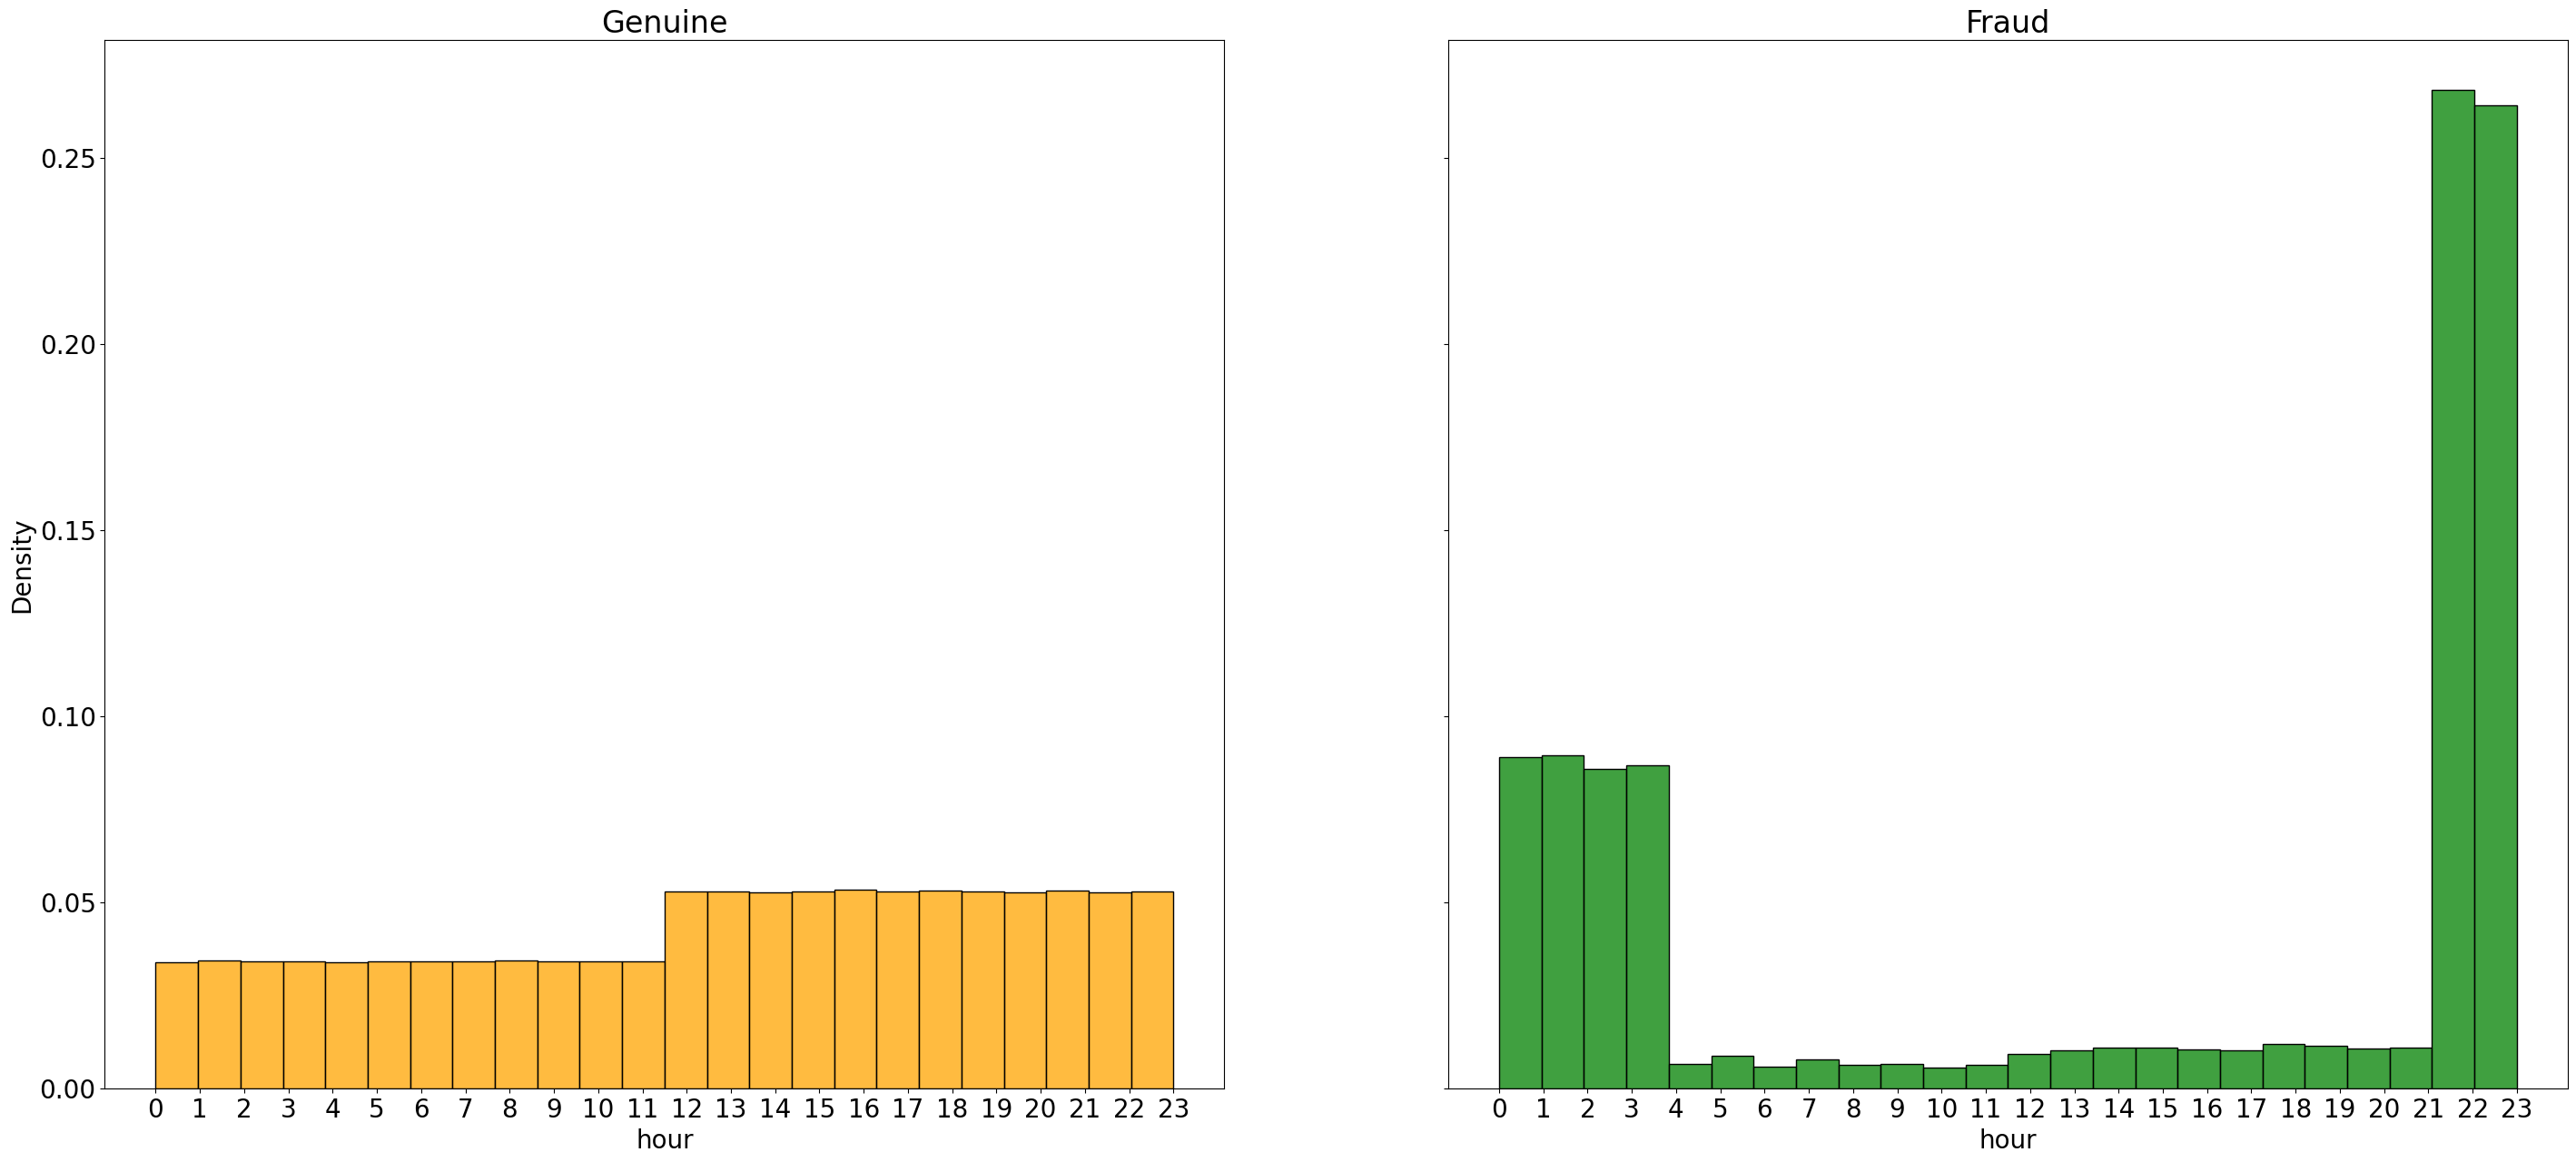

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(35,15), sharey=True)

ax1 = sns.histplot(x='hour', data=bcfd[bcfd["is_fraud"] == 0],
                   stat="density", bins=24, ax=ax1, color="orange")

ax2 = sns.histplot(x='hour', data=bcfd[bcfd["is_fraud"] == 1],
                   stat="density", bins=24, ax=ax2, color="green")

ax1.set_title("Genuine")
ax2.set_title("Fraud")

ax1.set_xticks(np.arange(24)) # ticks of the day 0 -> 23
ax2.set_xticks(np.arange(24));

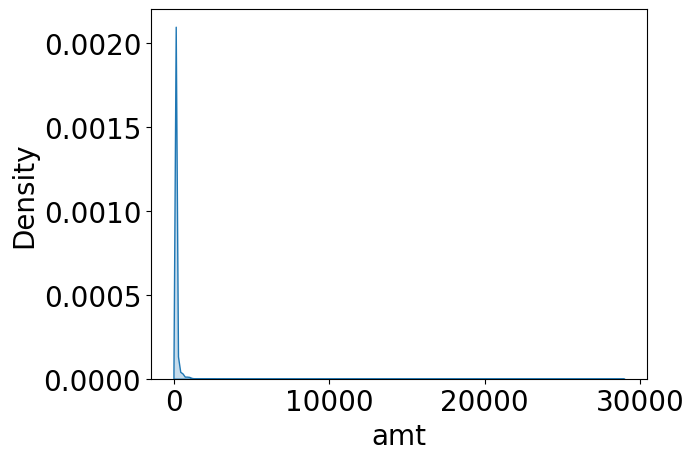

In [ ]:
sns.kdeplot(bcfd["amt"], fill=True);

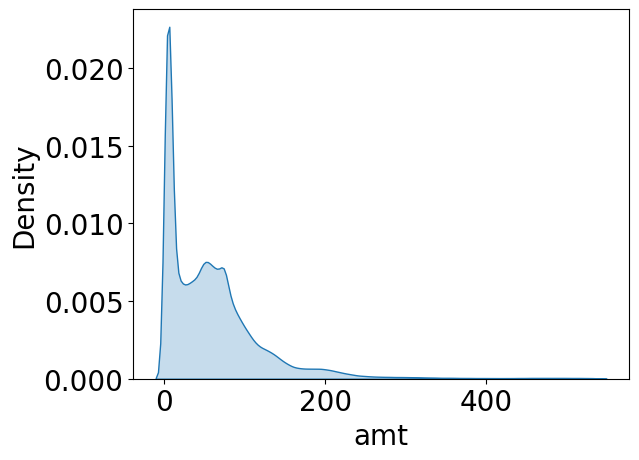

In [ ]:
p99 = bcfd["amt"].quantile(0.99)
sns.kdeplot(x="amt", data=bcfd[bcfd["amt"] <= p99], fill=True);

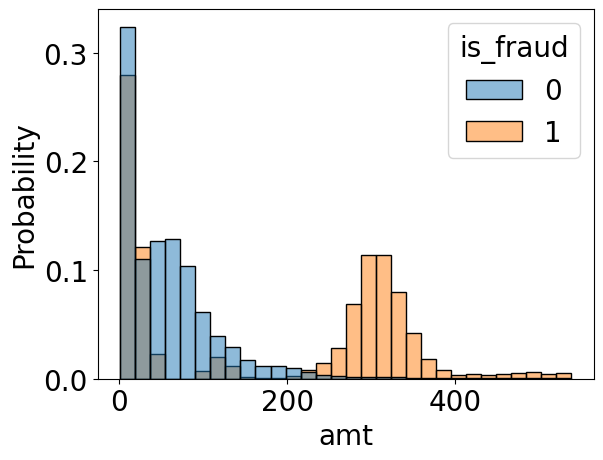

In [ ]:
sns.histplot(x="amt", hue="is_fraud", bins=30,
             stat="probability", data=bcfd[bcfd["amt"] <= p99],
             common_norm=False);

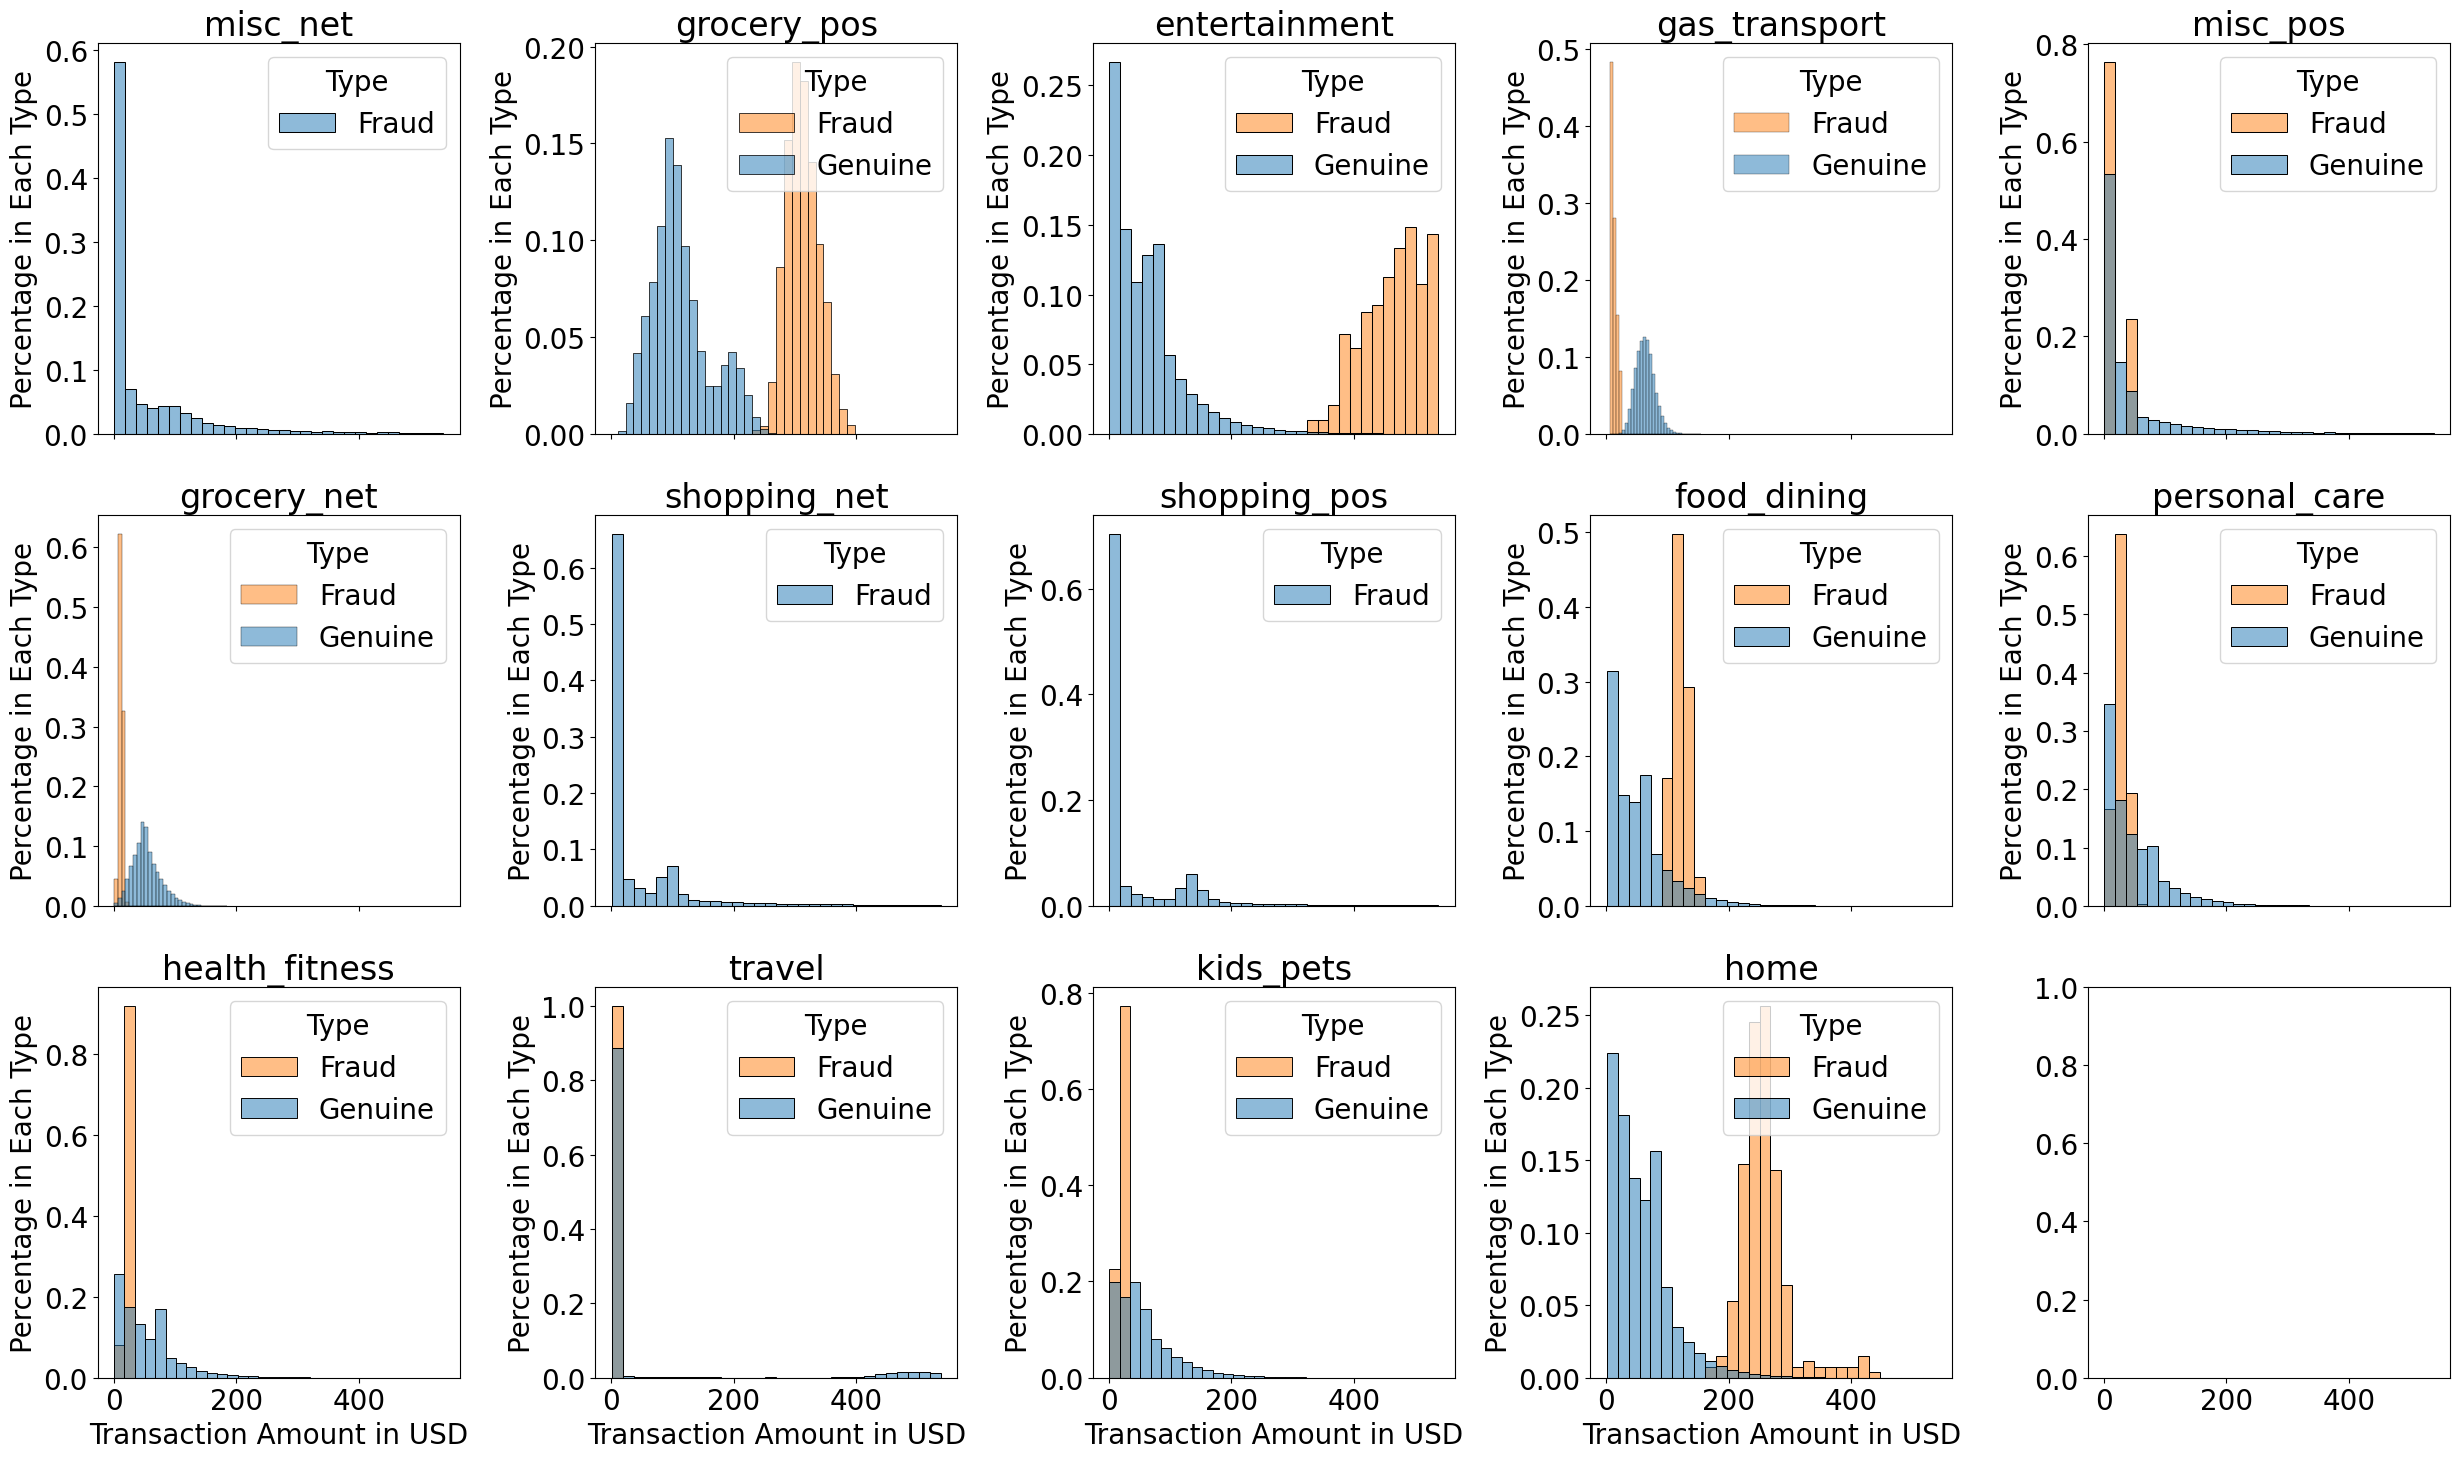

In [ ]:
categories = bcfd['category'].unique()

num_plots = len(categories)
num_rows = math.isqrt(num_plots)
num_cols = math.ceil(num_plots / num_rows)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(
    5*num_cols, 5*num_rows), sharex=True)

for i, category in enumerate(categories):

    row = i // num_cols
    col = i % num_cols

    data_category = bcfd[bcfd['category'] == category]

    if num_rows == 1 and num_cols == 1:
        ax = axes
    elif num_rows == 1 or num_cols == 1:
        ax = axes[i]
    else:
        ax = axes[row, col]

    sns.histplot(x='amt', data=data_category[data_category['amt'] <= p99],
                 hue='is_fraud', stat='probability',
                 common_norm=False, bins=30, ax=ax)

    ax.set_ylabel('Percentage in Each Type')
    ax.set_xlabel('Transaction Amount in USD')
    ax.set_title(f'{category}')
    ax.legend(title='Type', labels=['Fraud', 'Genuine'])

plt.tight_layout()

plt.show();

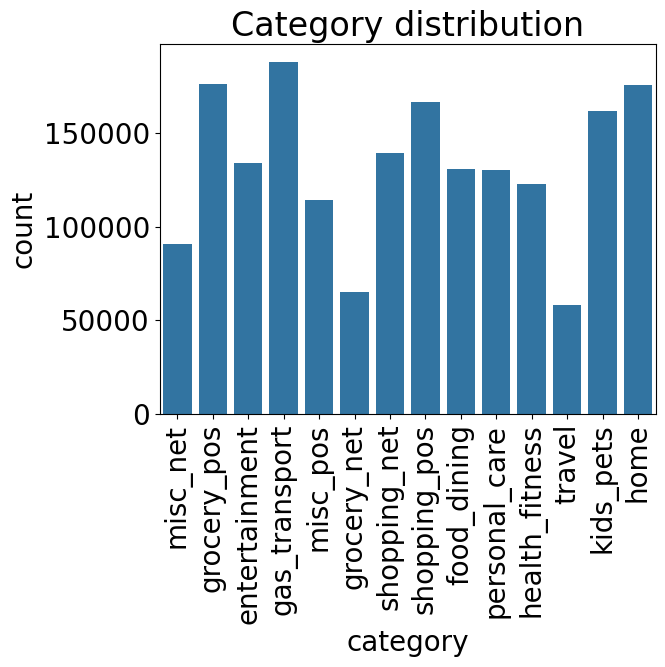

In [ ]:
sns.countplot(x='category', data=bcfd)
plt.title('Category distribution')
plt.xticks(rotation=90)
plt.show()

observation: higest transaction are fgor gas tarnsaction that is over 1,75,000

In [ ]:
# Genuine
Genuine = bcfd[bcfd['is_fraud'] == 0]['category'].value_counts(
    normalize=True).to_frame().reset_index()
Genuine.columns = ['category', 'not_fraud_percentual_vs_total']

# fraud
Fraud = bcfd[bcfd['is_fraud'] == 1]['category'].value_counts(
    normalize=True).to_frame().reset_index()
Fraud.columns = ['category', 'fraud_percentage_vs_total']

# merging two dataframes and calculating "fraud level"
Genuine_vs_Fraud = Genuine.merge(Fraud, on='category')
Genuine_vs_Fraud['fraud_level'] = Genuine_vs_Fraud['fraud_percentage_vs_total'] - \
    Genuine_vs_Fraud['not_fraud_percentual_vs_total']

Genuine_vs_Fraud

category  not_fraud_percentual_vs_total  fraud_percentage_vs_total  \
0    gas_transport                       0.101619                   0.079992   
1             home                       0.095073                   0.027458   
2      grocery_pos                       0.094404                   0.230857   
3     shopping_pos                       0.089761                   0.109419   
4        kids_pets                       0.087599                   0.031499   
5     shopping_net                       0.074402                   0.229924   
6    entertainment                       0.072623                   0.030256   
7      food_dining                       0.070831                   0.021241   
8    personal_care                       0.070436                   0.030049   
9   health_fitness                       0.066405                   0.019169   
10        misc_pos                       0.061814                   0.033364   
11        misc_net                       0.048554                   0.122474   
12     grocery_net                       0.035112                   0.018133   
13          travel                       0.031366                   0.016164   

    fraud_level  
0     -0.021627  
1     -0.067615  
2      0.136453  
3      0.019657  
4     -0.056100  
5      0.155523  
6     -0.042367  
7     -0.049590  
8     -0.040387  
9     -0.047236  
10    -0.028449  
11     0.073921  
12    -0.016979  
13    -0.015202

<ipython-input-45-a8f5dbd2b124>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='category', x='fraud_level',
<ipython-input-45-a8f5dbd2b124>:2: UserWarning: 
The palette list has fewer values (6) than needed (14) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(y='category', x='fraud_level',


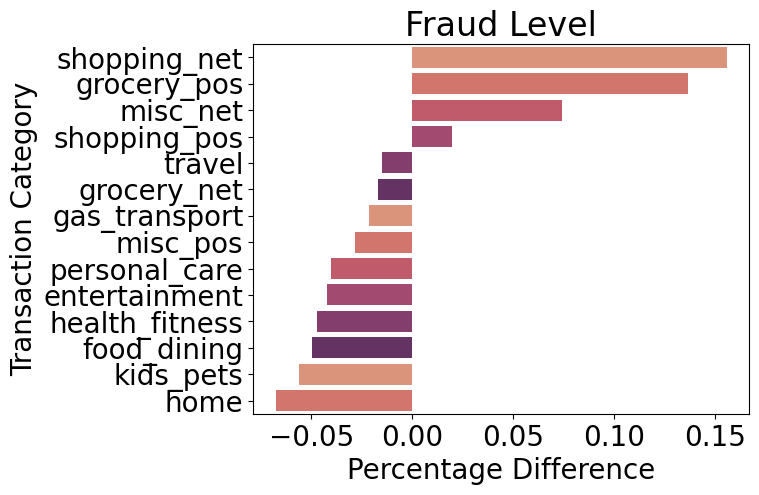

In [ ]:
custom_palette = sns.color_palette("flare")
ax = sns.barplot(y='category', x='fraud_level',
                 data=Genuine_vs_Fraud.sort_values('fraud_level', ascending=False), palette=custom_palette)
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('Fraud Level');

# **Checking for NaN/null and duplicated cells :)**

In [ ]:
bcfd.isna().sum().sum()

0

In [ ]:
bcfd.duplicated().sum()

0

<Axes: >

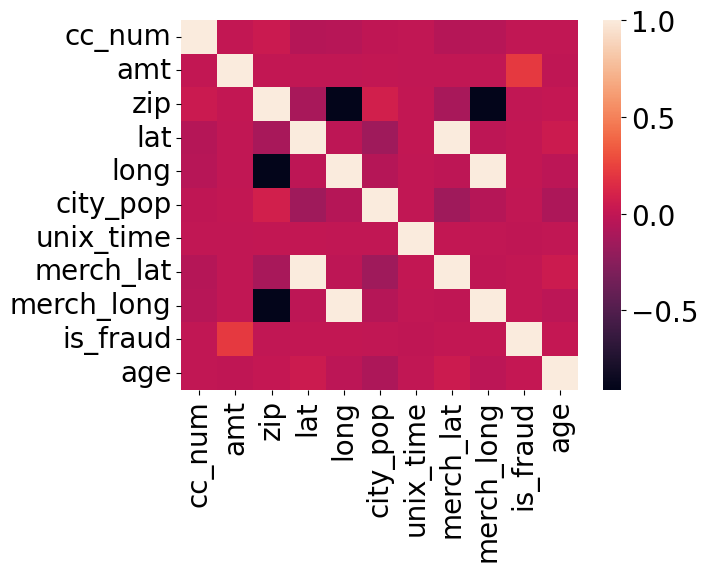

In [ ]:
sns.heatmap(bcfd[[i for i in bcfd.columns\
                         if bcfd[i].dtype == 'int64' \
                            or bcfd[i].dtype == 'float64']]\
                            .corr())

This shows greater correlation of 'is_fraud' column with 'amt' variable

In [ ]:
fraud_percentage = (bcfd["is_fraud"].value_counts(normalize=True) *100).loc[1]
print(f"The percentage of entries classfied as fraud is {fraud_percentage:.4f}%.")

The percentage of entries classfied as fraud is 0.5210%.


In [ ]:
bcfd

trans_date_trans_time            cc_num  \
0        2019-01-01 00:00:18  2703186189652095   
1        2019-01-01 00:00:44      630423337322   
2        2019-01-01 00:00:51    38859492057661   
3        2019-01-01 00:01:16  3534093764340240   
4        2019-01-01 00:03:06   375534208663984   
...                      ...               ...   
555714   2020-12-31 23:59:07    30560609640617   
555715   2020-12-31 23:59:09  3556613125071656   
555716   2020-12-31 23:59:15  6011724471098086   
555717   2020-12-31 23:59:24     4079773899158   
555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt      first  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97   Jennifer   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23  Stephanie   
2                     fraud_Lind-Buckridge   entertainment  220.11     Edward   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00     Jeremy   
4                      fraud_Keeling-Crist        misc_pos   41.96      Tyler   
...                                    ...             ...     ...        ...   
555714               fraud_Reilly and Sons  health_fitness   43.77    Michael   
555715                fraud_Hoppe-Parisian       kids_pets  111.84       Jose   
555716                     fraud_Rau-Robel       kids_pets   86.88        Ann   
555717               fraud_Breitenberg LLC          travel    7.99       Eric   
555718                   fraud_Dare-Marvin   entertainment   38.13     Samuel   

           last gender                        street            city state  \
0         Banks      F                561 Perry Cove  Moravian Falls    NC   
1          Gill      F  43039 Riley Greens Suite 393          Orient    WA   
2       Sanchez      M      594 White Dale Suite 530      Malad City    ID   
3         White      M   9443 Cynthia Court Apt. 038         Boulder    MT   
4        Garcia      M              408 Bradley Rest        Doe Hill    VA   
...         ...    ...                           ...             ...   ...   
555714    Olson      M           558 Michael Estates           Luray    MO   
555715  Vasquez      M           572 Davis Mountains    Lake Jackson    TX   
555716   Lawson      F    144 Evans Islands Apt. 683         Burbank    WA   
555717  Preston      M    7020 Doyle Stream Apt. 951            Mesa    ID   
555718     Frey      M      830 Myers Plaza Apt. 384          Edmond    OK   

          zip      lat      long  city_pop                                job  \
0       28654  36.0788  -81.1781      3495          Psychologist, counselling   
1       99160  48.8878 -118.2105       149  Special educational needs teacher   
2       83252  42.1808 -112.2620      4154        Nature conservation officer   
3       59632  46.2306 -112.1138      1939                    Patent attorney   
4       24433  38.4207  -79.4629        99     Dance movement psychotherapist   
...       ...      ...       ...       ...                                ...   
555714  63453  40.4931  -91.8912       519                       Town planner   
555715  77566  29.0393  -95.4401     28739                     Futures trader   
555716  99323  46.1966 -118.9017      3684                           Musician   
555717  83643  44.6255 -116.4493       129                       Cartographer   
555718  73034  35.6665  -97.4798    116001                        Media buyer   

               dob                         trans_num   unix_time  merch_lat  \
0       1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293   
1       1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047   
2       1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704   
3       1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076  47.034331   
4       1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999   
...            ...                               

# **Data Preparation :)**

In [ ]:
pd.DataFrame(bcfd.isnull().value_counts())

count
trans_date_trans_time cc_num merchant category amt   first last  gender street city  state zip   lat   long  city_pop job   dob   trans_num unix_time merch_lat merch_long is_fraud hour  month age           
False                 False  False    False    False False False False  False  False False False False False False    False False False     False     False     False      False    False False False  1852394

In [ ]:
# Dropping columns not relevant for this case
c_drop = ['unix_time', 'zip', 'city','street', 'state', 'trans_num', 'trans_date_trans_time','job','city_pop','dob']
bcfd_balanced= bcfd.drop(c_drop, axis=1)

bcfd_balanced.head(5)

cc_num                            merchant       category  \
0  2703186189652095          fraud_Rippin, Kub and Mann       misc_net   
1      630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos   
2    38859492057661                fraud_Lind-Buckridge  entertainment   
3  3534093764340240  fraud_Kutch, Hermiston and Farrell  gas_transport   
4   375534208663984                 fraud_Keeling-Crist       misc_pos   

      amt      first     last gender      lat      long  merch_lat  \
0    4.97   Jennifer    Banks      F  36.0788  -81.1781  36.011293   
1  107.23  Stephanie     Gill      F  48.8878 -118.2105  49.159047   
2  220.11     Edward  Sanchez      M  42.1808 -112.2620  43.150704   
3   45.00     Jeremy    White      M  46.2306 -112.1138  47.034331   
4   41.96      Tyler   Garcia      M  38.4207  -79.4629  38.674999   

   merch_long  is_fraud  hour  month  age  
0  -82.048315         0     0      1   36  
1 -118.186462         0     0      1   46  
2 -112.154481         0     0      1   62  
3 -112.561071         0     0      1   57  
4  -78.632459         0     0      1   38

In [ ]:
#clean merchant column
bcfd_balanced['merchant'] = bcfd_balanced['merchant'].apply(lambda x : x.replace('fraud_',''))
bcfd_balanced

cc_num                      merchant        category  \
0       2703186189652095          Rippin, Kub and Mann        misc_net   
1           630423337322     Heller, Gutmann and Zieme     grocery_pos   
2         38859492057661                Lind-Buckridge   entertainment   
3       3534093764340240  Kutch, Hermiston and Farrell   gas_transport   
4        375534208663984                 Keeling-Crist        misc_pos   
...                  ...                           ...             ...   
555714    30560609640617               Reilly and Sons  health_fitness   
555715  3556613125071656                Hoppe-Parisian       kids_pets   
555716  6011724471098086                     Rau-Robel       kids_pets   
555717     4079773899158               Breitenberg LLC          travel   
555718  4170689372027579                   Dare-Marvin   entertainment   

           amt      first     last gender      lat      long  merch_lat  \
0         4.97   Jennifer    Banks      F  36.0788  -81.1781  36.011293   
1       107.23  Stephanie     Gill      F  48.8878 -118.2105  49.159047   
2       220.11     Edward  Sanchez      M  42.1808 -112.2620  43.150704   
3        45.00     Jeremy    White      M  46.2306 -112.1138  47.034331   
4        41.96      Tyler   Garcia      M  38.4207  -79.4629  38.674999   
...        ...        ...      ...    ...      ...       ...        ...   
555714   43.77    Michael    Olson      M  40.4931  -91.8912  39.946837   
555715  111.84       Jose  Vasquez      M  29.0393  -95.4401  29.661049   
555716   86.88        Ann   Lawson      F  46.1966 -118.9017  46.658340   
555717    7.99       Eric  Preston      M  44.6255 -116.4493  44.470525   
555718   38.13     Samuel     Frey      M  35.6665  -97.4798  36.210097   

        merch_long  is_fraud  hour  month  age  
0       -82.048315         0     0      1   36  
1      -118.186462         0     0      1   46  
2      -112.154481         0     0      1   62  
3      -112.561071         0     0      1   57  
4       -78.632459         0     0      1   38  
...            ...       ...   ...    ...  ...  
555714  -91.333331         0    23     12   58  
555715  -96.186633         0    23     12   25  
555716 -119.715054         0    23     12   43  
555717 -117.080888         0    23     12   59  
555718  -97.036372         0    23     12   31  

[1852394 rows x 15 columns]

In [ ]:
bcfd_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 15 columns):
 #   Column      Dtype  
---  ------      -----  
 0   cc_num      int64  
 1   merchant    object 
 2   category    object 
 3   amt         float64
 4   first       object 
 5   last        object 
 6   gender      object 
 7   lat         float64
 8   long        float64
 9   merch_lat   float64
 10  merch_long  float64
 11  is_fraud    int64  
 12  hour        int32  
 13  month       int32  
 14  age         int64  
dtypes: float64(5), int32(2), int64(3), object(5)
memory usage: 212.0+ MB


In [ ]:
bcfd_balanced.head()

cc_num                      merchant       category     amt  \
0  2703186189652095          Rippin, Kub and Mann       misc_net    4.97   
1      630423337322     Heller, Gutmann and Zieme    grocery_pos  107.23   
2    38859492057661                Lind-Buckridge  entertainment  220.11   
3  3534093764340240  Kutch, Hermiston and Farrell  gas_transport   45.00   
4   375534208663984                 Keeling-Crist       misc_pos   41.96   

       first     last gender      lat      long  merch_lat  merch_long  \
0   Jennifer    Banks      F  36.0788  -81.1781  36.011293  -82.048315   
1  Stephanie     Gill      F  48.8878 -118.2105  49.159047 -118.186462   
2     Edward  Sanchez      M  42.1808 -112.2620  43.150704 -112.154481   
3     Jeremy    White      M  46.2306 -112.1138  47.034331 -112.561071   
4      Tyler   Garcia      M  38.4207  -79.4629  38.674999  -78.632459   

   is_fraud  hour  month  age  
0         0     0      1   36  
1         0     0      1   46  
2         0     0      1   62  
3         0     0      1   57  
4         0     0      1   38

# **Data Encoding And Scaling :)**

# **Ordinal Encoding :)**

In [ ]:
def_drop = ['unix_time', 'zip', 'city','street', 'state', 'trans_num', 'trans_date_trans_time','job','city_pop','dob']
bcfd_dp= bcfd.drop(def_drop, axis=1)

bcfd_dp.head(5)

cc_num                            merchant       category  \
0  2703186189652095          fraud_Rippin, Kub and Mann       misc_net   
1      630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos   
2    38859492057661                fraud_Lind-Buckridge  entertainment   
3  3534093764340240  fraud_Kutch, Hermiston and Farrell  gas_transport   
4   375534208663984                 fraud_Keeling-Crist       misc_pos   

      amt      first     last gender      lat      long  merch_lat  \
0    4.97   Jennifer    Banks      F  36.0788  -81.1781  36.011293   
1  107.23  Stephanie     Gill      F  48.8878 -118.2105  49.159047   
2  220.11     Edward  Sanchez      M  42.1808 -112.2620  43.150704   
3   45.00     Jeremy    White      M  46.2306 -112.1138  47.034331   
4   41.96      Tyler   Garcia      M  38.4207  -79.4629  38.674999   

   merch_long  is_fraud  hour  month  age  
0  -82.048315         0     0      1   36  
1 -118.186462         0     0      1   46  
2 -112.154481         0     0      1   62  
3 -112.561071         0     0      1   57  
4  -78.632459         0     0      1   38

In [ ]:
bcfd_dp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 15 columns):
 #   Column      Dtype  
---  ------      -----  
 0   cc_num      int64  
 1   merchant    object 
 2   category    object 
 3   amt         float64
 4   first       object 
 5   last        object 
 6   gender      object 
 7   lat         float64
 8   long        float64
 9   merch_lat   float64
 10  merch_long  float64
 11  is_fraud    int64  
 12  hour        int32  
 13  month       int32  
 14  age         int64  
dtypes: float64(5), int32(2), int64(3), object(5)
memory usage: 212.0+ MB


In [ ]:
bcfd_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 15 columns):
 #   Column      Dtype  
---  ------      -----  
 0   cc_num      int64  
 1   merchant    object 
 2   category    object 
 3   amt         float64
 4   first       object 
 5   last        object 
 6   gender      object 
 7   lat         float64
 8   long        float64
 9   merch_lat   float64
 10  merch_long  float64
 11  is_fraud    int64  
 12  hour        int32  
 13  month       int32  
 14  age         int64  
dtypes: float64(5), int32(2), int64(3), object(5)
memory usage: 212.0+ MB


In [ ]:
#clean merchant column
bcfd_dp['merchant'] = bcfd_dp['merchant'].apply(lambda x : x.replace('fraud_',''))
bcfd_dp

cc_num                      merchant        category  \
0       2703186189652095          Rippin, Kub and Mann        misc_net   
1           630423337322     Heller, Gutmann and Zieme     grocery_pos   
2         38859492057661                Lind-Buckridge   entertainment   
3       3534093764340240  Kutch, Hermiston and Farrell   gas_transport   
4        375534208663984                 Keeling-Crist        misc_pos   
...                  ...                           ...             ...   
555714    30560609640617               Reilly and Sons  health_fitness   
555715  3556613125071656                Hoppe-Parisian       kids_pets   
555716  6011724471098086                     Rau-Robel       kids_pets   
555717     4079773899158               Breitenberg LLC          travel   
555718  4170689372027579                   Dare-Marvin   entertainment   

           amt      first     last gender      lat      long  merch_lat  \
0         4.97   Jennifer    Banks      F  36.0788  -81.1781  36.011293   
1       107.23  Stephanie     Gill      F  48.8878 -118.2105  49.159047   
2       220.11     Edward  Sanchez      M  42.1808 -112.2620  43.150704   
3        45.00     Jeremy    White      M  46.2306 -112.1138  47.034331   
4        41.96      Tyler   Garcia      M  38.4207  -79.4629  38.674999   
...        ...        ...      ...    ...      ...       ...        ...   
555714   43.77    Michael    Olson      M  40.4931  -91.8912  39.946837   
555715  111.84       Jose  Vasquez      M  29.0393  -95.4401  29.661049   
555716   86.88        Ann   Lawson      F  46.1966 -118.9017  46.658340   
555717    7.99       Eric  Preston      M  44.6255 -116.4493  44.470525   
555718   38.13     Samuel     Frey      M  35.6665  -97.4798  36.210097   

        merch_long  is_fraud  hour  month  age  
0       -82.048315         0     0      1   36  
1      -118.186462         0     0      1   46  
2      -112.154481         0     0      1   62  
3      -112.561071         0     0      1   57  
4       -78.632459         0     0      1   38  
...            ...       ...   ...    ...  ...  
555714  -91.333331         0    23     12   58  
555715  -96.186633         0    23     12   25  
555716 -119.715054         0    23     12   43  
555717 -117.080888         0    23     12   59  
555718  -97.036372         0    23     12   31  

[1852394 rows x 15 columns]

In [ ]:
def gender_binarizer(x):
    if x=='F':
        return 0
    if x=='M':
        return 1

bcfd_dp['gender'] = bcfd_dp['gender'].transform(gender_binarizer)

In [ ]:
bcfd_dp

cc_num                      merchant        category  \
0       2703186189652095          Rippin, Kub and Mann        misc_net   
1           630423337322     Heller, Gutmann and Zieme     grocery_pos   
2         38859492057661                Lind-Buckridge   entertainment   
3       3534093764340240  Kutch, Hermiston and Farrell   gas_transport   
4        375534208663984                 Keeling-Crist        misc_pos   
...                  ...                           ...             ...   
555714    30560609640617               Reilly and Sons  health_fitness   
555715  3556613125071656                Hoppe-Parisian       kids_pets   
555716  6011724471098086                     Rau-Robel       kids_pets   
555717     4079773899158               Breitenberg LLC          travel   
555718  4170689372027579                   Dare-Marvin   entertainment   

           amt      first     last  gender      lat      long  merch_lat  \
0         4.97   Jennifer    Banks       0  36.0788  -81.1781  36.011293   
1       107.23  Stephanie     Gill       0  48.8878 -118.2105  49.159047   
2       220.11     Edward  Sanchez       1  42.1808 -112.2620  43.150704   
3        45.00     Jeremy    White       1  46.2306 -112.1138  47.034331   
4        41.96      Tyler   Garcia       1  38.4207  -79.4629  38.674999   
...        ...        ...      ...     ...      ...       ...        ...   
555714   43.77    Michael    Olson       1  40.4931  -91.8912  39.946837   
555715  111.84       Jose  Vasquez       1  29.0393  -95.4401  29.661049   
555716   86.88        Ann   Lawson       0  46.1966 -118.9017  46.658340   
555717    7.99       Eric  Preston       1  44.6255 -116.4493  44.470525   
555718   38.13     Samuel     Frey       1  35.6665  -97.4798  36.210097   

        merch_long  is_fraud  hour  month  age  
0       -82.048315         0     0      1   36  
1      -118.186462         0     0      1   46  
2      -112.154481         0     0      1   62  
3      -112.561071         0     0      1   57  
4       -78.632459         0     0      1   38  
...            ...       ...   ...    ...  ...  
555714  -91.333331         0    23     12   58  
555715  -96.186633         0    23     12   25  
555716 -119.715054         0    23     12   43  
555717 -117.080888         0    23     12   59  
555718  -97.036372         0    23     12   31  

[1852394 rows x 15 columns]

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.2 MB/s eta 0:00:00


In [ ]:
from category_encoders import OrdinalEncoder

# applying ORDINAL encoding
for col in [ 'merchant', 'category', 'first', 'last']:
       bcfd_dp[col] = OrdinalEncoder().fit_transform(bcfd_dp[col],bcfd_dp['is_fraud'])


In [ ]:
bcfd_dp .head()

cc_num  merchant  category     amt  first  last  gender      lat  \
0  2703186189652095         1         1    4.97      1     1       0  36.0788   
1      630423337322         2         2  107.23      2     2       0  48.8878   
2    38859492057661         3         3  220.11      3     3       1  42.1808   
3  3534093764340240         4         4   45.00      4     4       1  46.2306   
4   375534208663984         5         5   41.96      5     5       1  38.4207   

       long  merch_lat  merch_long  is_fraud  hour  month  age  
0  -81.1781  36.011293  -82.048315         0     0      1   36  
1 -118.2105  49.159047 -118.186462         0     0      1   46  
2 -112.2620  43.150704 -112.154481         0     0      1   62  
3 -112.1138  47.034331 -112.561071         0     0      1   57  
4  -79.4629  38.674999  -78.632459         0     0      1   38

In [ ]:
X = bcfd_dp.drop(['is_fraud'],axis=1)
y = bcfd_dp['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler1 = StandardScaler()

X_train = scaler1.fit_transform(X_train)
X_test = scaler1.transform(X_test)



In [ ]:
bcfd_balanced.head()

cc_num                      merchant       category     amt  \
0  2703186189652095          Rippin, Kub and Mann       misc_net    4.97   
1      630423337322     Heller, Gutmann and Zieme    grocery_pos  107.23   
2    38859492057661                Lind-Buckridge  entertainment  220.11   
3  3534093764340240  Kutch, Hermiston and Farrell  gas_transport   45.00   
4   375534208663984                 Keeling-Crist       misc_pos   41.96   

       first     last gender      lat      long  merch_lat  merch_long  \
0   Jennifer    Banks      F  36.0788  -81.1781  36.011293  -82.048315   
1  Stephanie     Gill      F  48.8878 -118.2105  49.159047 -118.186462   
2     Edward  Sanchez      M  42.1808 -112.2620  43.150704 -112.154481   
3     Jeremy    White      M  46.2306 -112.1138  47.034331 -112.561071   
4      Tyler   Garcia      M  38.4207  -79.4629  38.674999  -78.632459   

   is_fraud  hour  month  age  
0         0     0      1   36  
1         0     0      1   46  
2         0     0      1   62  
3         0     0      1   57  
4         0     0      1   38

In [ ]:
bcfd_dp.head()

cc_num  merchant  category     amt  first  last  gender      lat  \
0  2703186189652095         1         1    4.97      1     1       0  36.0788   
1      630423337322         2         2  107.23      2     2       0  48.8878   
2    38859492057661         3         3  220.11      3     3       1  42.1808   
3  3534093764340240         4         4   45.00      4     4       1  46.2306   
4   375534208663984         5         5   41.96      5     5       1  38.4207   

       long  merch_lat  merch_long  is_fraud  hour  month  age  
0  -81.1781  36.011293  -82.048315         0     0      1   36  
1 -118.2105  49.159047 -118.186462         0     0      1   46  
2 -112.2620  43.150704 -112.154481         0     0      1   62  
3 -112.1138  47.034331 -112.561071         0     0      1   57  
4  -79.4629  38.674999  -78.632459         0     0      1   38

In [ ]:
X_train

array([[-0.31382262, -1.57810675, -1.3470662 , ..., -0.8523581 ,
        -0.33651786,  1.56910393],
       [-0.3160727 , -0.60849898, -0.12932155, ...,  0.90854281,
         0.5395234 ,  0.13148503],
       [-0.3160674 , -1.37504753, -0.85996834, ..., -1.14584158,
        -1.50457289, -0.96110534],
       ...,
       [-0.31605956,  1.15811621,  1.57552097, ...,  1.20202629,
        -1.21255913, -0.27104827],
       [-0.31877405, -1.59333619,  0.11422738, ..., -0.55887461,
         0.83153716,  1.79912295],
       [-0.31876764,  1.55408169,  0.60132524, ...,  0.76180107,
        -1.21255913, -0.90360058]])

In [ ]:
X_test

array([[-0.31470256, -0.72018155, -0.85996834, ..., -0.8523581 ,
         0.5395234 , -0.098534  ],
       [-0.31456421, -0.59834602,  0.11422738, ...,  0.61505933,
         1.41556467, -0.67358156],
       [-0.3167184 , -0.87755245, -0.85996834, ..., -0.26539113,
        -0.33651786,  2.66169429],
       ...,
       [-0.31879387, -1.11614703, -0.85996834, ..., -1.73280855,
         0.83153716,  0.13148503],
       [-0.31546312, -0.74556395, -0.12932155, ...,  0.46831758,
         1.41556467, -1.36363863],
       [-0.31865949,  0.26973213,  1.57552097, ...,  1.05528455,
         1.12355091,  0.07398027]])

# **XGBOOST :)**

In [ ]:
X = bcfd_dp.drop(['is_fraud'],axis=1)
y = bcfd_dp['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
xgb_model2=xgb.XGBClassifier().fit(X_train, y_train)

In [ ]:
train_preds =xgb_model2.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(y_train, train_preds))
#predict on test
test_preds =xgb_model2.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(y_test, test_preds))
print('-'*50)

Model accuracy on train is:  0.9992219526760981
Model accuracy on test is:  0.9988636332963542
--------------------------------------------------


In [ ]:
train_preds =xgb_model2.predict(X_train)
print("Model precision on train is: ", precision_score(y_train, train_preds))
#predict on test
test_preds =xgb_model2.predict(X_test)
#precisionon test
print("Model precision on test is: ", precision_score(y_test, test_preds))
print('-'*50)

Model precision on train is:  0.9817459149124098
Model precision on test is:  0.9532544378698224
--------------------------------------------------


In [ ]:
train_preds =xgb_model2.predict(X_train)
print("Model recall on train is: ", recall_score(y_train, train_preds))
#predict on test
test_preds =xgb_model2.predict(X_test)
#recall_score on test
print("Model recall on test is: ", recall_score(y_test, test_preds))
print('-'*50)

Model recall on train is:  0.8663289166017147
Model recall on test is:  0.8248847926267281
--------------------------------------------------


In [ ]:
train_preds =xgb_model2.predict(X_train)
print("Model f1_score on train is: ",f1_score(y_train, train_preds))
#predict on test
test_preds =xgb_model2.predict(X_test)
# f1_score on test
print("Model f1_score on test is: ", f1_score(y_test, test_preds))
print('-'*50)

Model f1_score on train is:  0.9204333724380649
Model f1_score on test is:  0.8844359044743343
--------------------------------------------------


In [ ]:
#We got good accuracy which means our model is performing quite well
#ROC
print("ROC score on train is: ", roc_auc_score(y_train, train_preds))
print("ROC score on test is: ", roc_auc_score(y_test, test_preds))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(y_train, train_preds))
print("confusion_matrix test is: ", confusion_matrix(y_test, test_preds))

print('-'*50)

ROC score on train is:  0.9331224020771128
ROC score on test is:  0.9123352125597076
--------------------------------------------------
confusion_matrix train is:  [[1474093     124]
 [   1029    6669]]
confusion_matrix test is:  [[368447     79]
 [   342   1611]]
--------------------------------------------------


In [ ]:
!pip install scikit-plot

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

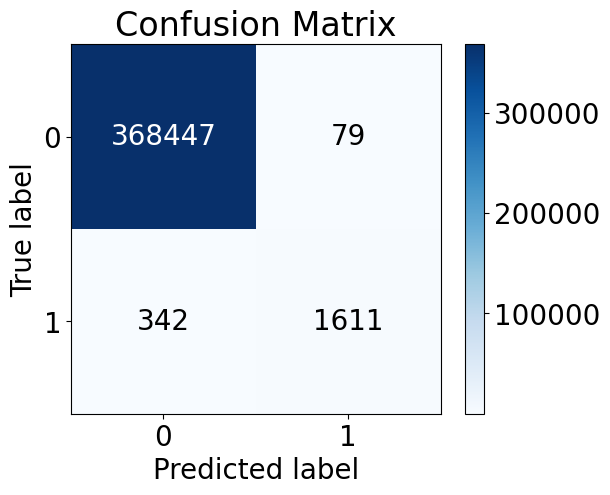

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,test_preds)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

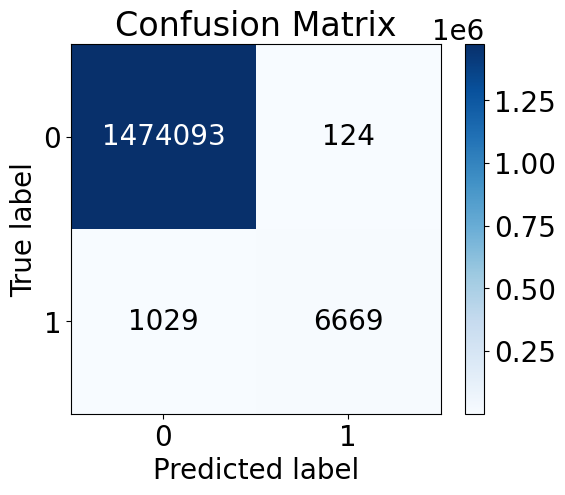

In [ ]:
skplt.metrics.plot_confusion_matrix(y_train, train_preds)

In [ ]:
print (classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.95      0.82      0.88      1953

    accuracy                           1.00    370479
   macro avg       0.98      0.91      0.94    370479
weighted avg       1.00      1.00      1.00    370479



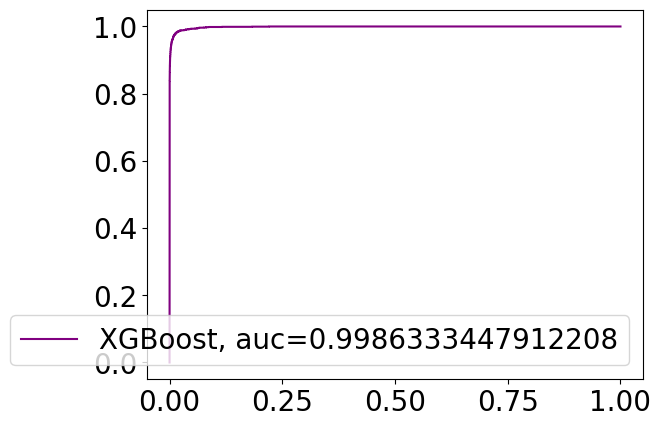

In [ ]:
# AUC Curve XGBoost
y_pred_probability_xgb =xgb_model2.predict_proba(X_test)[::,1]
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test, y_pred_probability_xgb)
xgb_auc = metrics.roc_auc_score(y_test, y_pred_probability_xgb)
plt.plot(fpr_xgb, tpr_xgb,color="purple",label="XGBoost, auc="+str(xgb_auc))
plt.legend(loc=4)
plt.show()

In [ ]:
XGB_accuracy1 = accuracy_score(y_test, test_preds)
print('XGBoost model accuracy is: {:.2f}%'.format(XGB_accuracy1 * 100))
XGB_precison1 = precision_score( y_test, test_preds)
print('XGBoost model precision is: {:.2f}%'.format(XGB_precison1 * 100))
XGB_recall1 = recall_score( y_test, test_preds)
print('XGBoost model recall is: {:.2f}%'.format(XGB_recall1 * 100))
XGB_f11 = f1_score( y_test, test_preds)
print('XGBoost model f1_score is: {:.2f}%'.format(XGB_f11 * 100))
XGB_auc1 =roc_auc_score( y_test, y_pred_probability_xgb)
print('XGBoost model auc is: {:.2f}%'.format(XGB_auc1 * 100))

XGBoost model accuracy is: 99.89%
XGBoost model precision is: 95.33%
XGBoost model recall is: 82.49%
XGBoost model f1_score is: 88.44%
XGBoost model auc is: 99.86%


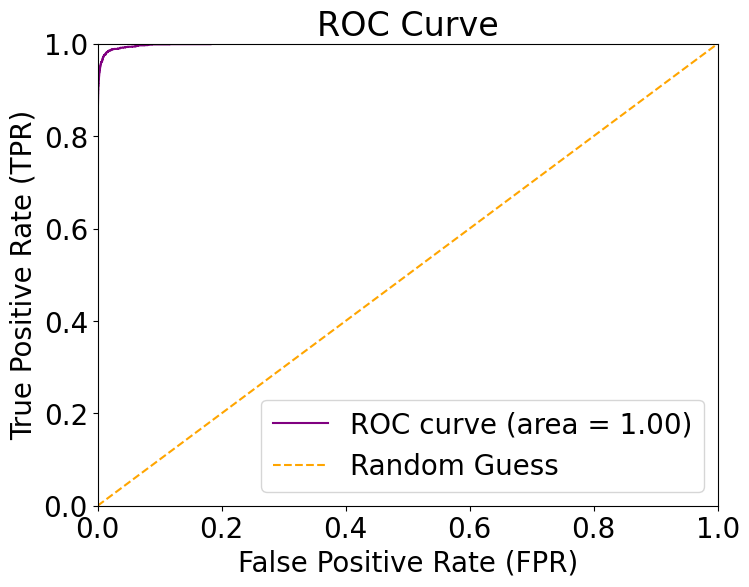

In [ ]:
xgb_fpr,xgb_tpr, _ = metrics.roc_curve(y_test, y_pred_probability_xgb)
auc_xgb = metrics.roc_auc_score(y_test, y_pred_probability_xgb)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(xgb_fpr,xgb_tpr, color='purple',label='ROC curve (area = %0.2f)' % auc_xgb)
plt.plot([0, 1], [0, 1], linestyle='--', color='orange', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# **ADAPTIVE GRADIANT BOOSTING :)**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
adap_model1= AdaBoostClassifier().fit(X_train,y_train)
train_preds = adap_model1.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(y_train, train_preds))
#predict on test
test_preds = adap_model1.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(y_test, test_preds))
print('-'*50)


Model accuracy on train is:  0.9961738696214021
Model accuracy on test is:  0.9962669948903986
--------------------------------------------------


In [ ]:
train_preds =adap_model1.predict(X_train)
print("Model precision on train is: ", precision_score(y_train, train_preds))
#predict on test
test_preds =adap_model1.predict(X_test)
#precisionon test
print("Model precision on test is: ", precision_score(y_test, test_preds))
print('-'*50)

Model precision on train is:  0.7624223602484472
Model precision on test is:  0.7844311377245509
--------------------------------------------------


In [ ]:
train_preds =adap_model1.predict(X_train)
print("Model recall on train is: ", recall_score(y_train, train_preds))
#predict on test
test_preds =adap_model1.predict(X_test)
#recall_score on test
print("Model recall on test is: ", recall_score(y_test, test_preds))
print('-'*50)

Model recall on train is:  0.38269680436477005
Model recall on test is:  0.402457757296467
--------------------------------------------------


In [ ]:
train_preds =adap_model1.predict(X_train)
print("Model f1_score on train is: ",f1_score(y_train, train_preds))
#predict on test
test_preds =adap_model1.predict(X_test)
#f1_score on test
print("Model f1_score on test is: ", f1_score(y_test, test_preds))
print('-'*50)

Model f1_score on train is:  0.5096004151530877
Model f1_score on test is:  0.531979695431472
--------------------------------------------------


In [ ]:

#ROC
print("ROC score on train is: ", roc_auc_score(y_train, train_preds))
print("ROC score on test is: ", roc_auc_score(y_test, test_preds))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(y_train, train_preds))
print("confusion_matrix test is: ", confusion_matrix(y_test, test_preds))

print('-'*50)

ROC score on train is:  0.6910370504614376
ROC score on test is:  0.7009358192711475
--------------------------------------------------
confusion_matrix train is:  [[1473299     918]
 [   4752    2946]]
confusion_matrix test is:  [[368310    216]
 [  1167    786]]
--------------------------------------------------


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

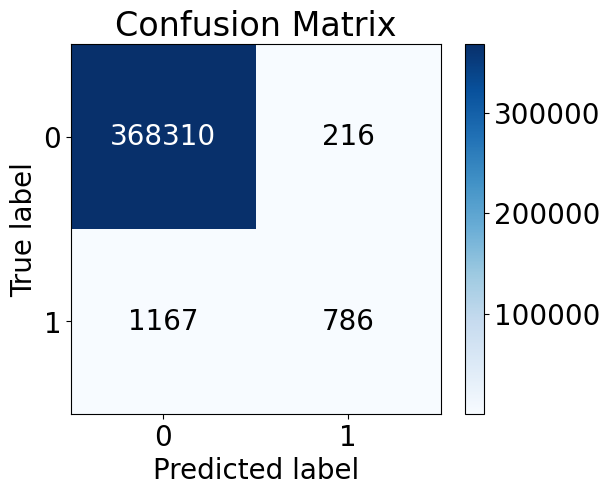

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test,test_preds)


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

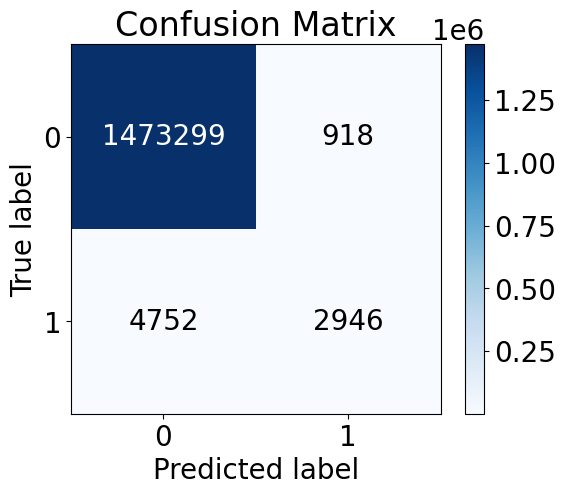

In [ ]:
skplt.metrics.plot_confusion_matrix(y_train, train_preds)

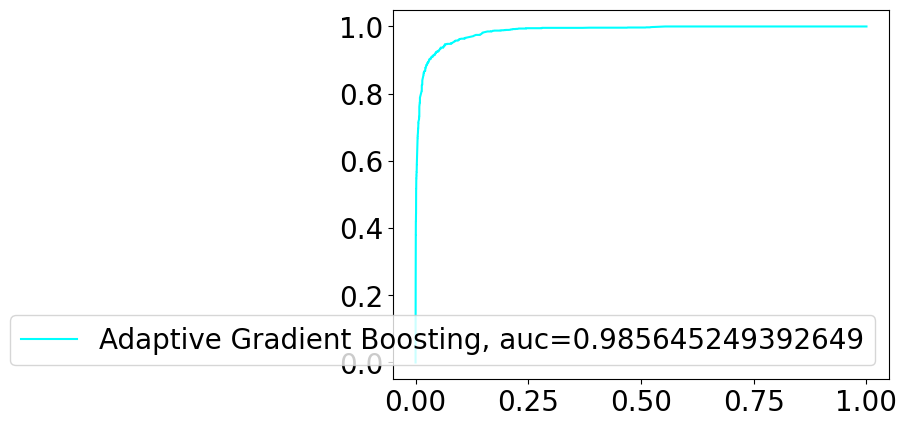

In [ ]:
y_pred_probability_ada = adap_model1.predict_proba(X_test)[::,1]
fpr_ada, tpr_ada, _ = metrics.roc_curve(y_test, y_pred_probability_ada)
adaboost_auc = metrics.roc_auc_score(y_test, y_pred_probability_ada)
plt.plot(fpr_ada, tpr_ada,color="cyan",label="Adaptive Gradient Boosting, auc="+str(adaboost_auc))
plt.legend(loc=4)
plt.show()

In [ ]:
adap_accuracy = accuracy_score(y_test, test_preds)
print('Ada model accuracy is: {:.2f}%'.format(adap_accuracy * 100))

adap_precision = precision_score(y_test,test_preds)
print('Ada model precision is: {:.2f}%'.format(adap_precision * 100))

adap_recall = recall_score(y_test, test_preds)
print('Ada model recall is: {:.2f}%'.format(adap_recall * 100))

adap_f1 = f1_score(y_test, test_preds)
print('Ada model f1_score is: {:.2f}%'.format(adap_f1 * 100))

adap_auc = roc_auc_score(y_test, y_pred_probability_ada)
print('Ada model auc is: {:.2f}%'.format(adap_auc * 100))

Ada model accuracy is: 99.63%
Ada model precision is: 78.44%
Ada model recall is: 40.25%
Ada model f1_score is: 53.20%
Ada model auc is: 98.56%


In [ ]:
print (classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.78      0.40      0.53      1953

    accuracy                           1.00    370479
   macro avg       0.89      0.70      0.77    370479
weighted avg       1.00      1.00      1.00    370479



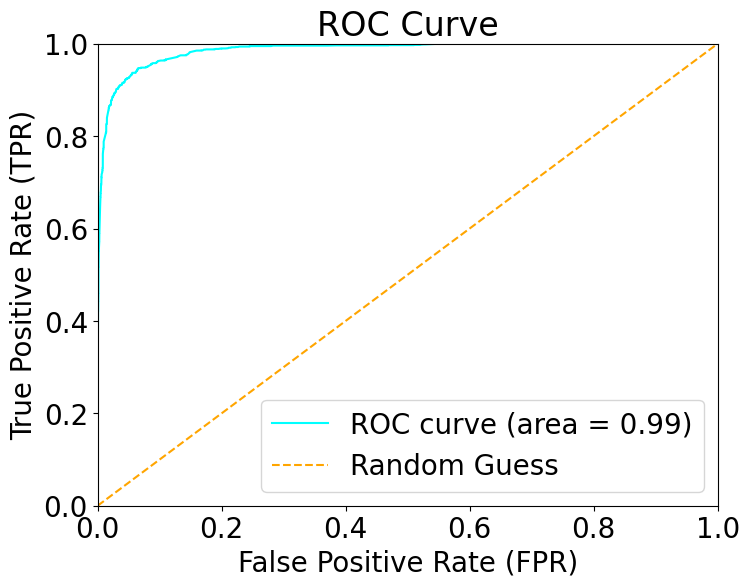

In [ ]:
adap_fpr,adap_tpr, _ = metrics.roc_curve(y_test, y_pred_probability_ada)
auc_adap = metrics.roc_auc_score(y_test, y_pred_probability_ada)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(adap_fpr,adap_tpr, color='cyan',label='ROC curve (area = %0.2f)' % auc_adap)
plt.plot([0, 1], [0, 1], linestyle='--', color='orange', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model1 = RandomForestClassifier().fit(X_train,y_train)
train_preds = rf_model1.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(y_train, train_preds))
#predict on test
test_preds = rf_model1.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(y_test, test_preds))
print('-'*50)

Model accuracy on train is:  0.9999979755923922
Model accuracy on test is:  0.9986045092974231
--------------------------------------------------


In [ ]:
train_preds =rf_model1.predict(X_train)
print("Model precision on train is: ", precision_score(y_train, train_preds))
#predict on test
test_preds =rf_model1.predict(X_test)
#precision on test
print("Model precision on test is: ", precision_score(y_test, test_preds))
print('-'*50)

Model precision on train is:  1.0
Model precision on test is:  0.9711286089238845
--------------------------------------------------


In [ ]:
train_preds =rf_model1.predict(X_train)
print("Model recall on train is: ", recall_score(y_train, train_preds))
#predict on test
test_preds =rf_model1.predict(X_test)
#recall_score on test
print("Model recall on test is: ", recall_score(y_test, test_preds))
print('-'*50)

Model recall on train is:  0.9996102883865939
Model recall on test is:  0.7578084997439836
--------------------------------------------------


In [ ]:
train_preds =rf_model1.predict(X_train)
print("Model f1_score on train is: ",f1_score(y_train, train_preds))
#predict on test
test_preds =rf_model1.predict(X_test)
#f1_score on test
print("Model f1_score on test is: ", f1_score(y_test, test_preds))
print('-'*50)

Model f1_score on train is:  0.9998051062171117
Model f1_score on test is:  0.8513085993672705
--------------------------------------------------


In [ ]:

#ROC
print("ROC score on train is: ", roc_auc_score(y_train, train_preds))
print("ROC score on test is: ", roc_auc_score(y_test, test_preds))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(y_train, train_preds))
print("confusion_matrix test is: ", confusion_matrix(y_test, test_preds))

print('-'*50)

ROC score on train is:  0.9998051441932969
ROC score on test is:  0.8788445525914743
--------------------------------------------------
confusion_matrix train is:  [[1474217       0]
 [      3    7695]]
confusion_matrix test is:  [[368482     44]
 [   473   1480]]
--------------------------------------------------


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

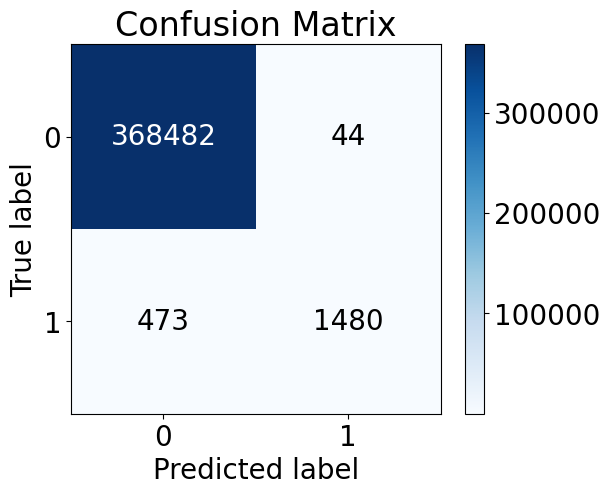

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test,test_preds)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

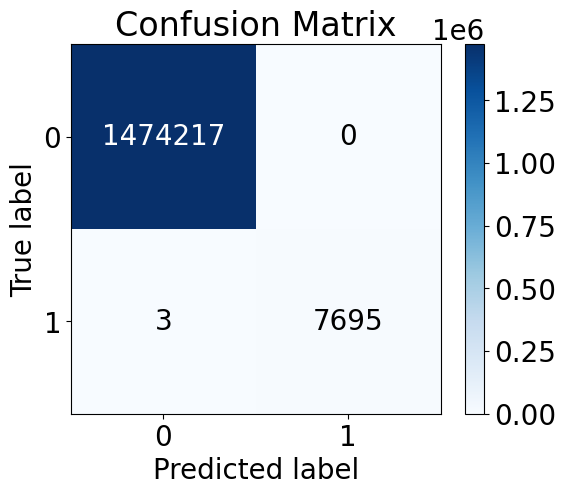

In [ ]:
skplt.metrics.plot_confusion_matrix(y_train, train_preds)

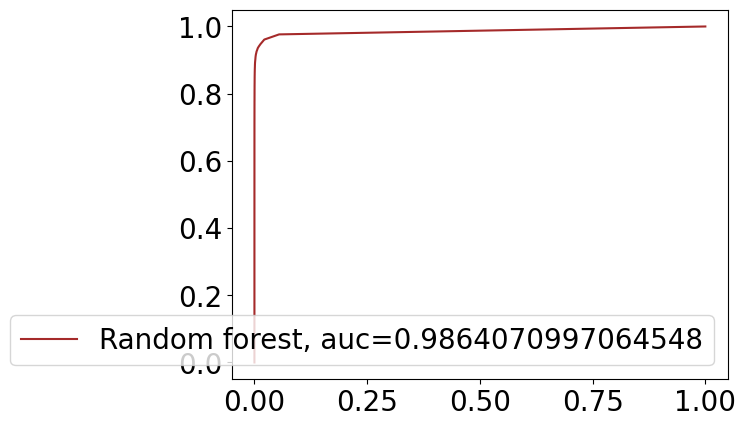

In [ ]:
y_pred_probability_rf = rf_model1.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test, y_pred_probability_rf)
rf_auc = metrics.roc_auc_score(y_test, y_pred_probability_rf)
plt.plot(fpr_rf, tpr_rf,color='brown',label="Random forest, auc="+str(rf_auc))
plt.legend(loc=4)
plt.show()


In [ ]:
rf_accuracy1 = accuracy_score(y_test, test_preds)
print('RF model accuracy is: {:.2f}%'.format(rf_accuracy1 * 100))
rf_precison1 = precision_score( y_test, test_preds)
print('RF model precision is: {:.2f}%'.format(rf_precison1 * 100))
rf_recall1 = recall_score( y_test, test_preds)
print('RF model recall is: {:.2f}%'.format(rf_recall1 * 100))
rf_f11 = f1_score( y_test, test_preds)
print('RF model f1_score is: {:.2f}%'.format(rf_f11 * 100))
rf_auc =roc_auc_score( y_test, y_pred_probability_rf)
print('RF model auc is: {:.2f}%'.format(rf_auc * 100))

RF model accuracy is: 99.86%
RF model precision is: 97.11%
RF model recall is: 75.78%
RF model f1_score is: 85.13%
RF model auc is: 98.64%


In [ ]:
print (classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.97      0.76      0.85      1953

    accuracy                           1.00    370479
   macro avg       0.98      0.88      0.93    370479
weighted avg       1.00      1.00      1.00    370479



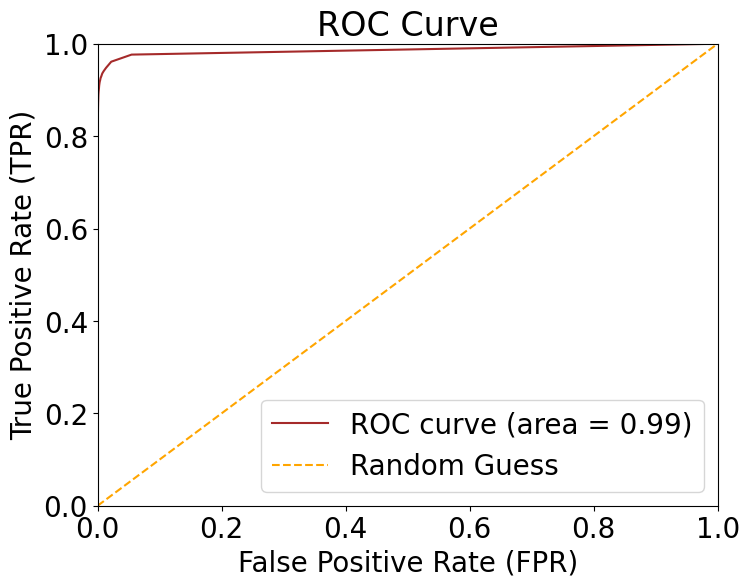

In [ ]:
rf_fpr,rf_tpr, _ = metrics.roc_curve(y_test, y_pred_probability_rf)
auc_rf = metrics.roc_auc_score(y_test, y_pred_probability_rf)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr,rf_tpr, color='brown',label='ROC curve (area = %0.2f)' % auc_rf)
plt.plot([0, 1], [0, 1], linestyle='--', color='orange', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# **LGBOOST :)**

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb

In [ ]:
lgb_model1 = lgb.LGBMClassifier(objective='binary', learning_rate=0.1, n_estimators=100).fit(X_train,y_train)
train_preds = lgb_model1.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(y_train, train_preds))
#predict on test
test_preds = lgb_model1.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(y_test, test_preds))
print('-'*50)

[LightGBM] [Info] Number of positive: 7698, number of negative: 1474217
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.069070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2426
[LightGBM] [Info] Number of data points in the train set: 1481915, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005195 -> initscore=-5.254922
[LightGBM] [Info] Start training from score -5.254922
Model accuracy on train is:  0.9983420101692743
Model accuracy on test is:  0.9979782929666728
--------------------------------------------------


In [ ]:
train_preds =lgb_model1.predict(X_train)
print("Model precision on train is: ", precision_score(y_train, train_preds))
#predict on test
test_preds =lgb_model1.predict(X_test)
# precision_score on test
print("Model precision on test is: ", precision_score(y_test, test_preds))
print('-'*50)

Model precision on train is:  0.8968650613357565
Model precision on test is:  0.8432155074116305
--------------------------------------------------


In [ ]:
train_preds =lgb_model1.predict(X_train)
print("Model recall on train is: ", recall_score(y_train, train_preds))
#predict on test
test_preds =lgb_model1.predict(X_test)
#recall_score on test
print("Model recall on test is: ", recall_score(y_test, test_preds))
print('-'*50)

Model recall on train is:  0.769290724863601
Model recall on test is:  0.7572964669738863
--------------------------------------------------


In [ ]:
train_preds =lgb_model1.predict(X_train)
print("Model f1_score on train is: ",f1_score(y_train, train_preds))
#predict on test
test_preds =lgb_model1.predict(X_test)
#f1_score on test
print("Model f1_score on test is: ", f1_score(y_test, test_preds))
print('-'*50)

Model f1_score on train is:  0.828193832599119
Model f1_score on test is:  0.7979498246560561
--------------------------------------------------


In [ ]:

#ROC
print("ROC score on train is: ", roc_auc_score(y_train, train_preds))
print("ROC score on test is: ", roc_auc_score(y_test, test_preds))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(y_train, train_preds))
print("confusion_matrix test is: ", confusion_matrix(y_test, test_preds))

print('-'*50)

ROC score on train is:  0.8844143923643002
ROC score on test is:  0.8782751254837087
--------------------------------------------------
confusion_matrix train is:  [[1473536     681]
 [   1776    5922]]
confusion_matrix test is:  [[368251    275]
 [   474   1479]]
--------------------------------------------------


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

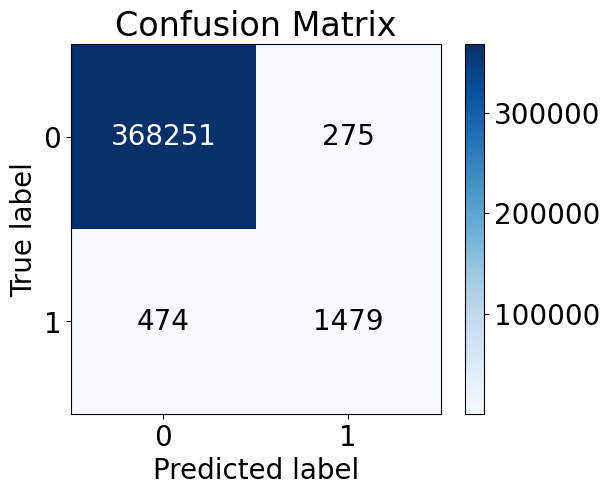

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test,test_preds)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

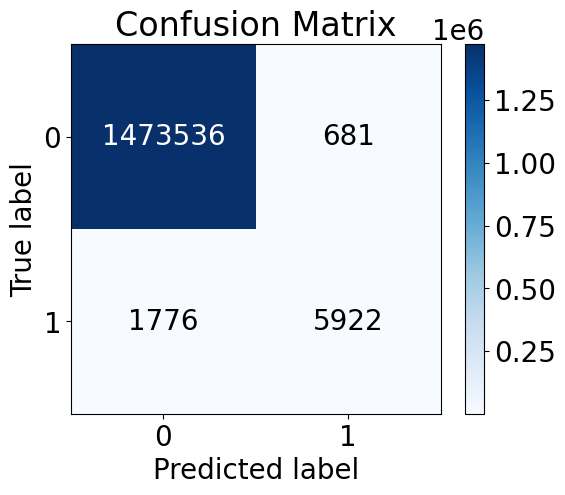

In [ ]:
skplt.metrics.plot_confusion_matrix(y_train, train_preds)

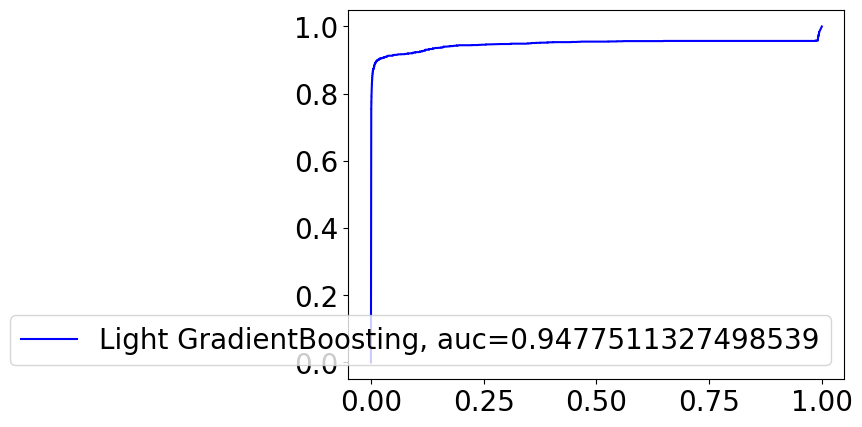

In [ ]:
y_pred_probability_lgb = lgb_model1.predict_proba(X_test)[::,1]
fpr_lgb, tpr_lgb, _ = metrics.roc_curve(y_test, y_pred_probability_lgb)
lgb_auc = metrics.roc_auc_score(y_test, y_pred_probability_lgb)
plt.plot(fpr_lgb, tpr_lgb,color='blue',label="Light GradientBoosting, auc="+str(lgb_auc))
plt.legend(loc=4)
plt.show()

In [ ]:
lgb_accuracy1 = accuracy_score( y_test,test_preds)
print('LGB model accuracy is: {:.2f}%'.format(lgb_accuracy1 * 100))
lgb_precison1 = precision_score(  y_test,test_preds)
print('LGB model precision is: {:.2f}%'.format(lgb_precison1 * 100))
lgb_recall1 = recall_score(  y_test,test_preds)
print('LGB model recall is: {:.2f}%'.format(lgb_recall1 * 100))
lgb_f11 = f1_score(  y_test,test_preds)
print('LGB model f1_score is: {:.2f}%'.format(lgb_f11 * 100))
lgb_auc1 =roc_auc_score( y_test, y_pred_probability_lgb)
print('LGB model auc is: {:.2f}%'.format(lgb_auc1 * 100))

LGB model accuracy is: 99.80%
LGB model precision is: 84.32%
LGB model recall is: 75.73%
LGB model f1_score is: 79.79%
LGB model auc is: 94.78%


In [ ]:
print (classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.84      0.76      0.80      1953

    accuracy                           1.00    370479
   macro avg       0.92      0.88      0.90    370479
weighted avg       1.00      1.00      1.00    370479



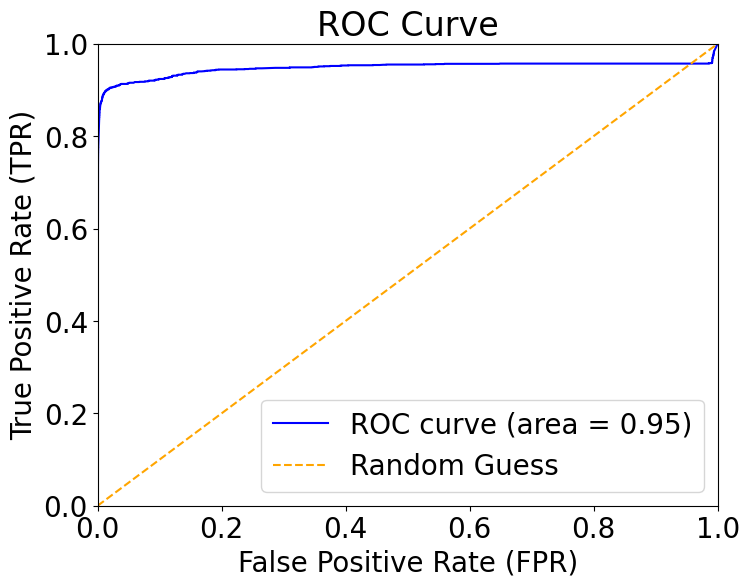

In [ ]:
lgb_fpr,lgb_tpr, _ = metrics.roc_curve(y_test, y_pred_probability_lgb)
auc_lgb = metrics.roc_auc_score(y_test, y_pred_probability_lgb)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(lgb_fpr,lgb_tpr, color='blue',label='ROC curve (area = %0.2f)' % auc_lgb)
plt.plot([0, 1], [0, 1], linestyle='--', color='orange', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# **CATBOOST :)**

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.1 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

cat_model1 =CatBoostClassifier(objective='CrossEntropy', learning_rate=0.1, n_estimators=100).fit(X_train,y_train)
train_preds = cat_model1.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(y_train, train_preds))
#predict on test
test_preds = cat_model1.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(y_test, test_preds))
print('-'*50)




0:	learn: 0.6008156	total: 363ms	remaining: 35.9s
1:	learn: 0.5236974	total: 557ms	remaining: 27.3s
2:	learn: 0.4591581	total: 755ms	remaining: 24.4s
3:	learn: 0.4056294	total: 988ms	remaining: 23.7s
4:	learn: 0.3596698	total: 1.19s	remaining: 22.5s
5:	learn: 0.3194261	total: 1.38s	remaining: 21.6s
6:	learn: 0.2856388	total: 1.59s	remaining: 21.2s
7:	learn: 0.2555308	total: 1.83s	remaining: 21s
8:	learn: 0.2289790	total: 2.02s	remaining: 20.4s
9:	learn: 0.2057023	total: 2.22s	remaining: 20s
10:	learn: 0.1847700	total: 2.4s	remaining: 19.4s
11:	learn: 0.1665309	total: 2.66s	remaining: 19.5s
12:	learn: 0.1502055	total: 3.05s	remaining: 20.4s
13:	learn: 0.1358116	total: 3.39s	remaining: 20.8s
14:	learn: 0.1229744	total: 3.76s	remaining: 21.3s
15:	learn: 0.1115196	total: 4.13s	remaining: 21.7s
16:	learn: 0.1014345	total: 4.49s	remaining: 21.9s
17:	learn: 0.0922449	total: 4.86s	remaining: 22.1s
18:	learn: 0.0840505	total: 5.18s	remaining: 22.1s
19:	learn: 0.0766833	total: 5.54s	remaining: 2

In [ ]:
train_preds =cat_model1.predict(X_train)
print("Model precision on train is: ", precision_score(y_train, train_preds))
#predict on test
test_preds =cat_model1.predict(X_test)
#precision_score on test
print("Model precision on test is: ", precision_score(y_test, test_preds))
print('-'*50)

Model precision on train is:  0.9351289210050912
Model precision on test is:  0.9394925178919974
--------------------------------------------------


In [ ]:
train_preds =cat_model1.predict(X_train)
print("Model recall on train is: ", recall_score(y_train, train_preds))
#predict on test
test_preds =cat_model1.predict(X_test)
#recall_score on test
print("Model recall on test is: ", recall_score(y_test, test_preds))
print('-'*50)

Model recall on train is:  0.7396726422447389
Model recall on test is:  0.7393753200204813
--------------------------------------------------


In [ ]:
train_preds =cat_model1.predict(X_train)
print("Model f1_score on train is: ",f1_score(y_train, train_preds))
#predict on test
test_preds =cat_model1.predict(X_test)
#f1_score on test
print("Model f1_score on test is: ", f1_score(y_test, test_preds))
print('-'*50)

Model f1_score on train is:  0.825995503010082
Model f1_score on test is:  0.8275071633237822
--------------------------------------------------


In [ ]:

#ROC
print("ROC score on train is: ", roc_auc_score(y_train, train_preds))
print("ROC score on test is: ", roc_auc_score(y_test, test_preds))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(y_train, train_preds))
print("confusion_matrix test is: ", confusion_matrix(y_test, test_preds))

print('-'*50)

ROC score on train is:  0.8697023516999575
ROC score on test is:  0.8695614816673287
--------------------------------------------------
confusion_matrix train is:  [[1473822     395]
 [   2004    5694]]
confusion_matrix test is:  [[368433     93]
 [   509   1444]]
--------------------------------------------------


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

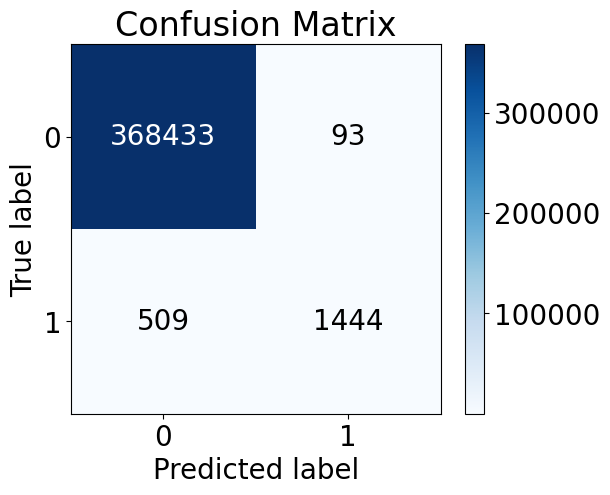

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test,test_preds)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

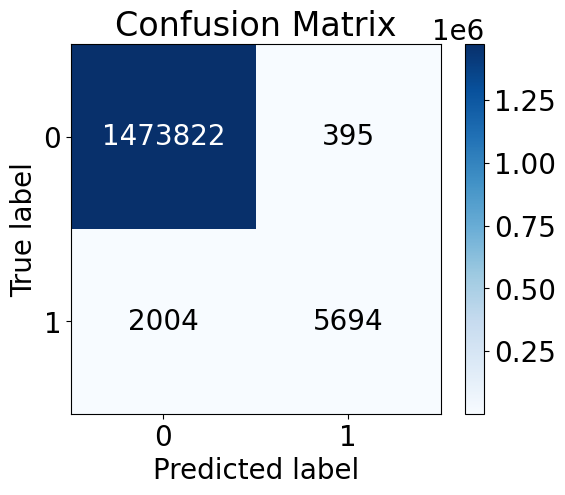

In [ ]:
skplt.metrics.plot_confusion_matrix(y_train, train_preds)

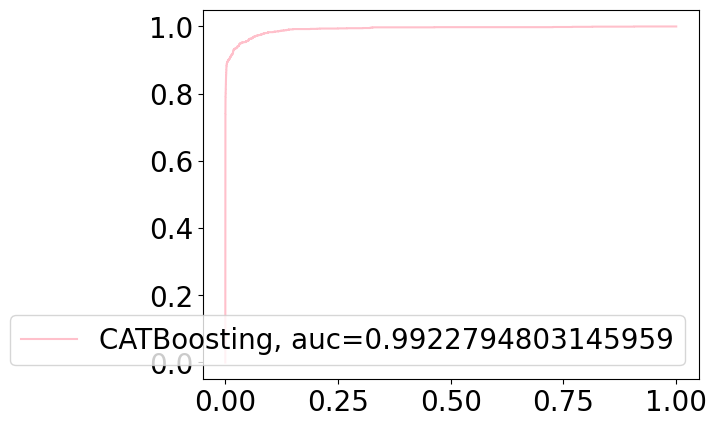

In [ ]:
y_pred_probability_cb = cat_model1.predict_proba(X_test)[::,1]
fpr_cb, tpr_cb, _ = metrics.roc_curve(y_test, y_pred_probability_cb)
cb_auc = metrics.roc_auc_score(y_test, y_pred_probability_cb)
plt.plot(fpr_cb, tpr_cb,color='pink',label="CATBoosting, auc="+str(cb_auc))
plt.legend(loc=4)
plt.show()

In [ ]:



cat_accuracy1 = accuracy_score(y_test, test_preds)
print('CB model accuracy is: {:.2f}%'.format(cat_accuracy1 * 100))

cat_precision1 = precision_score(y_test, test_preds)
print('CB model precision is: {:.2f}%'.format(cat_precision1 * 100))

cat_recall1 = recall_score(y_test, test_preds)
print('CB model recall is: {:.2f}%'.format(cat_recall1 * 100))

cat_f11 = f1_score(y_test, test_preds)
print('CB model f1_score is: {:.2f}%'.format(cat_f11 * 100))

cat_auc1 = roc_auc_score(y_test, y_pred_probability_cb)
print('CB model auc is: {:.2f}%'.format(cat_auc1 * 100))


CB model accuracy is: 99.84%
CB model precision is: 93.95%
CB model recall is: 73.94%
CB model f1_score is: 82.75%
CB model auc is: 99.23%


In [ ]:
print (classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.94      0.74      0.83      1953

    accuracy                           1.00    370479
   macro avg       0.97      0.87      0.91    370479
weighted avg       1.00      1.00      1.00    370479



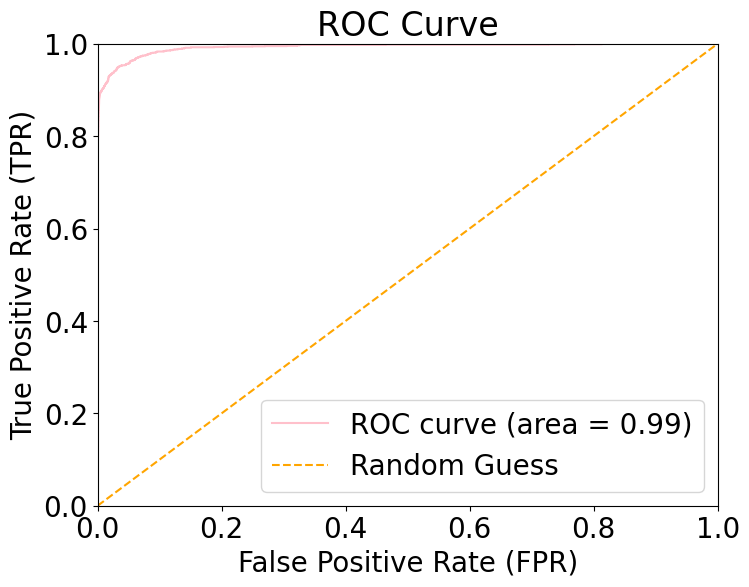

In [ ]:
cb_fpr,cb_tpr, _ = metrics.roc_curve(y_test, y_pred_probability_cb)
auc_cb = metrics.roc_auc_score(y_test, y_pred_probability_cb)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(cb_fpr,cb_tpr, color='pink',label='ROC curve (area = %0.2f)' % auc_cb)
plt.plot([0, 1], [0, 1], linestyle='--', color='orange', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# **HistGradientBoosting:)**

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [ ]:
hgb_model1 =HistGradientBoostingClassifier(max_iter=100, learning_rate=0.1).fit(X_train,y_train)
train_preds = hgb_model1 .predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(y_train, train_preds))
#predict on test
test_preds = hgb_model1 .predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(y_test, test_preds))
print('-'*50)

Model accuracy on train is:  0.9976489879648968
Model accuracy on test is:  0.9976624855929755
--------------------------------------------------


In [ ]:
train_preds =hgb_model1.predict(X_train)
print("Model precision on train is: ", precision_score(y_train, train_preds))
#predict on test
test_preds =hgb_model1.predict(X_test)
#precision_score on test
print("Model precision on test is: ", precision_score(y_test, test_preds))
print('-'*50)

Model precision on train is:  0.8771929824561403
Model precision on test is:  0.8798043326345213
--------------------------------------------------


In [ ]:
train_preds =hgb_model1.predict(X_train)
print("Model recall on train is: ", recall_score(y_train, train_preds))
#predict on test
test_preds =hgb_model1.predict(X_test)
#recall_score on test
print("Model recall on test is: ", recall_score(y_test, test_preds))
print('-'*50)

Model recall on train is:  0.6365289685632631
Model recall on test is:  0.6446492575524834
--------------------------------------------------


In [ ]:
train_preds =hgb_model1.predict(X_train)
print("Model f1_score on train is: ",f1_score(y_train, train_preds))
#predict on test
test_preds =hgb_model1.predict(X_test)
#f1_score on test
print("Model f1_score on test is: ", f1_score(y_test, test_preds))
print('-'*50)

Model f1_score on train is:  0.7377295995182173
Model f1_score on test is:  0.7440898345153665
--------------------------------------------------


In [ ]:
#ROC
print("ROC score on train is: ", roc_auc_score(y_train, train_preds))
print("ROC score on test is: ", roc_auc_score(y_test, test_preds))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(y_train, train_preds))
print("confusion_matrix test is: ", confusion_matrix(y_test, test_preds))

print('-'*50)

ROC score on train is:  0.8180318183986577
ROC score on test is:  0.8220912666796731
--------------------------------------------------
confusion_matrix train is:  [[1473531     686]
 [   2798    4900]]
confusion_matrix test is:  [[368354    172]
 [   694   1259]]
--------------------------------------------------


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

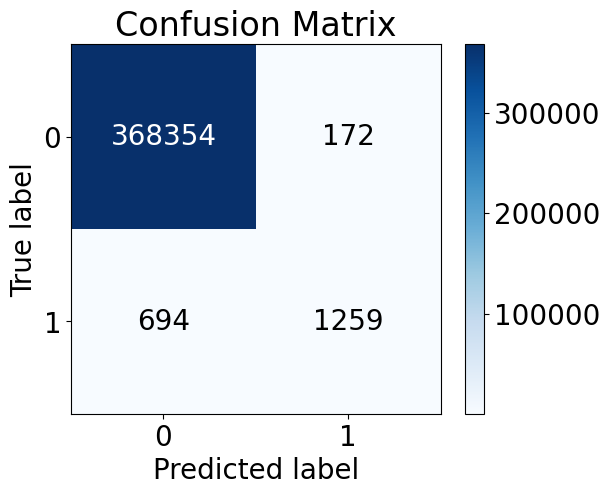

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test,test_preds)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

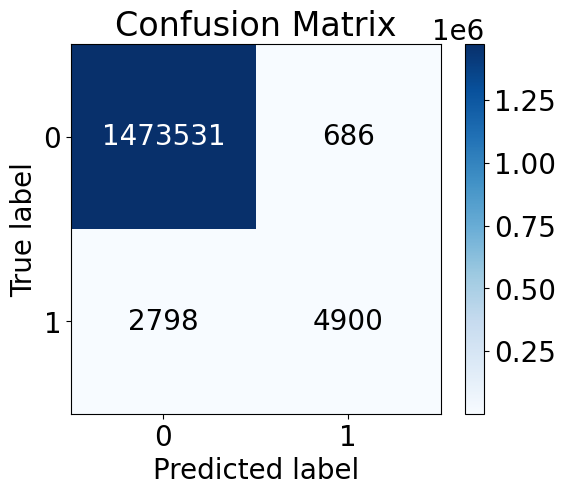

In [ ]:
skplt.metrics.plot_confusion_matrix(y_train, train_preds)

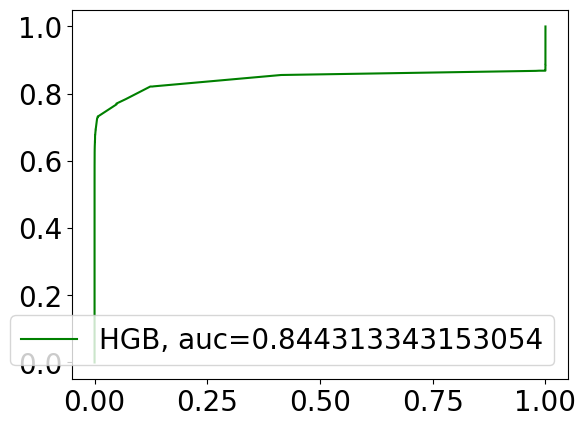

In [ ]:
y_pred_probability_hgb = hgb_model1.predict_proba(X_test)[::,1]
fpr_hgb, tpr_hgb, _ = metrics.roc_curve(y_test, y_pred_probability_hgb)
hgb_auc = metrics.roc_auc_score(y_test, y_pred_probability_hgb)
plt.plot(fpr_hgb, tpr_hgb,color='green',label="HGB, auc="+str(hgb_auc))
plt.legend(loc=4)
plt.show()

In [ ]:
hgb_accuracy1 = accuracy_score( y_test,test_preds)
print('HGB model accuracy is: {:.2f}%'.format(hgb_accuracy1 * 100))
hgb_precison1 = precision_score( y_test,test_preds)
print('HGB model precision is: {:.2f}%'.format(hgb_precison1 * 100))
hgb_recall1 = recall_score(y_test,test_preds)
print('HGB model recall is: {:.2f}%'.format(hgb_recall1 * 100))
hgb_f11 = f1_score( y_test,test_preds)
print('HGB model f1_score is: {:.2f}%'.format(hgb_f11 * 100))
hgb_auc1 =roc_auc_score( y_test, y_pred_probability_hgb)
print('HGB model auc is: {:.2f}%'.format(hgb_auc1 * 100))



HGB model accuracy is: 99.77%
HGB model precision is: 87.98%
HGB model recall is: 64.46%
HGB model f1_score is: 74.41%
HGB model auc is: 84.43%


In [ ]:
print (classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.88      0.64      0.74      1953

    accuracy                           1.00    370479
   macro avg       0.94      0.82      0.87    370479
weighted avg       1.00      1.00      1.00    370479



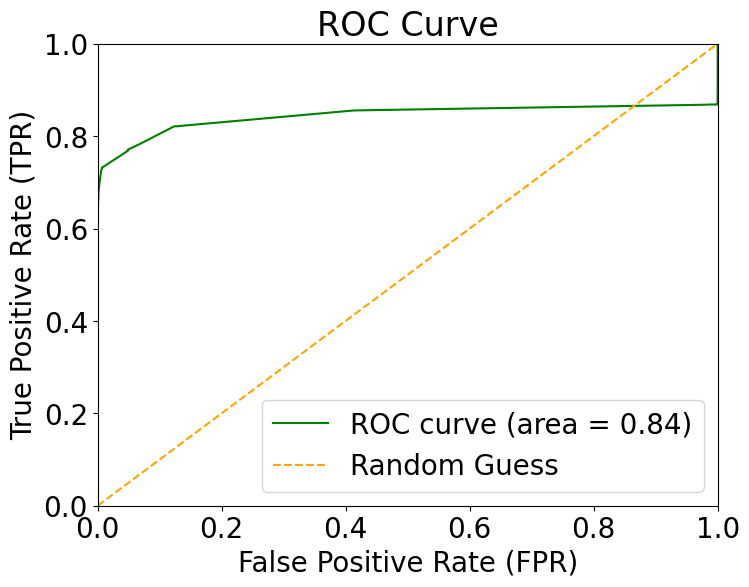

In [ ]:
hgb_fpr,hgb_tpr, _ = metrics.roc_curve(y_test, y_pred_probability_hgb)
auc_hgb = metrics.roc_auc_score(y_test, y_pred_probability_hgb)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(hgb_fpr,hgb_tpr, color='green',label='ROC curve (area = %0.2f)' % auc_hgb)
plt.plot([0, 1], [0, 1], linestyle='--', color='orange', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# **COMPARSATION :):):)**

In [ ]:
Algorithms = ['XGBClassifier','AdaBoostClassifier', 'RandomForest', 'LGBMClassifier','CatBoostClassifier','HistGradientBoostingClassifier' ]
accuracy = [XGB_accuracy1, adap_accuracy, rf_accuracy1,lgb_accuracy1 ,cat_accuracy1, hgb_accuracy1]

FinalResult=pd.DataFrame({'Algorithm':Algorithms, 'Accuracy':accuracy})

FinalResult

Algorithm  Accuracy
0                   XGBClassifier  0.998864
1              AdaBoostClassifier  0.996267
2                    RandomForest  0.998605
3                  LGBMClassifier  0.997978
4              CatBoostClassifier  0.998375
5  HistGradientBoostingClassifier  0.997662

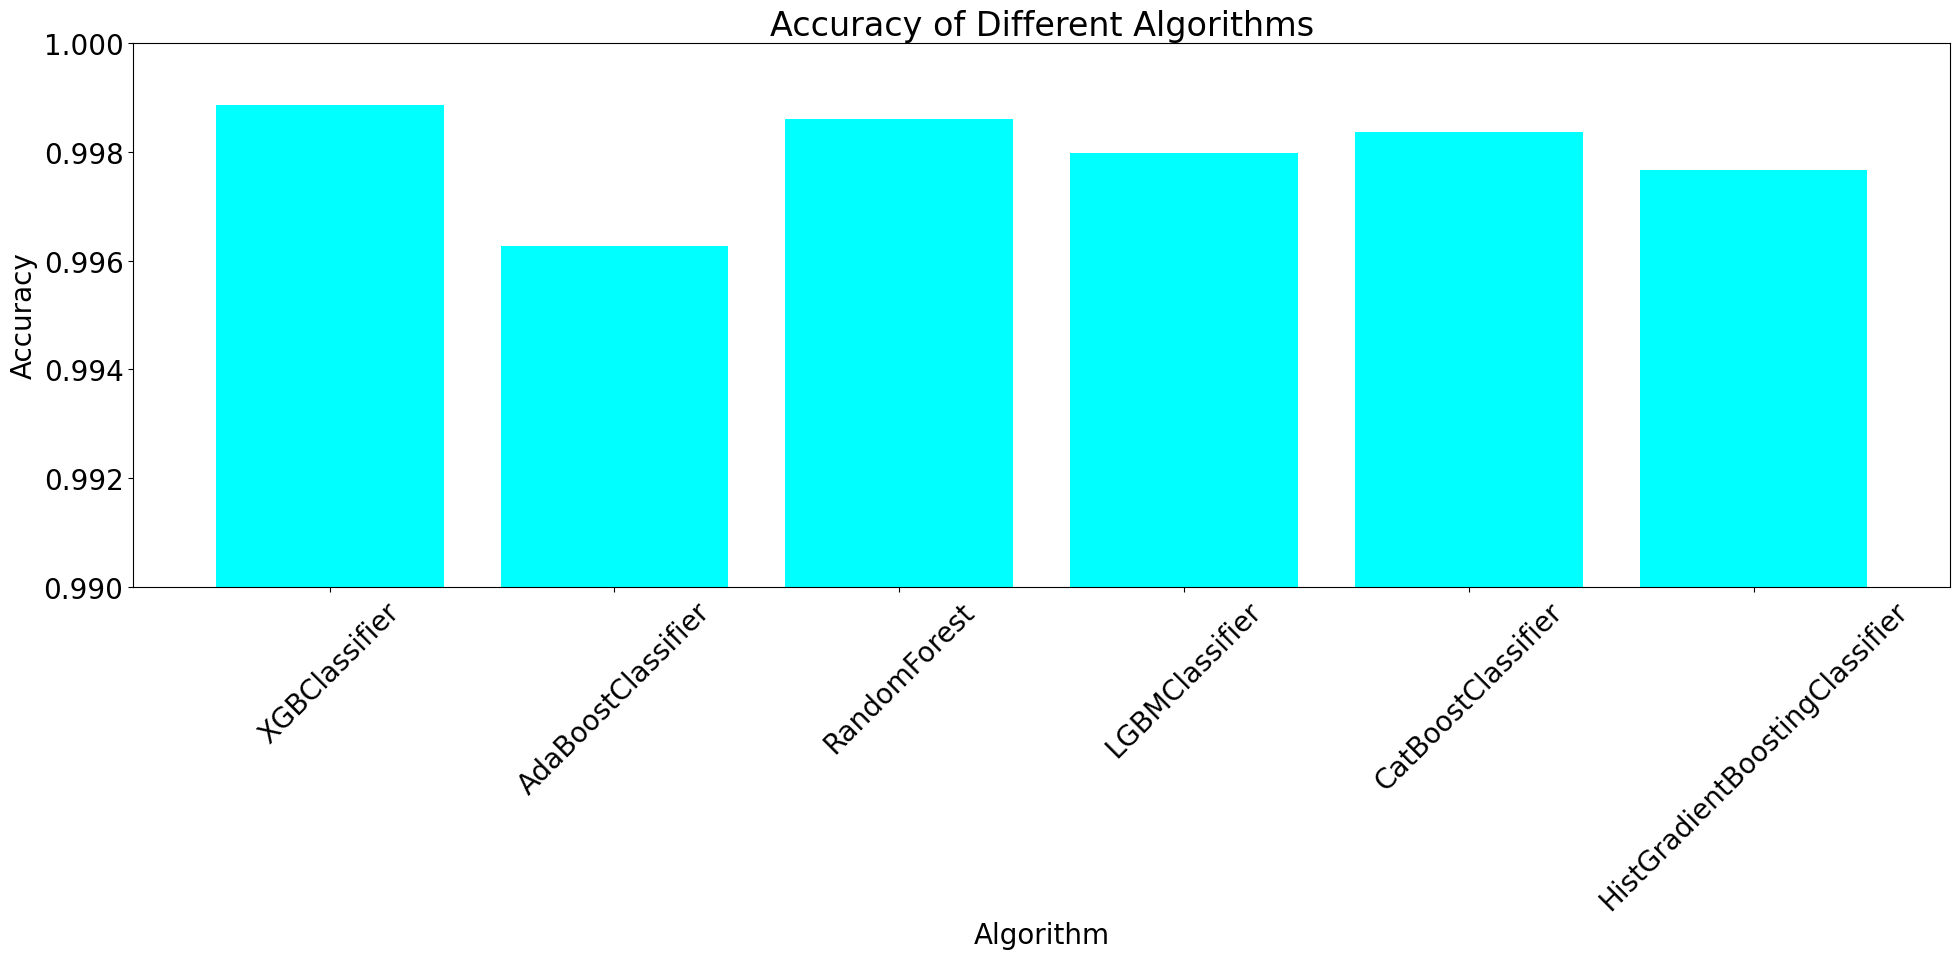

In [ ]:
plt.figure(figsize=(20, 10))
plt.bar(FinalResult['Algorithm'], FinalResult['Accuracy'], color='cyan')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms')
plt.ylim(0.99, 1)  # Set the limit of y-axis from 0 to 1 (accuracy ranges from 0 to 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
Algorithms = ['XGBClassifier','AdaBoostClassifier', 'RandomForest', 'LGBMClassifier','CatBoostClassifier','HistGradientBoostingClassifier'  ]
precision = [XGB_precison1, adap_precision, rf_precison1,lgb_precison1 ,cat_precision1,hgb_precison1 ]

FinalResult=pd.DataFrame({'Algorithm':Algorithms, 'Precision':precision})

FinalResult

Algorithm  Precision
0                   XGBClassifier   0.953254
1              AdaBoostClassifier   0.784431
2                    RandomForest   0.971129
3                  LGBMClassifier   0.843216
4              CatBoostClassifier   0.939493
5  HistGradientBoostingClassifier   0.879804

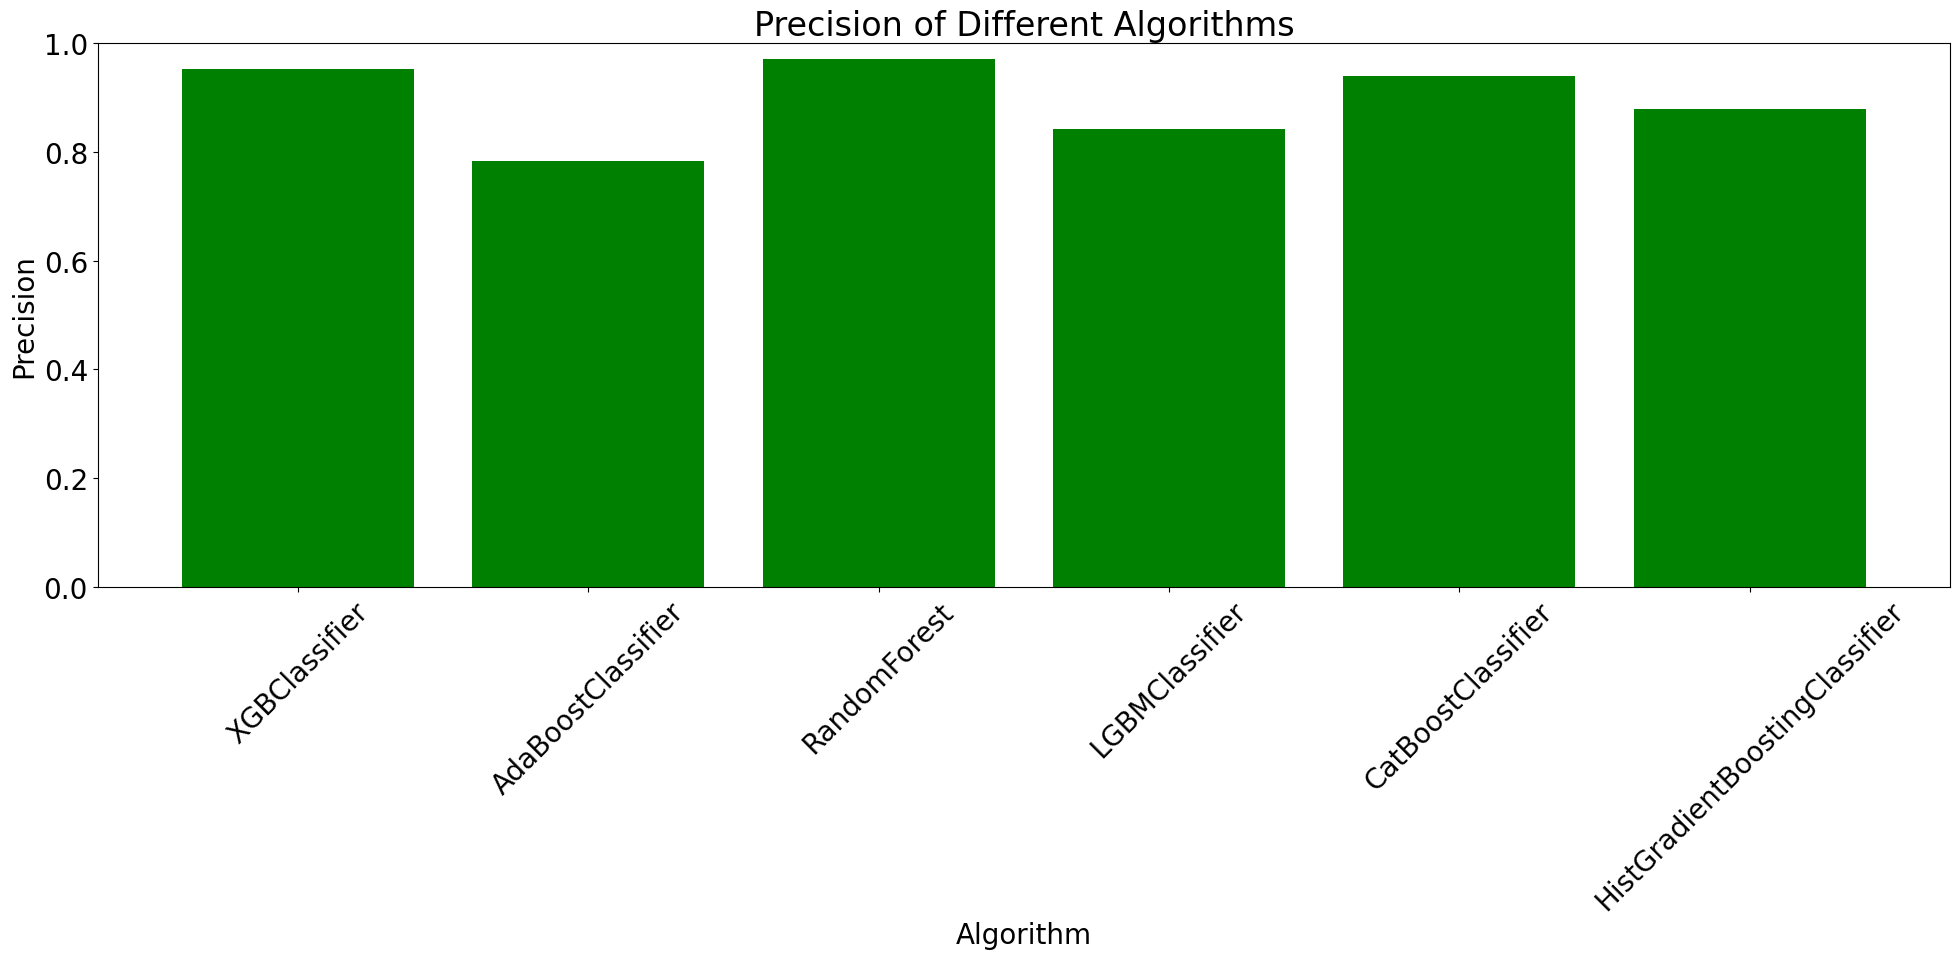

In [ ]:
plt.figure(figsize=(20, 10))
plt.bar(FinalResult['Algorithm'], FinalResult['Precision'], color='green')
plt.xlabel('Algorithm')
plt.ylabel('Precision')
plt.title('Precision of Different Algorithms')
plt.ylim(0, 1)  # Set the limit of y-axis from 0 to 1 (Precision ranges from 0 to 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
Algorithms = ['XGBClassifier','AdaBoostClassifier', 'RandomForest', 'LGBMClassifier','CatBoostClassifier','HistGradientBoostingClassifier'  ]
recall = [XGB_recall1, adap_recall, rf_recall1,lgb_recall1 ,cat_recall1 ,hgb_recall1 ]

FinalResult=pd.DataFrame({'Algorithm':Algorithms, 'Recall':recall })

FinalResult

Algorithm    Recall
0                   XGBClassifier  0.824885
1              AdaBoostClassifier  0.402458
2                    RandomForest  0.757808
3                  LGBMClassifier  0.757296
4              CatBoostClassifier  0.739375
5  HistGradientBoostingClassifier  0.644649

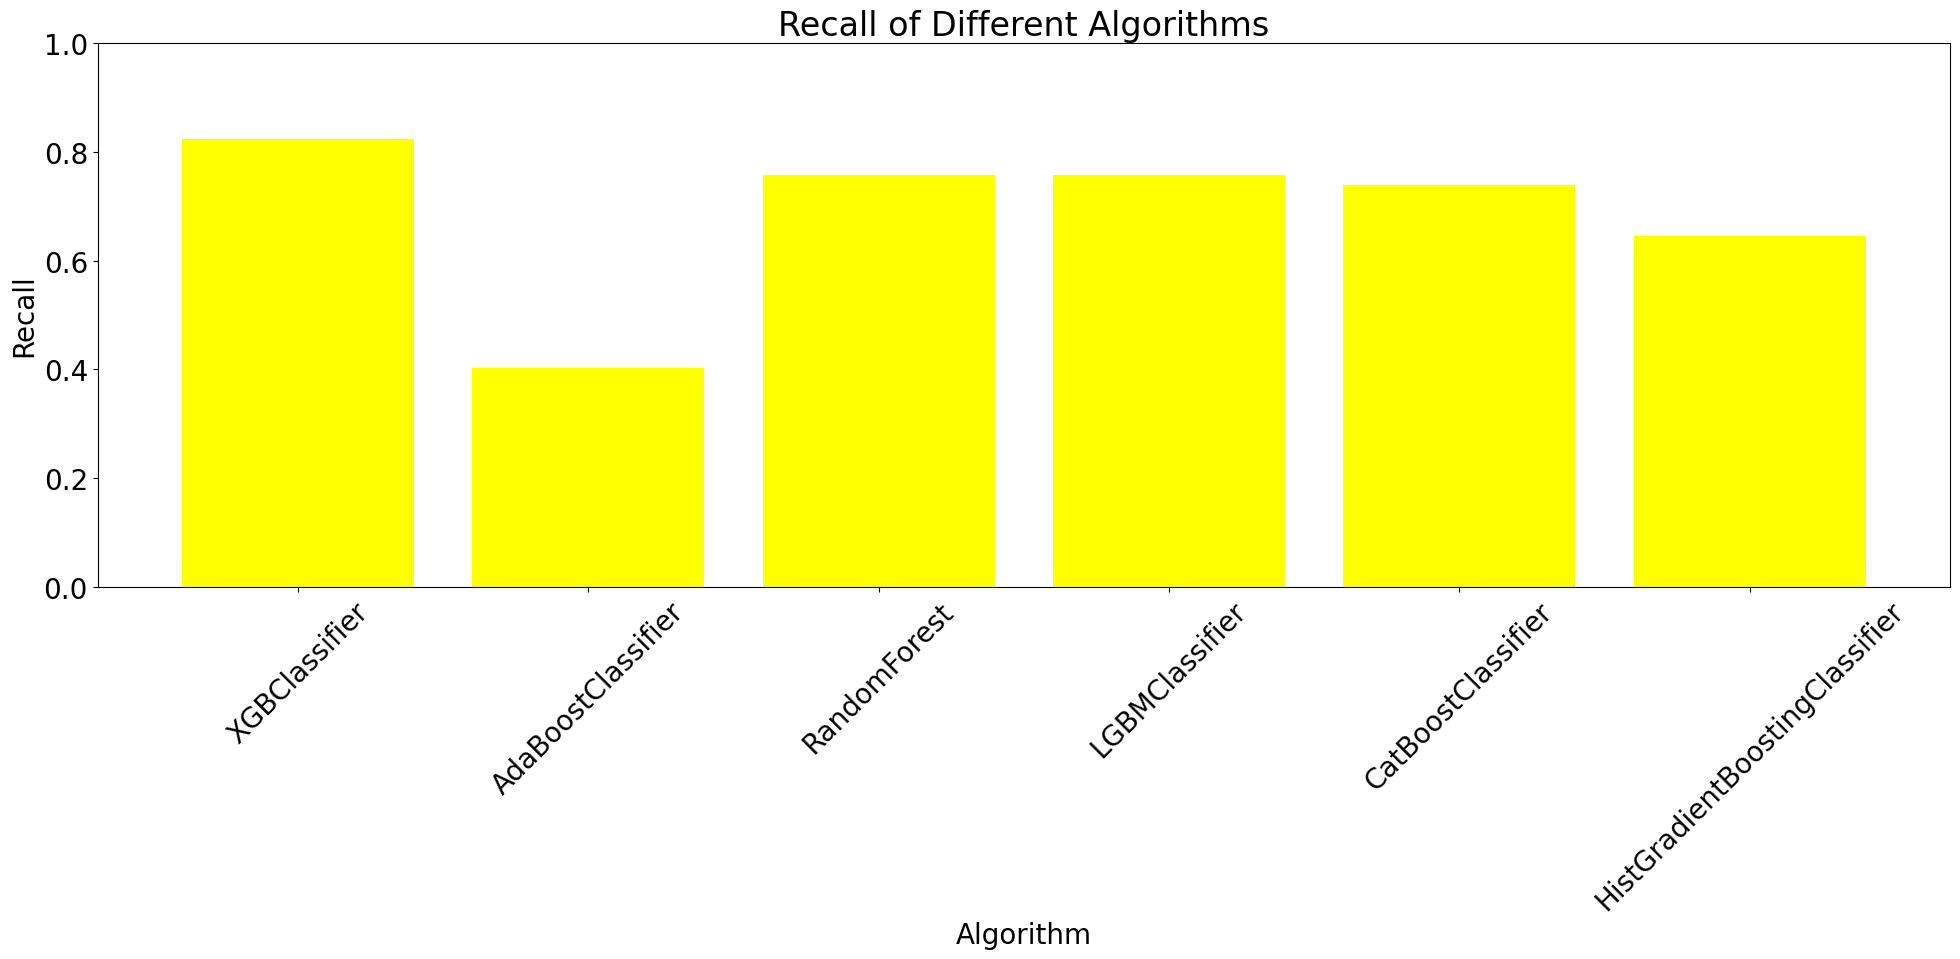

In [ ]:
plt.figure(figsize=(20, 10))
plt.bar(FinalResult['Algorithm'], FinalResult['Recall'], color='yellow')
plt.xlabel('Algorithm')
plt.ylabel('Recall')
plt.title('Recall of Different Algorithms')
plt.ylim(0, 1)  # Set the limit of y-axis from 0 to 1 (Recall ranges from 0 to 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
Algorithms = ['XGBClassifier','AdaBoostClassifier', 'RandomForest', 'LGBMClassifier','CatBoostClassifier' ,'HistGradientBoostingClassifier' ]
F1 = [XGB_f11, adap_f1, rf_f11,lgb_f11 ,cat_f11,hgb_f11 ]

FinalResult=pd.DataFrame({'Algorithm':Algorithms, 'F1':F1 })

FinalResult

Algorithm        F1
0                   XGBClassifier  0.884436
1              AdaBoostClassifier  0.531980
2                    RandomForest  0.851309
3                  LGBMClassifier  0.797950
4              CatBoostClassifier  0.827507
5  HistGradientBoostingClassifier  0.744090

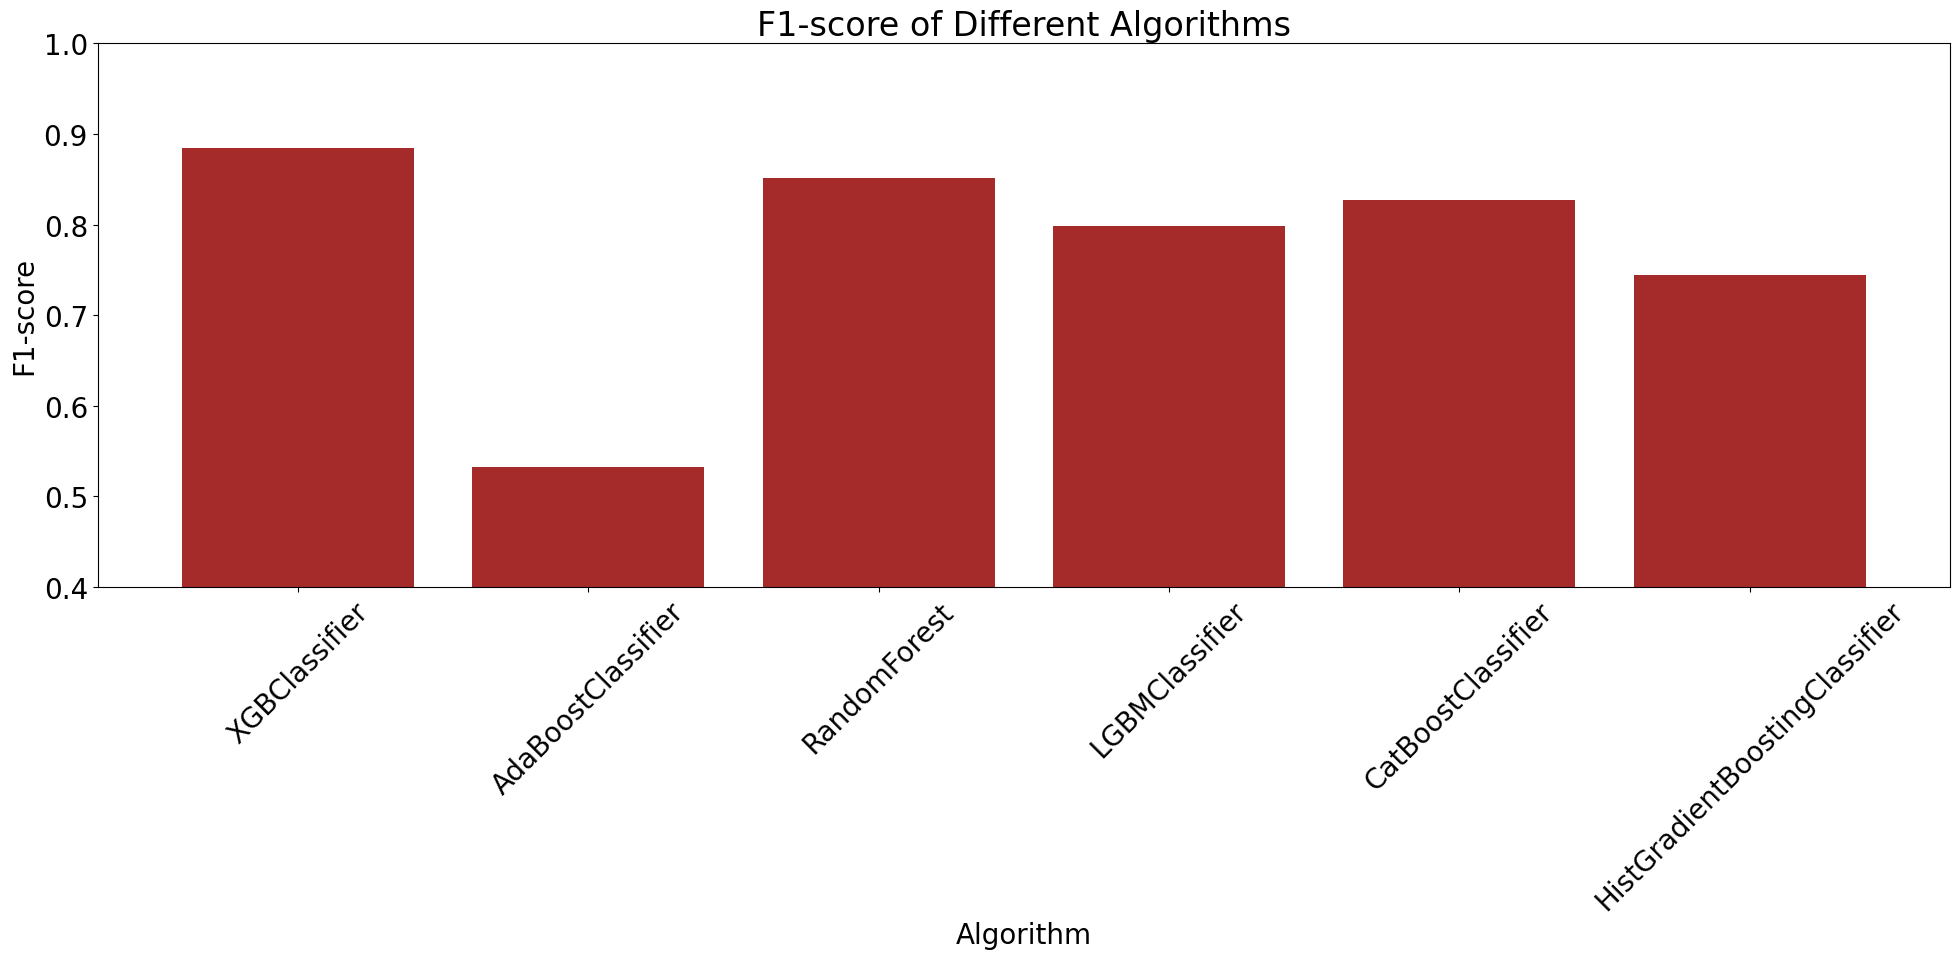

In [ ]:
plt.figure(figsize=(20, 10))
plt.bar(FinalResult['Algorithm'], FinalResult['F1'], color='brown')
plt.xlabel('Algorithm')
plt.ylabel('F1-score')
plt.title('F1-score of Different Algorithms')
plt.ylim(0.4, 1)  # Set the limit of y-axis from 0 to 1 (F1 ranges from 0 to 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
Algorithms = ['XGBClassifier','AdaBoostClassifier', 'RandomForest', 'LGBMClassifier','CatBoostClassifier' ,'HistGradientBoostingClassifier' ]
AUC= [XGB_auc1, adap_auc, rf_auc,lgb_auc1 ,cat_auc1,hgb_auc1 ]

FinalResult=pd.DataFrame({'Algorithm':Algorithms, 'AUC':AUC })

FinalResult

Algorithm       AUC
0                   XGBClassifier  0.998633
1              AdaBoostClassifier  0.985645
2                    RandomForest  0.986407
3                  LGBMClassifier  0.947751
4              CatBoostClassifier  0.992279
5  HistGradientBoostingClassifier  0.844313

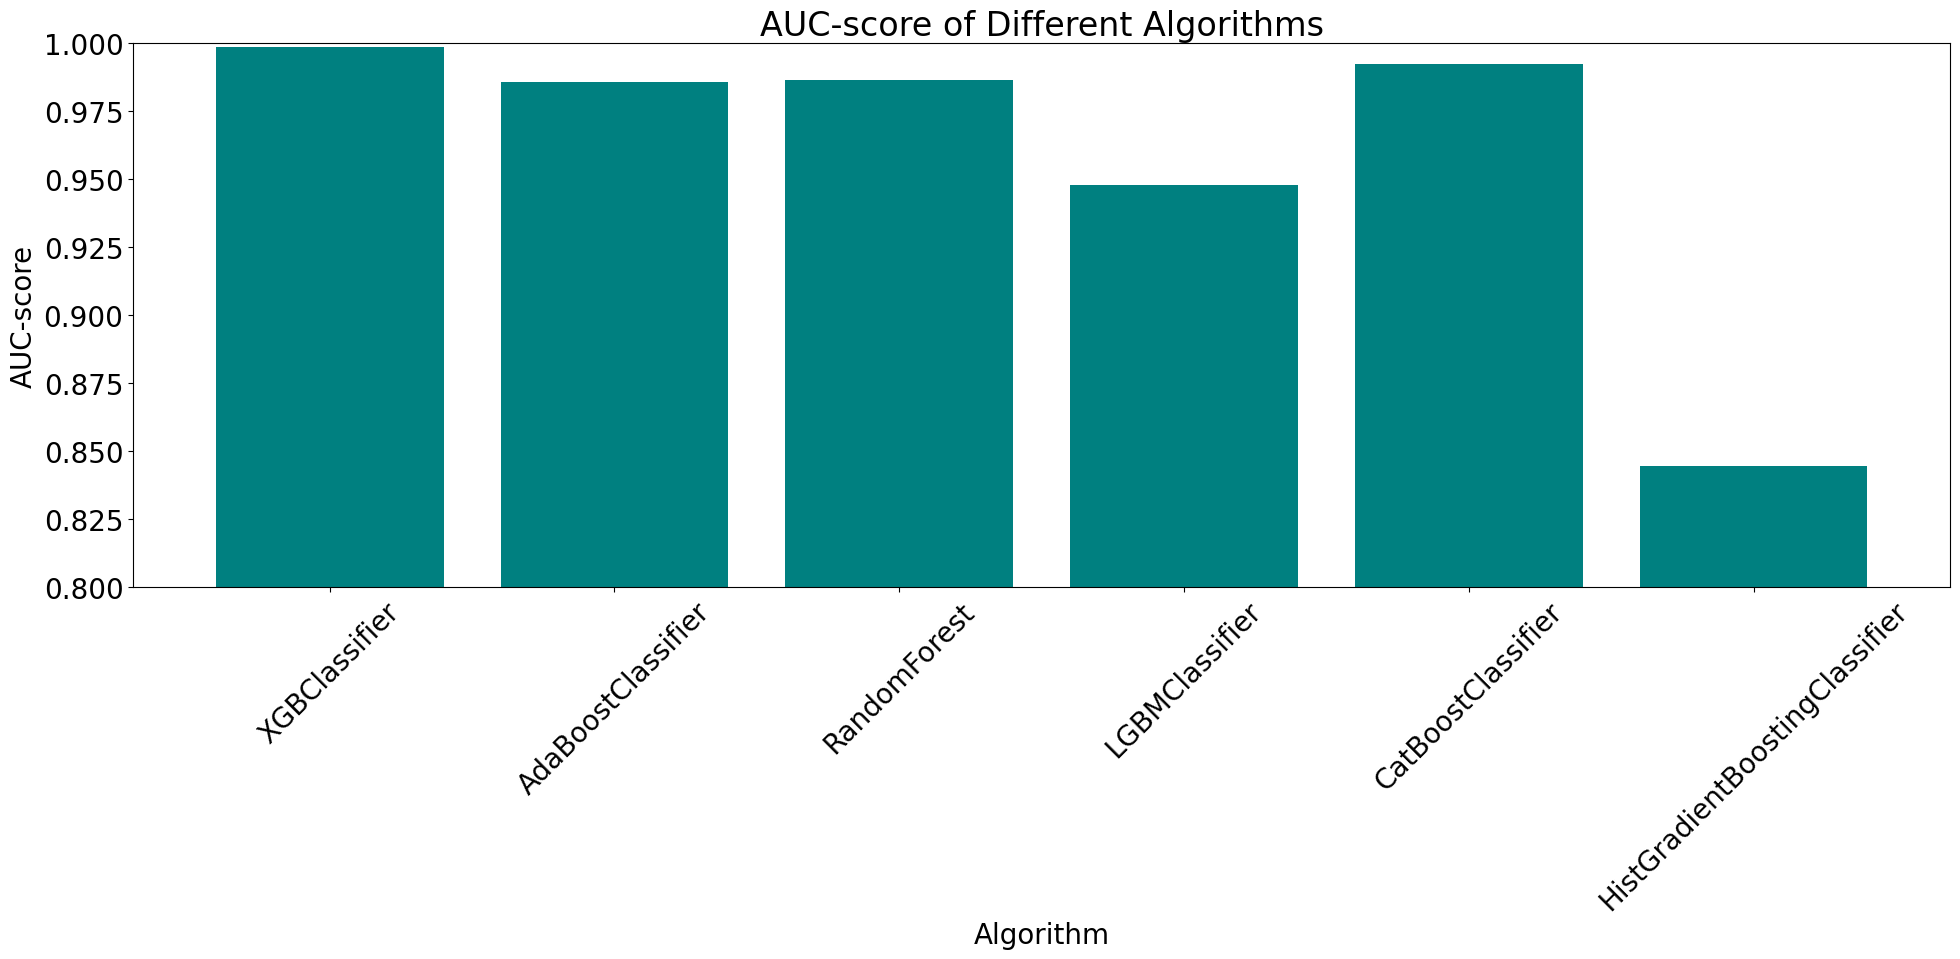

In [ ]:
plt.figure(figsize=(20, 10))
plt.bar(FinalResult['Algorithm'], FinalResult['AUC'], color='teal')
plt.xlabel('Algorithm')
plt.ylabel('AUC-score')
plt.title('AUC-score of Different Algorithms')
plt.ylim(0.8, 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

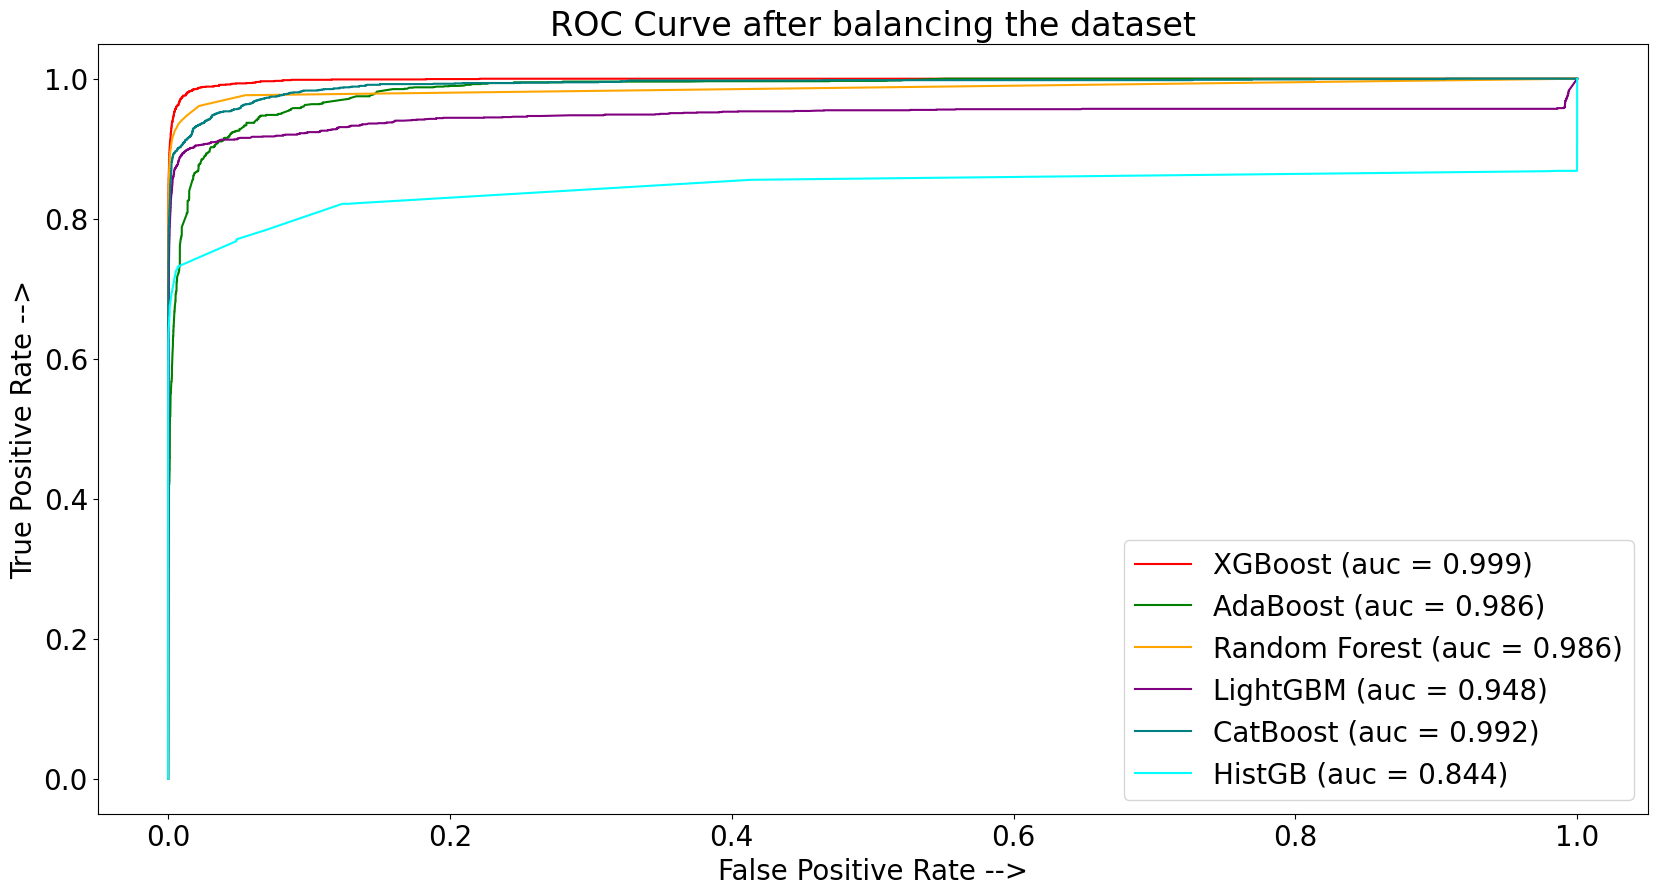

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have your models trained and data prepared

# List of models and their predicted probabilities
models = [("XGBoost", xgb_model2), ("AdaBoost", adap_model1), ("Random Forest", rf_model1),
          ("LightGBM", lgb_model1), ("CatBoost", cat_model1), ("HistGB", hgb_model1)]  # Replace with actual models

all_fpr = []
all_tpr = []
all_auc = []
colors = ['red', 'green', 'orange', 'purple', 'teal', 'cyan']  # Adjust colors as needed

for name, model in models:
    y_pred_probability = model.predict_proba(X_test)[::, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_probability)
    roc_auc = auc(fpr, tpr)
    all_fpr.append(fpr)
    all_tpr.append(tpr)
    all_auc.append(roc_auc)

plt.figure(figsize=(20, 10), dpi=100)
for i, (name, _) in enumerate(models):
    plt.plot(all_fpr[i], all_tpr[i], linestyle='-', color=colors[i],
             label=f'{name} (auc = {all_auc[i]:.3f})')

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title('ROC Curve after balancing the dataset')
plt.legend(loc='lower right')
plt.show()

# ***VOTING CLASSIFIER :)***

In [ ]:
import xgboost as xgb

In [ ]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression  # Optional for adding another estimator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier




In [ ]:
# Define individual models
xgb_model2 = xgb.XGBClassifier(objective='binary:logistic')
rf_model1 = RandomForestClassifier(n_estimators=100, random_state=42)
# Add CatBoost model
from catboost import CatBoostClassifier
cat_model1 = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3)
# Add AdaBoost model
from sklearn.ensemble import AdaBoostClassifier
adap_model1 = AdaBoostClassifier(n_estimators=100, random_state=42)
# Add HistGradientBoost model
from sklearn.ensemble import HistGradientBoostingClassifier
hgb_model1 = HistGradientBoostingClassifier(max_iter=100, random_state=42)
# Add LGBMBoost model
import lightgbm as lgb
lgb_model1 = lgb.LGBMClassifier(objective='binary', max_depth=3, num_leaves=31, learning_rate=0.05)
# Create the voting classifier
voting = VotingClassifier(estimators=[
    ('xgb', xgb_model2),
    ('rf', rf_model1),
    ('cat', cat_model1),
    ('ada', adap_model1),
    ('hist', hgb_model1),
    ('lgb', lgb_model1)
], voting='soft')
# Train the voting classifier
voting.fit(X_train, y_train)
# Make predictions
y_pred = voting.predict(X_test)

# Evaluate model performance (e.g., accuracy)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(f"Voting Classifier Accuracy: {accuracy}")
print(f"Voting Classifier Precision: {precision}")
print(f"Voting Classifier Recall: {recall}")
print(f"Voting Classifier F1-score: {f1}")
print(f"Voting Classifier AUC: {auc}")

0:	learn: 0.6007790	total: 372ms	remaining: 36.8s
1:	learn: 0.5247903	total: 641ms	remaining: 31.4s
2:	learn: 0.4598045	total: 883ms	remaining: 28.5s
3:	learn: 0.4060616	total: 1.13s	remaining: 27s
4:	learn: 0.3600919	total: 1.37s	remaining: 26.1s
5:	learn: 0.3206259	total: 1.61s	remaining: 25.2s
6:	learn: 0.2859878	total: 1.85s	remaining: 24.5s
7:	learn: 0.2559734	total: 2.11s	remaining: 24.3s
8:	learn: 0.2293820	total: 2.24s	remaining: 22.6s
9:	learn: 0.2063398	total: 2.39s	remaining: 21.5s
10:	learn: 0.1856871	total: 2.52s	remaining: 20.4s
11:	learn: 0.1678700	total: 2.65s	remaining: 19.4s
12:	learn: 0.1515834	total: 2.78s	remaining: 18.6s
13:	learn: 0.1373759	total: 2.9s	remaining: 17.8s
14:	learn: 0.1243175	total: 3.04s	remaining: 17.2s
15:	learn: 0.1130242	total: 3.17s	remaining: 16.6s
16:	learn: 0.1027277	total: 3.31s	remaining: 16.1s
17:	learn: 0.0938233	total: 3.45s	remaining: 15.7s
18:	learn: 0.0856710	total: 3.58s	remaining: 15.3s
19:	learn: 0.0786076	total: 3.7s	remaining: 

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[368491     35]
 [   520   1433]]


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

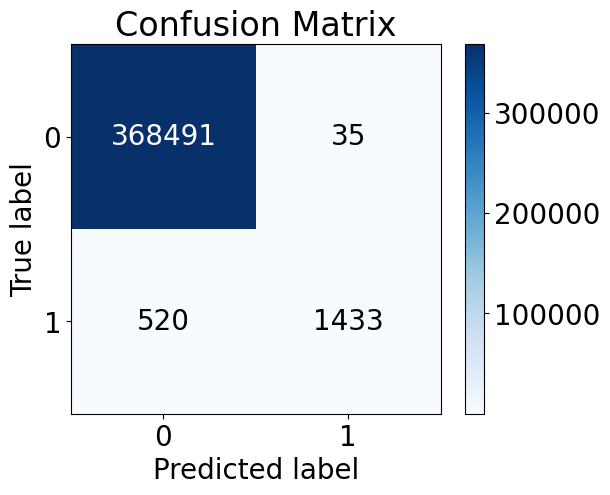

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred)

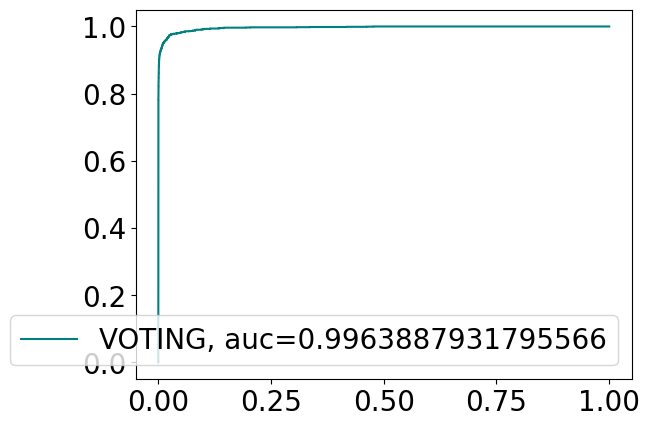

In [ ]:
y_pred_probability_voting = voting.predict_proba(X_test)[::,1]
fpr_voting, tpr_voting, _ = metrics.roc_curve(y_test, y_pred_probability_voting)
voting_auc = metrics.roc_auc_score(y_test, y_pred_probability_voting)
plt.plot(fpr_voting, tpr_voting,color='teal',label="VOTING, auc="+str(voting_auc))
plt.legend(loc=4)
plt.show()

# **SHAP FOR XGBOOST :)**

In [ ]:
 !pip install shap

In [ ]:
import shap
XGBmodel1 = xgb.XGBClassifier(objective='binary:logistic').fit(X_train, y_train)
explainer = shap.TreeExplainer(XGBmodel1)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


In [ ]:
import shap
from catboost import CatBoostClassifier
Catmodel = CatBoostClassifier().fit(X_train, y_train)
explainer = shap.TreeExplainer(Catmodel )
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [ ]:
import shap
from sklearn.ensemble import HistGradientBoostingClassifier
Histmodel = HistGradientBoostingClassifier().fit(X_train, y_train)
explainer = shap.TreeExplainer(Histmodel)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [ ]:
import shap
import lightgbm as lgb
LGBmodel = lgb.LGBMClassifier(objective='binary').fit(X_train, y_train)
explainer = shap.TreeExplainer(LGBmodel)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [ ]:
fraud_df = bcfd_dp[bcfd_dp['is_fraud'] == 1]

In [ ]:
fraud_df

cc_num  merchant  category      amt  first  last  gender  \
2449       4613314721966        11         2   281.06    103    93       1   
2472     340187018810220       190         4    11.52    269   325       0   
2523     340187018810220       128         2   276.31    269   325       0   
2546       4613314721966        93         4     7.03    103    93       1   
2553     340187018810220       134         2   275.73    269   325       0   
...                  ...       ...       ...      ...    ...   ...     ...   
517197  2242176657877538       649         8  1041.51    213   445       1   
517274  2242176657877538        94         8   868.09    213   445       1   
517341  2242176657877538        47         7  1039.42    213   445       1   
517529  2242176657877538        21         2   289.27    213   445       1   
517571  2242176657877538       328         1   766.38    213   445       1   

            lat     long  merch_lat  merch_long  is_fraud  hour  month  age  
2449    35.9946 -81.7266  36.430124  -81.179483         1     1      1   36  
2472    29.4400 -98.4590  29.819364  -99.142791         1     1      1   64  
2523    29.4400 -98.4590  29.273085  -98.836360         1     3      1   64  
2546    35.9946 -81.7266  35.909292  -82.091010         1     3      1   36  
2553    29.4400 -98.4590  29.786426  -98.683410         1     3      1   64  
...         ...      ...        ...         ...       ...   ...    ...  ...  
517197  34.6323 -89.8855  34.573471  -89.911011         1    22     12   65  
517274  34.6323 -89.8855  34.091227  -90.390612         1    22     12   65  
517341  34.6323 -89.8855  34.628434  -90.284780         1    22     12   65  
517529  34.6323 -89.8855  34.746063  -90.401093         1    23     12   65  
517571  34.6323 -89.8855  33.771462  -90.651342         1    23     12   65  

[9651 rows x 15 columns]